In [1]:
# Import Libraries
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import string
import csv
import re

In [2]:
# Open CSV File
listwit = []
with open('tweetutf2.csv',encoding='utf-8') as data:
    reader = csv.reader(data)
    for row in reader:
        row[0] = re.sub(r'\s\s+',' ', row[0])
        listwit.append(row[0].split(';'))
listwit

[['\ufeffINDOSAT',
  '@indosatcare Kenapa kartu diregistrasi nggak bisa pak? Padahal nomor kk & ktp nya sudah benar? Sampai 5x gagal tolong di daftarkan segera demi kenyamanan pengguna kartu indosat. Terima kasih '],
 ['INDOSAT', 'indosat mantap djaja koneksinya ngebut euy '],
 ['INDOSAT',
  'Membalas @IndosatCare @IndosatCare mau nangis deh rasanya pdahl saya percaya betul dengan indosat soal koneksi di wil Karimun tp sudah 3 hari koneksi kacau balau '],
 ['INDOSAT', 'Sinyal Indosat asu ari musim hujan hadeuh '],
 ['TRI',
  'Membalas @triindonesia Cek dm woi layananan keluhan semua ga berfungsi... '],
 ['XL',
  'Ini kenapa di bale endah sinyal XL tiba2 bagus yah? Pindah kali yah tower nya ke deket rumah.. *aneh liat hp sendiri '],
 ['TRI',
  'Hotsale 8GB hanya gratis nelfon aja ga ada gratis sms nya tah min? @triindonesia '],
 ['TRI',
  'Membalas @andikapram_ @IndosatCare dan 2 lainnya Hai kak Andika Ada yang bisa saya bantu. Kami lihat akhir akhir ini anda sering sambat dengan kualit

In [3]:
# Declare StemmerFactory from Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [4]:
# Cleaning RAW
listwit[0][0] = 'INDOSAT'

for row in listwit:
    row[1] = row[1].lower()
    row[1] = re.sub(r'\s\s+',' ', row[1])
    row[1] = re.sub(r'http\S+', '', row[1]) #hapus link http
    row[1] = re.sub(r'@\S+', '', row[1]) #hapus mention
    row[1] = re.sub(r'Membalas', '', row[1]) #hapus membalas
    row[1] = re.sub(r'RT', '', row[1]) #hapus RT
    row[1] = re.sub(r"\.", '', row[1]) #hapus titik
    row[1] = re.sub(r",", '', row[1]) #hapus koma
    row[1] = re.sub(r":", '', row[1]) #hapus titik dua
    row[1] = re.sub(r"\?", '', row[1]) #hapus tanda tanya
    row[1] = re.sub(r"!", '', row[1]) #hapus tanda seru
    row[1] = re.sub(r"#", '', row[1]) #hapus hashtag
    row[1] = re.sub(r"\(", '', row[1]) #hapus (
    row[1] = re.sub(r"\)", '', row[1]) #hapus )
    row[1] = re.sub(r"\[", '', row[1]) #hapus [
    row[1] = re.sub(r"\]", '', row[1]) #hapus ]
    for i in range(0,10):
            row[1] = re.sub(r"{}".format(i), '', row[1]) #hapus ]
    row[1] = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', row[1])
    row[1] = re.sub(r"[^A-Za-z0-9().,<_>!?\'`]", ' ', row[1]) #hapus entah apa ini :v
    row[1] = re.sub(r"\s{2,}", ' ', row[1]) #hapus entah apa ini :v (2)
    
listwit

[['INDOSAT',
  ' kenapa kartu diregistrasi nggak bisa pak padahal nomor kk ktp nya sudah benar sampai gagal tolong di daftarkan segera demi kenyamanan pengguna kartu indosat terima kasih '],
 ['INDOSAT', 'indosat mantap djaja koneksinya ngebut euy '],
 ['INDOSAT',
  'membalas mau nangis deh rasanya pdahl saya percaya betul dengan indosat soal koneksi di wil karimun tp sudah hari koneksi kacau balau '],
 ['INDOSAT', 'sinyal indosat asu ari musim hujan hadeuh '],
 ['TRI', 'membalas cek dm woi layananan keluhan semua ga berfungsi '],
 ['XL',
  'ini kenapa di bale endah sinyal xl tiba bagus yah pindah kali yah tower nya ke deket rumah aneh liat hp sendiri '],
 ['TRI', 'hotsale gb hanya gratis nelfon aja ga ada gratis sms nya tah min '],
 ['TRI',
  'membalas dan lainnya hai kak andika ada yang bisa saya bantu kami lihat akhir akhir ini anda sering sambat dengan kualitas jaringan dari saya sarankan gunakan paket internet dari agar anda tidak buang tenaga untuk marah marah '],
 ['TSEL',
  'me

In [5]:
# Tokenization
lttoken = []
for i in listwit:
    i[1] = i[1].strip()
    lttoken.append([i[0], i[1].split(' ')])
lttoken

[['INDOSAT',
  ['kenapa',
   'kartu',
   'diregistrasi',
   'nggak',
   'bisa',
   'pak',
   'padahal',
   'nomor',
   'kk',
   'ktp',
   'nya',
   'sudah',
   'benar',
   'sampai',
   'gagal',
   'tolong',
   'di',
   'daftarkan',
   'segera',
   'demi',
   'kenyamanan',
   'pengguna',
   'kartu',
   'indosat',
   'terima',
   'kasih']],
 ['INDOSAT', ['indosat', 'mantap', 'djaja', 'koneksinya', 'ngebut', 'euy']],
 ['INDOSAT',
  ['membalas',
   'mau',
   'nangis',
   'deh',
   'rasanya',
   'pdahl',
   'saya',
   'percaya',
   'betul',
   'dengan',
   'indosat',
   'soal',
   'koneksi',
   'di',
   'wil',
   'karimun',
   'tp',
   'sudah',
   'hari',
   'koneksi',
   'kacau',
   'balau']],
 ['INDOSAT', ['sinyal', 'indosat', 'asu', 'ari', 'musim', 'hujan', 'hadeuh']],
 ['TRI',
  ['membalas',
   'cek',
   'dm',
   'woi',
   'layananan',
   'keluhan',
   'semua',
   'ga',
   'berfungsi']],
 ['XL',
  ['ini',
   'kenapa',
   'di',
   'bale',
   'endah',
   'sinyal',
   'xl',
   'tiba',
   '

In [6]:
# Stemming
ltstem = []
for i in lttoken:
    temp_sentence = []
    for j in i[1]:
        stemmed = stemmer.stem(j)
        temp_sentence.append(stemmed)
    print(temp_sentence)
    ltstem.append([i[0], temp_sentence])
ltstem

['kenapa', 'kartu', 'registrasi', 'nggak', 'bisa', 'pak', 'padahal', 'nomor', 'kk', 'ktp', 'nya', 'sudah', 'benar', 'sampai', 'gagal', 'tolong', 'di', 'daftar', 'segera', 'demi', 'nyaman', 'guna', 'kartu', 'indosat', 'terima', 'kasih']
['indosat', 'mantap', 'djaja', 'koneksi', 'ngebut', 'euy']
['balas', 'mau', 'nang', 'deh', 'rasa', 'pdahl', 'saya', 'percaya', 'betul', 'dengan', 'indosat', 'soal', 'koneksi', 'di', 'wil', 'karimun', 'tp', 'sudah', 'hari', 'koneksi', 'kacau', 'balau']
['sinyal', 'indosat', 'asu', 'ari', 'musim', 'hujan', 'hadeuh']
['balas', 'cek', 'dm', 'woi', 'layananan', 'keluh', 'semua', 'ga', 'fungsi']
['ini', 'kenapa', 'di', 'bale', 'endah', 'sinyal', 'xl', 'tiba', 'bagus', 'yah', 'pindah', 'kali', 'yah', 'tower', 'nya', 'ke', 'deket', 'rumah', 'aneh', 'liat', 'hp', 'sendiri']
['hotsale', 'gb', 'hanya', 'gratis', 'nelfon', 'aja', 'ga', 'ada', 'gratis', 'sms', 'nya', 'tah', 'min']
['balas', 'dan', 'lain', 'hai', 'kak', 'andika', 'ada', 'yang', 'bisa', 'saya', 'bantu'

['mantapsinyal', 'stabil', 'skrg', 'dirumahthx', 'telkomsel']
['kualitas', 'sinyal', 'makin', 'hari', 'makin', 'ancur', 'tolong', 'dong', 'baik', 'hidup', 'saya', 'udah', 'hancur', 'masa', 'sinyal', 'saya', 'mau', 'diancurin', 'juga', 'kalo', 'langgan', 'kecewa', 'kaya', 'gin', 'wajar', 'kan', 'ya', 'emang', 'ga', 'cape', 'liat', 'timeline', 'situ', 'dipenuhin', 'sama', 'oceh', 'para', 'konsumen', 'mulu']
['im', 'ne', 'iklan', 'sampah', 'kreatif', 'dikit', 'napa', 'ikut', 'as', 'telkomsel', 'maluuuuuuu']
['ready', 'pis', 'rt', 'sudah', 'siap', 'untuk', 'kuis', 'bangkitindonesia', 'tes', 'suara', 'dulu', 'ah']
['balas', 'kalo', 'kayak', 'gin', 'gimana', 'coba', 'aktifinnyaaaaa', 'kasih', 'tau', 'dong', 'caranyaaaaaa']
['nah', 'ini', 'rt', 'cari', 'tri', 'store', 'dekat', 'di', 'kota', 'kamu', 'klik', 'link', 'ini', 'untuk', 'informasi', 'lengkap', 'yaa']
['pake', 'antena', 'pf', 'goceng', 'brad', 'siapa', 'tau', 'tambah', 'bagus', 'sinyal', 'saran']
['balas', 'klo', 'bisa', 'nang', 'nan

['balas', 'kno', 'dit', 'lama', 'masih', 'indonesia', 'jgn', 'harap', 'lebih', 'sama', 'dunia', 'selular', 'sbagian', 'ngiklan', 'citra', 'dan', 'bagi', 'lagi', 'keruk', 'untung', 'tanpa', 'mndengar', 'keluh', 'konsumen', 'trims']
['sinyal', 'xl', 'di', 'bintaro', 'kurang', 'bagus', 'yaa', 'lambat', 'banget', 'padahal', 'sudah']
['ini', 'jaring', 'kenapa', 'dan', 'ilang', 'cacat', 'banget', 'koneksi']
['balas', 'dm', 'gue', 'gimana', 'riza', 'taek']
['paket', 'internet', 'indosat', 'bikin', 'nang', 'borosss', 'yawooh']
['min', 'aku', 'sudah', 'lama', 'guna', 'internet', 'xl', 'biasa', 'sinyal', 'nya', 'kencang', 'kok', 'akhir', 'ini', 'sinyal', 'nya', 'susah', 'ya', 'min']
['admin', 'jancok', 'paket', 'rb', 'maen', 'ilang', 'aje', 'nih', 'boro', 'boro', 'bulan', 'menit', 'aja', 'belum', 'kampret']
['sinyal', 'gawat', 'min', 'kalah', 'kuat', 'ama', 'aki', 'aki', 'rt', 'bebas', 'internetan', 'tahun', 'cuma', 'dengan', 'rp', 'alwayson', 'dari']
['tekad', 'sudah', 'bulat', 'bis', 'ini', 'h

['laek', 'rindu', 'sm', 'klen', 'mkn', 'sebungks', 'ber', 'ber', 'tidur', 'satu', 'tikar', 'ktawa', 'sama', 'sdih', 'sama', 'marah', 'pun', 'sama', 'ubahdenganbicara']
['kenapa', 'ya', 'nomor', 'prabayar', 'itu', 'ga', 'bisa', 'aktif', 'lagi', 'seperti', 'nomor', 'atau', 'padahal', 'baru', 'lewat', 'hari', 'dari', 'masa', 'tenggangdipaksa', 'pindah', 'ke', 'pascabayarsistem', 'yang', 'jadul', 'atau', 'karena', 'rasa', 'provider', 'paling', 'besar']
['luka', 'yang', 'baru', 'pecat', 'maupinjemuang', 'eagkbisa', 'mau', 'ngutang', 'enggak', 'kasih', 'boikotindosat', 'atau', 'nang', 'ilcmembidikhabibrizieq']
['rt', 'lurd', 'urgent', 'calon', 'sponsor', 'kami', 'eh', 'udah', 'ketang', 'hehehe', 'indosatmantap']
['ucweb', 'indosat', 'mantap', 'bisa', 'new', 'tab', 'norak', 'murah', 'pulawew', 'siapa', 'yang', 'mau']
['hallo', 'indosat', 'yang', 'baik', 'hati', 'dan', 'provider', 'yang', 'ga', 'ada', 'matinyaterima', 'kasih', 'loh', 'atas', 'layan', 'yang', 'sangat', 'muas', 'monthwithindosat

['gak', 'bakal', 'kolaborasi', 'sama', 'nih', 'soal', 'sinyal', 'kalian', 'sama', 'sama', 'bapuk', 'dan', 'selalu', 'tidak', 'respon', 'keluh', 'konsumen']
['jadi', 'simpul', 'indosat', 'tetap', 'ee', 'baru', 'jam', 'gin', 'signalnya', 'lumayan', 'bagus', 'itu', 'juga', 'lumayan', 'sampai', 'lebaran', 'pun', 'ga', 'akan', 'gue', 'maafin']
['mantap', 'pake', 'indosat', 'nihngebut']
['tp', 'katae', 'plng', 'enak', 'telkomsel', 'rt', 'podo', 'ae', 'se', 'jatuhe', 'kabehrt', 'lek', 'paket', 'iku', 'murah', 'endi']
['balas', 'baik', 'terima', 'kasih', 'telah', 'hubung', 'telkomsel', 'sila', 'hubung', 'kami', 'kembali', 'bila', 'masih', 'butuh', 'bantu', 'nikmat', 'nyaman', 'interaksi', 'dgn', 'customer', 'care', 'kami', 'cara', 'real', 'time', 'via', 'web', 'chat', 'login', 'ke', 'filo']
['apa', 'sih', 'benefit', 'yg', 'kita', 'terima', 'sbg', 'langgan', 'postpaid', 'krn', 'hampir', 'thn', 'ga', 'dpt', 'bonus', 'apa']
['balas', 'mungkin', 'sekitar', 'tahun', 'aku', 'pake', 'provider', 'indo

['balas', 'dah', 'pasrahin', 'aja', 'supportnya', 'indosat', 'mah', 'kaya', 'sampah']
['sinyal', 'xl', 'rumah', 'gue', 'bagus', 'deh', 'sampe', 'ken', 'demo', 'saking', 'sinyal', 'bagus']
['balas', 'rp', 'gb', 'how', 'dare', 'are', 'you', 'btw', 'koq', 'tau', 'aku', 'pake', 'paket', 'rakyat', 'jelantah', 'hahaha', 'hati', 'hati', 'paket', 'yellow', 'habis', 'kuota', 'atau', 'habis', 'waktu', 'pulsa', 'reguler', 'akan', 'hajar', 'habis', 'dalam', 'satu', 'kerdipan', 'mata', 'papa', 'memang', 'jahat', 'jawab', 'indosat', 'murah', 'mau', 'selamat']
['beberapa', 'orang', 'ngetwit', 'galau', 'biar', 'dapat', 'simpati', 'kalau', 'gue', 'biar', 'dapat', 'tri', 'lebih', 'murah', 'paket', 'internetnya', 'kata', 'orang', 'orang']
['haha', 'sinyal', 'kuat', 'ege', 'rt', 'pea', '', 'rt', 'kartu', 'kreditmantapyrt', 'amiraslwt', 'ganti', 'kartu', 'apa', 'ya', 'tri', 'bgst', 'bgtdah']
['ehh', 'bangsat', 'asa', 'gw', 'beli', 'paket', 'kuota', 'yg', 'reguler', 'internet', 'knp', 'gw', 'kudu', 'jadi', 

['indosat', 'dh', 'lumayan', 'bagus', 'jaring', 'internetnyatpi', 'msh', 'putus', 'browsingnyamudahan', 'bisa', 'lebih', 'baik', 'lagi']
['balas', 'woi', 'bangsat', 'hampir', 'tiap', 'hari', 'sinyal', 'busuk', 'kek', 'tai', 'skarang', 'sinyal', 'nya', 'gk', 'kenceng', 'kyk', 'dulu', 'lagi', 'njengg', 'rugi', 'gue', 'beli', 'xl', 'bangsat', 'bangkrutin', 'aja', 'njennggg']
['klo', 'mau', 'cari', 'informasi', 'tentang', 'chip', 'sakti', 'seperti', 'program', 'dan', 'berita', 'baru', 'nya', 'mana']
['sinyal', 'bangsat']
['sy', 'sangat', 'kecewa', 'provider', 'plat', 'merah', 'ikut', 'dukung', 'pro', 'reklamasi', 'telkomselmusuhbali']
['mohon', 'bantu', 'kode', 'puk', 'kode', 'care', 'no', 'hp', '9', 'angka', 'di', 'belakang', 'kartu', '9']
['waktu', 'senang', 'senang', 'bareng', 'teman', 'atau', 'keluarga', 'di', 'the', 'lodge', 'maribaya']
['balas', 'kalau', 'ada', 'kualitas', 'bukan', 'kuota', 'banyak', 'tapi', 'muter', 'terus', 'tidak', 'konek', 'kecewa']
['balas', 'jujur', 'saya', 'ke

['saya', 'gak', 'bisa', 'daftar', 'cash', 'wallet', 'mohon', 'bantu', 'nya']
['balas', 'bikin', 'nang', 'emang', 'harga', 'paket']
['lokasi', 'di', 'kota', 'jayapura', 'sinyal', 'lot', 'banget', 'padahal', 'kuat', 'sinyal', 'full', 'via']
['balas', 'sore', 'mba', 'ghina', 'untuk', 'keluh', 'jaring', 'internet', 'silah', 'dm', 'nomer', 'nya', 'terimakasih', 'james']
['oke', 'tampak', 'memang', 'pake', 'telkomsel', 'adalah', 'pilih', 'baik', '']
['kuota', 'mahaldibagi', 'sm', 'youtubejaringan', 'lot', 'dr', 'kemarin', 'beda', 'bgt', 'sm', 'mahalkuota', 'bagi', 'tp', 'jaring', 'stabil']
['balas', 'saya', 'heran', 'dengan', 'indosat', 'kok', 'bisa', 'bsanya', 'ada', 'sms', 'konten', 'padahal', 'kita', 'gak', 'ikut', 'sms', 'konten', 'gara', 'sms', 'konten', 'pulsa', 'jadi', 'ludes', 'udah', 'di', 'unreg', 'kali', 'kali', 'masih', 'ada', 'indosat', 'jancok', 'kurang', 'ajar']
['balas', 'saya', 'sudah', 'hampir', 'tahun', 'pake', 'telkomsel', 'aman', 'aman', 'aja', 'walaupun', 'suka', 'down'

['balas', 'bagaimana', 'update', 'an', 'nya', 'parah', 'banget', 'tri', 'asli', 'sekarang', 'parah', 'banget', 'ini', 'bukan', 'cuma', 'saya', 'doang', 'loh', 'pingnya', 'kayak', 'tai', 'download', 'streaming', 'gaprnh', 'mb', 'pdhl', 'fullbar', 'sinyal', 'sudah', 'oprek', 'apn', 'ttp', 'aja', 'kekgtu', 'mohon', 'baik', 'jangan', 'cuma', 'untung', 'doang']
['balas', 'indosat', 'mah', 'tolol', 'jaring', 'suka', 'lag', 'ngapain', 'lu', 'make', 'indosat', 'anjing', 'indosat', 'anjing']
['admin', 'cara', 'lapor', 'nomer', 'yg', 'udh', 'coba', 'tipu', 'gimana', 'ya', 'mohon', 'info', 'supaya', 'blokir', 'aja', 'dari', 'telkomselnya']
['balas', 'provider', 'anjing', 'xl']
['xlku', 'gak', 'joss', 'rt', 'sinyal', 'di', 'surabaya', 'joss']
['provider', 'buruk', 'panjang', 'sejarah', 'indonesia', 'gegayaan', 'lu', 'bangsat', 'sponsorin', 'mobile', 'legend', 'tapi', 'ngeleg', 'anjing', 'dancok', 'udah', 'hari', 'ga', 'bisa', 'internetan', 'ini', 'aja', 'make', 'wifi']
['yatuhan', 'hujan', 'hari',

['anjing', 'lu', 'ngentot', 'xl', 'goblok', 'dasar', 'gk', 'tau', 'diri', 'udh', 'hrga', 'paket', 'naiksinyal', 'lot', 'gk', 'dibnerinlu', 'mau', 'di', 'hack', 'kyk', 'tlkmsl', 'anjing', 'lu', 'apa', 'ini', 'sinyal', 'kyk', 'giningentot', 'lu', 'awas', 'gk', 'dibnerin', 'lu']
['minggu', 'pagi', 'enak', 'ke', 'kios', 'bang', 'yusufmoga', 'dapat', 'buku', 'keren', 'keren', 'sinyal', 'xlkoneksi', 'cepatbentang', 'peta', 'gugel', 'pun', 'lsngsng', 'nancep', 'di', 'lokasi']
['wifi', 'di', 'rumah', 'lot', 'banget', 'uda', 'beberapa', 'hari', 'kenapa', 'sih', 'ini', 'kesel', 'ih']
['balas', 'seperti', 'xl', 'ini', 'operator', 'yg', 'gak', 'recomend', 'it', 'layan', 'dan', 'tindak', 'lanjut', 'nya', 'tidak', 'jelas', 'pasti', 'nya', 'hanya', 'kata', 'mohon', 'maaf', 'saja', 'yg', 'saya', 'dapat', 'sejak', 'tweet', 'pertama', 'saya', 'tgl', 'maret', 'tentang', 'keluh', 'internet', 'masih', 'blum', 'ada', 'baik', 'xl', 'sangat', 'kecewa']
['telkomsel', 'neng', 'banget', 'ngasih', 'bonus', 'sms',

['duh', 'kartu', 'henpon', 'bikin', 'ribettt', 'nomor', 'asli', 'dari', 'smp', 'pake', 'indosat', '', 'ga', 'mungkin', 'ganti', 'krn', 'nomor', 'uda', 'dipake', 'buat', 'byk', 'hal', 'tapi', 'pacar', 'make', 'xl', '', 'mau', 'ga', 'mau', 'jd', 'pake', 'xl', 'juga', 'ehhh', 'dua', 'sampah', 'layan']
['balas', 'kalo', 'masih', 'doyan', 'uang', 'jangan', 'bikin', 'konsumen', 'luh', 'kecewa', 'dengan', 'layan', 'lu']
['ayo', 'jangan', 'bikin', 'langgan', 'setia', 'ini', 'kecewa', 'jaring', 'butut', 'abis', 'masa', 'saya', 'harus', 'ganti', 'operator', 'lain']
['colek', 'rt', 'korban', 'tipu', '', 'rt', 'aon', 'kata', 'gratis', 'twitter', 'lah', 'ini', 'kok', 'aku', 'twitteran', 'gk', 'bisa', 'akh']
['ampun', 'deh', 'tri', 'lot', 'anat', 'sinyal', 'ada', 'luplep', 'chya', 'jdi', 'bisa', 'bom', 'ega', 'tetep', 'idola']
['balas', 'elu', 'customer', 'servis', 'enak', 'kantor', 'kerja', 'pake', 'wifi', 'nah', 'ini', 'yang', 'pake', 'kuota', 'kasi', 'woy', 'bangsat', 'coba', 'elu', 'kerja', 'pak

['yup', 'betul', 'kencang', 'puunn', 'drt', 'fakta', 'adalah', 'sinyal', 'xl', 'di', 'rs', 'haji', 'lbh', 'kenceng', 'banding', 'di', 'tasbi', 'ckckckckckkckckck']
['mantap', 'niih', 'kalo', 'ada', 'layan', 'wifiid', 'atau', 'indosat', 'super', 'wifi', 'di', 'dlm', 'kereta', 'api', 'route', 'jauh', 'wifiid', 'sdh', 'ada', 'di', 'commuter', 'line']
['balas', 'iya', 'boleh', 'buat', 'tempat', 'sinyal', 'lumayan', 'lah', 'bagus', 'buat', 'telkomsel', 'indosat', 'sama', 'xl', 'smartfren', 'axis', 'dll', 'gak', 'tahu', 'ya']
['balas', 'ingin', 'nang', 'love', 'im', 'but', 'min', 'bts', 'dong', 'minnnn', 'terjemah', 'tweet']
['balap', 'download', 'di', 'mulai', 'buru', 'download', 'app', 'games', 'favorit', 'puas']
['balas', 'hayolo', 'jaring', 'lot', 'gr', 'undang', 'ustad', 'radikal']
['ucap', 'maaf', 'agar', 'marah', 'jadi', 'ramah', 'ubahdenganbicara']
['balas', 'provider', 'bangsat', 'xl', 'yg', 'siny', 'cm', 'maling']
['sinyal', 'banyak', 'koneksi', 'tapi', 'download', 'aja', 'bawah', 

['pagi', 'bagaimana', 'cara', 'nonaktif', 'paket', 'kuota', 'internet', 'gb', 'hari', 'terima', 'kasihmohon', 'direspon', 'dgn', 'cepat']
['balas', 'bayar', 'nya', 'gimana']
['xl', 'sinyal', 'kencang', 'sampai', 'behelm', 'aku', 'nah', 'rt', 'mudah', 'txt', 'lana', 'ganguan']
['blitar', 'kota', 'indosat', 'sudah', 'alhamdulillah', 'tp', 'asa', 'lebih', 'lambat', 'drpd', 'hsdpa', 'dan', 'lebih', 'uras', 'batre']
['saya', 'langgan', 'setia', 'indosat', 'min', 'tapi', 'ini', 'kok', 'jaring', 'sering', 'trouble', 'ya', 'tolong', 'segera', 'di', 'baik', 'terima', 'kasih']
['telkomsel', 'loop', 'apa', 'kartu', 'yg', 'enak', 'buat', 'internetan', 'gak', 'lot', 'dan', 'gak', 'lelet', 'tapi', 'murah', 'riah']
['sinyal', 'telkomsel', 'makin', 'cacat']
['rt', 'makasii', 'yaa', 'infonyaamaaf', 'taat', 'bales', 'baru', 'liaat']
['mimin', 'terimakasih', 'pulsa', 'nya', 'karna', 'telah', 'darat', 'sempurna', 'dihape', 'gue', 'bangkitindonesia']
['masuk', 'engkauu', 'tertipuu', 'hihii', 'rt', 'xl', 'k

['dear', 'bagaimana', 'cara', 'unreg', 'ini', 'saya', 'sudah', 'sampai', 'keluh', 'via', 'email', 'twitter', 'wa', 'care', 'dan', 'telpon', 'tidak', 'ada', 'tanggap', 'sama', 'sekali', 'pulsa', 'ribu', 'per', 'hari', 'lumayan', 'juga', 'bisa', 'saya', 'lapor', 'ke', 'ylki', 'terima', 'kasih']
['untuk', 'kalian', 'yang', 'mau', 'tau', 'kenapa', 'koneksi', 'lte', 'xl', 'nya', 'ancur', 'dan', 'lot', 'nyata', 'jaring', 'bagi', 'tidak', 'rata', 'di', 'tiap', 'lokasi', 'so', 'jangan', 'pakai', 'prioritas', 'itu', 'akan', 'sama', 'aja', 'kaya', 'yg', 'kartu', 'biasa', 'dan', 'sabar', 'aja', 'tanggap', 'kualitas', 'internet', 'xl', 'ini', 'asa', 'ky', 'limit']
['kuota', 'gb', 'internet', 'youtube', 'internet', 'lot', 'kayak', 'keong', 'bukak', 'youtube', 'muter', 'kayah', 'sampah', 'keren', 'moga', 'temen', 'temen', 'lain', 'gak', 'ad', 'yg', 'tipu', 'iklan', 'kayak', 'saya', 'karna', 'iklan', 'tok', 'yg', 'keren', 'asli', 'mah', 'nol']
['selamat', 'malam', 'kok', 'registrasi', 'kartu', 'gagal

['azapto mufc', 'hi', 'kak', 'saat', 'ini', 'blm', 'ada', 'informasi', 'jiak', 'ada', 'kendala', 'coba', 'setting', 'jaring', 'manual', 'dulu', 'yuk', 'kak', 'masuk', 'ke', 'menu', 'atur', 'network', 'atau', 'jaring', 'kemudian', 'pilih', 'jaring', 'manual', 'pilih', 'operator', 'lain', 'dan', 'pilih', 'indosat', 'apabila', 'sukses', 'dapat', 'ubah', 'ke', 'otomatis', 'kembali', 'titi']
['indosat', 'asu', 'asu']
['mso', 'ws', 'bengi', 'lagek', 'kenek', 'jan', 'kyo', 'asu', 'asu', 'woe', 'indosat']
['dapat', 'pulsa', 'telkomsel', 'dari', 'grab', 'reward', 'hahahha', 'neng', 'banget']
['kecewa', 'kali', 'pake', 'xl', 'jaringanya', 'jelek', 'kali', 'sering', 'hilang', 'timbol', 'tolong', 'dong', 'di', 'baik']
['balas', 'anjing', 'sampe', 'mlm', 'ini', 'keluan', 'saya', 'ke', 'cs', 'cuman', 'disnggep', 'sampah', 'fuck', 'bgt', 'indosat']
['adu', 'kuat', 'sinyal', 'tri', 'vs', 'indosat', 'jalan', 'jakarta', 'semarang', 'jalur', 'kereta']
['balas', 'tolong', 'segera', 'di', 'baik', 'jaring',

['aku', 'orep', 'manehpulsa', 'telkomsel', 'ku', 'mbalik', 'jancok', 'ancen']
['sinyal', 'di', 'oro', 'dowo', 'kota', 'malang', 'lot']
['hahaa', 'demi', 'sinyal', 'hape', 'rt', 'wah', 'sinyal', 'xl', 'da', 'kartosuro', 'joss', 'bgt', 'gimana', 'kalo', 'ak', 'pindah', 'kartosuro', 'aaja', 'yaaa']
['balas', 'bisa', 'kah', 'beri', 'saya', 'informasi', 'tri', 'retail', 'untuk', 'wilayah', 'cengkareng']
['situ', 'jual', 'aset', 'indosat', 'saya', 'nang', 'bukan', 'sedih', 'ishom', 'muhammad', 'tambah', 'republikacoid', 'akun', 'verifikasi', 'ibu', 'megawati', 'sedih', 'jika', 'ada', 'kader', 'pdip', 'libat', 'korupsi']
['enak', 'opmin', 'unlimited', 'an', 'pake', 'telkomsel', 'uda', 'murah', 'cepat', 'pula', 'abisinitandatangankontrak']
['jancok', 'indosat', 'sama', 'aja', 'kyk', 'axis', 'cok', 'lemotttt']
['test', 'ilmu', 'joss', 'tuh', 'ehhrt', 'test', 'sinyal', 'yah', 'mas', 'hendyxl', 'nya', 'sdg', 'masalah', 'nih', 'sinyalnyart', 'test']
['telkomsel', 'ini', 'memang', 'sedot', 'pulsa',

['mbak', 'mas', 'gimana', 'nih', 'udah', 'hari', 'gw', 'main', 'game', 'tapi', 'ga', 'bisa', 'padahal', 'sinyal', 'full', 'udah', 'banyak', 'yang', 'kayak', 'gin', 'elah', 'di', 'tanganin', 'dong']
['photo', 'jaring', 'baru', 'cepat', 'dan', 'stabil', 'repost', 'iwantitnow', 'indosat', 'im']
['lot', 'ya', 'lot', 'aja', 'rt', 'gantung', 'untuk', 'paket', 'yang', 'digunain', 'anik', 'saat', 'ini', 'gunain', 'paket', 'yang', 'mana', 'mita']
['makas', 'kaka', 'mimin', 'rt', 'informasi', 'lengkap', 'paketri', 'hello', 'masa', 'aktif', 'panjang', 'bisa', 'langsung', 'klik', 'sini', 'ya']
['neng', 'pake', 'telkomsel', 'internetnya', 'kenceng', 'parah', 'terus', 'benefit', 'lain', 'banyak', 'banget', 'tinggal', 'aktifin', 'paket', 'di']
['terima', 'kasih', 'xlamat', 'nikmat', 'internetan', 'dari', 'xl', 'rt', 'xl', 'hotrodg', 'mantep', 'kencengsangat', 'muas']
['on', 'pake', 'telkomsel', 'tuju', 'utama', 'adalah', 'biar', 'paket', 'tri', 'ga', 'abis', 'tapi', 'nyata', 'lebih', 'enak', 'pake', 

['balas', 'hai', 'kak', 'kami', 'info', 'ya', 'untuk', 'upgrade', 'kartu', 'dari', 'ke', 'silah', 'langsung', 'datang', 'ke', 'gerai', 'indosat', 'dekat', 'dengan', 'bawa', 'ktp', 'informasi', 'lengkap', 'lokasi', 'dan', 'jam', 'layan', 'gerai', 'indosat', 'ooredoo', 'dapat', 'buka', 'alamat', 'link', 'di', 'nuri']
['lumayan', 'lapar', 'rt', 'selamat', 'siang', 'fans', 'sudah', 'tengah', 'hari', 'puasa', 'nih', 'bagaimana', 'rasa']
['paket', 'malam', 'gue', 'kok', 'gak', 'aktif', 'operator', 'kontol', 'bangsat', 'lu', 'semua']
['ini', 'sinyal', 'tri', 'di', 'rumah', 'saya', 'masih', 'lot', 'dan', 'tidak', 'jangkau', 'jangan', 'di', 'suruh', 'pindah', 'ke', 'hp', 'lain', 'deh', 'memang', 'semua', 'orang', 'punya', 'hp', 'apa']
['berngkt', 'krj', 'tpt', 'jm', 'kdng', 'trlmbt', 'dn', 'kna', 'marah', 'slmt', 'ultah', 'three', 'yg', 'ke', 'signalmu', 'dh', 'mencpai', 'plosok', 'daerah', 'happybirthdaytri']
['enak', 'make', 'tri', 'nih', 'gin', 'paket', 'murah', 'sinyal', 'gapake', 'pending'

['fb', 'dan', 'tweet', 'jago', 'internet', 'internetan', 'gakadamatinya', 'bebas', 'chatting', 'puas', 'tanpa', 'kuota', 'dan', 'pulsa', 'dengan', 'situs']
['telkomsel', 'memang', 'yg', 'terbaikrt', 'pending']
['yg', 'dulunya', 'marah', 'bgt', 'gara', 'lelet', 'tapi', 'skrg', 'kenceng', 'bgt', 'trima', 'kasih', 'atas', 'pelayananya', 'selaku', 'guna', 'sangat', 'puas']
['lepas', 'simcardnya', 'dan', 'ganti', 'operator', 'kaya', 'nya', 'lebih', 'bagus', 'wkwkwkw']
['orang', 'pada', 'ngeluh', 'indosat', 'sinyal', 'jelek', 'xl', 'juga', 'terus', 'kira', 'yang', 'bagus', 'apa', 'yang', 'sinyal', 'oke', 'bangeets', 'ada', 'yang', 'tahu']
['nomor', 'cantik', 'xl', 'digit', 'mantap', 'msh', 'bnyk', 'lg', 'kartu', 'lain', 'indosat', 'three', 'axis', 'smartfren', 'nomor', 'cantik', 'ada']
['tahun', 'baru', 'enak', 'siapin', 'provider', 'indosat', 'beli', 'paket', 'internet', 'baik', 'buat', 'streming', 'lagu', 'kece', 'milik', 'artis', 'label', 'musik', 'kayak', 'lagu', 'abang', 'awan', 'zul', 

['balas', 'tolong', 'dong', 'sinyal', 'daerah', 'sukabumi', 'masih', 'belum', 'normal', 'saya', 'kecewa', 'sekali', 'sama', 'sinyal', 'xl', 'hambat', 'mau', 'check', 'kuota', 'aja', 'susah', 'saya', 'sampai', 'download', 'aplikasi', 'xl', 'nyata', 'sama', 'aja', 'apalagi', 'dipake', 'untuk', 'main', 'game', 'sumpah', 'jelek', 'nya', 'minta', 'taubat', 'kecewa']
['balas', 'yg', 'gw', 'kapan', 'di', 'bales', 'nya', 'ini', 'tai', 'lah', 'provider', 'cs', 'nya', 'jugaa', 'taii', 'dari', 'semlm', 'komplain', 'juga', 'yaa', 'astagaaa']
['makasih', 'banyak', 'buat', 'rekomendasi', 'dari', 'bung', 'bro', 'eser', 'koneksi', 'indosat', 'memang', 'relatif', 'lebih', 'cepat', 'dan', 'stabil']
['min', 'tolong', 'di', 'respon', 'ya', 'kenapa', 'internet', 'indosat', 'saya', 'lemotapa', 'karena', 'ada', 'baik', 'jaring', 'atau', 'yang', 'lainterima', 'kasih']
['indosat', 'ya', 'emang', 'sampah']
['balas', 'sudah', 'kak', 'curhat', 'nya', 'via', 'dm', 'mks', 'atas', 'responnya', 'cepet', 'bgt', 'tangg

['balas', 'haha', 'tepat', 'saat', 'sinyal', 'aku', 'jelek', 'hoooo', 'simpati', 'ke', 'lumayan', 'cin', 'yg', 'xl', 'ajaaa']
['balas', 'halo', 'no', 'saya', 'kenapa', 'ga', 'bisa', 'konek', 'internet', 'ya', 'pdhl', 'sudah', 'registrasi', 'dan', 'jaring', 'ada', 'mohon', 'info']
['balas', 'indosat', 'di', 'daerah', 'jember', 'jawa', 'timur', 'di', 'rumah', 'taman', 'gading', 'sinyal', 'jelek', 'dan', 'pun', 'lot', 'tidak', 'bisa', 'ke', 'apakah', 'di', 'jember', 'tidak', 'ada', 'untuk', 'indosat', 'tolong', 'untuk', 'di', 'taman', 'gading', 'baik', 'sinyal', 'kwalitas', 'nya', 'terima', 'kasih']
['balas', 'anjing', 'gua', 'ngoceh', 'terus', 'ada', 'yg', 'nanggapi', 'udah', 'di', 'keluh', 'udah', 'di', 'lapor', 'ada', 'balas', 'apa', 'perlu', 'ke', 'teler', 'indosat', 'sekali']
['balas', 'provider', 'anjing', 'xl', 'isiny', 'cm', 'maling']
['bli', 'ath', 'sinyal', 'yg', 'bagus', 'wkwkwk']
['hari', 'ini', 'kerja', 'selesai', 'lebih', 'cepat', 'bantu', 'bangetsama', 'jaring', 'xl', 'yang

['menorot', 'kamu', 'jaring', 'paleng', 'lot', 'itu', 'provider', 'xl', 'indosat', 'telkomsel']
['min', 'kenapa', 'sinyal', 'internet', 'tri', 'kalo', 'weekend', 'slalu', 'ganggu', 'putus', 'nyambung', 'lot', 'wilayah', 'kec', 'ciater', 'pahal', 'kalo', 'hari', 'biasa', 'bagus']
['ini', 'maksudya', 'prioritas', 'konsumsi', 'apa', 'ya', 'min', 'surprise', 'deal', 'nanti', 'bakal', 'banyak', 'di', 'prioritas', 'atau', 'gimana', 'akhir', 'kali', 'kemarin', 'kuota', 'banyak', 'tp', 'sinyal', 'uelek']
['alig', 'lah', 'masa', 'ada', 'bidadari', 'juga', 'di', 'goyangrpsamarinda', 'eug', 'senang', 'jadi', 'v']
['min', 'vidiomax', 'ada', 'gb', 'cara', 'guna', 'gimana', 'apa', 'download', 'hooq', 'di', 'playstroe', 'ya']
['balas', 'axis', 'enak', 'murah', 'riah', 'telkomsel', 'lot']
['balas', 'min', 'serius', 'ini', 'bagi', 'direksi', 'teknis', 'kalian', 'perlu', 'pecat', 'cara', 'cepat', 'xl', 'hanya', 'gencar', 'promo', 'tapi', 'sinyal', 'lot', 'dan', 'sering', 'pop', 'up', 'iklan', 'yang', 'u

['berterimakasihlah', 'pada', 'gw', 'rt', 'aku', 'kembali', 'sama', 'sinyal', 'yang', 'lumayan', 'bagus', 'terima', 'kasih', 'indosat']
['balas', 'pasti', 'nya', 'beri', 'tp', 'klo', 'dapat', 'thr', 'dari', 'telkomsel', 'mau', 'beliin', 'kue', 'kering', 'buat', 'kake', 'nene', 'ku', 'pasti', 'neng', 'banget', 'dh', 'tselthr']
['makasih', 'ooredoo', 'atas', 'bantuanya', 'cepat', 'internetku', 'kembali', 'cepat', 'jd', 'makin', 'betah', 'di', 'indosat']
['balas', 'setia', 'selalu', 'min', 'sampe', 'bonus', 'pulsa', 'membludag', 'lihat', 'ni', 'min']
['balas', 'lumayan', 'sekarang', 'dari', 'pada', 'tadi', 'cuman', 'aneh', 'kalau', 'tak', 'ting', 'edge', 'kok', 'malah', 'lebih', 'cepat', 'dari', 'hadpa']
['balas', 'untuk', 'informasi', 'dan', 'beli', 'paket', 'sms', 'hari', 'minggu', 'bulan', 'di', 'mana', 'ya', 'terima', 'kasih']
['seperti', 'telkomsel', 'pada', 'gantiin', 'tugas', 'setan', 'godain', 'manusia', 'sinyal', 'lot', 'bukan', 'lot', 'lagi', 'error', 'sinyal', 'bener', 'uji', '

['telkomsel', 'telkomsel', 'rt', 'rt', 'ma', 'af', 'kak', 'bru', 'blas', 'mau', 'tnya', 'krtu', 'apa', 'yg', 'murah', 'smuanya', 'dan', 'snyalnya', 'juga', 'enak']
['balas', 'mana', 'pihak', 'usaha', 'ada', 'sampai', 'informasi', 'kena', 'ini', 'ketika', 'kita', 'beli', 'paket', 'di', 'aplikasi', 'bimatri', 'kok', 'tidak', 'sampai', 'ya']
['tahun', 'tahun', 'pake', 'sangat', 'puas', 'semangattanpabatas']
['putar', 'playlist', 'top', 'lm', 'countdown', 'di', 'pake', 'kartu', 'telkomsel', 'ga', 'pake', 'nyedot', 'kuota', 'data', 'selalu', 'bisa', 'bikin', 'keluarga', 'ketawa', 'bahagia', 'sederhana', 'resolusi', 'sih', 'liat', 'mereka', 'bahagia', 'tuh', 'neng', 'banget', 'rasa', 'lmusikcountdown']
['boleh', 'minta', 'bantuankenapa', 'pada', 'simcard', 'simpati', 'kuota', 'masih', 'ada', 'dan', 'tiba', 'tiba', 'jaring', 'akses', 'data', 'hilangpadahal', 'atur', 'tidak', 'ada', 'yang', 'ubah', 'apakah', 'begini', 'produk', 'telkomsel']
['balas', 'tapi', 'lumayan', 'sekarang', 'lg', 'bagus

['lmao', 'lok', 'bisa', 'ya', 'masih', 'sempet', 'sempetnya', 'update', 'status', 'ngga', 'penting', 'padahal', 'ada', 'ribu', 'dm', 'sms', 'wa', 'telepon', 'email', 'keluh', 'langgan', 'yang', 'ngga', 'gubris', 'karyawannya', 'ngapain', 'aja', 'makan', 'gaji', 'buta', 'vvvv']
['ini', 'kartu', 'yg', 'suka', 'curi', 'pulsa', 'tanya', 'gak', 'nyambung', 'hub', 'gak', 'direspon', 'beda', 'dgn', 'tanya', 'respon', 'cepat', 'kapok', 'coba', 'kartu', 'indosat', 'yg', 'suka', 'curi', 'pulsa']
['haha', 'makonyo', 'jgn', 'pake', 'tri', 'edgetadi', 'sih', 'cepet', 'tapiii', 'sinyal', 'tri', 'rumah', 'kau', 'apo', 'rt']
['tolong', 'tingkatin', 'jaring', 'tri', 'di', 'daerah', 'kabupaten', 'serang', 'banten', 'sini', 'daerah', 'industri', 'yang', 'notabene', 'butuh', 'jaring', 'yang', 'cepat', 'terima', 'kasih']
['balas', 'percuma', 'aja', 'akses', 'my', 'telkomsel', 'kaga', 'bisa', 'trus', 'buat', 'apa', 'lu', 'ngasih', 'discount', 'gw', 'yg', 'bego', 'atau', 'gimana', 'ya']
['kyaknya', 'paket', 

['asw', 'jaring', 'jadi', 'turun', 'rank', 'gw', 'anjing', 'kalah', 'kalah', 'mulu', 'ga', 'bakal', 'mau', 'lg', 'gw', 'pake', 'kartu', 'sial', 'bangsat', 'dah', 'ahhkkk', '', 'kesal', 'gw', 'njir']
['ifttt', 'telkomsel', 'sugianto xx', 'baik', 'mas', 'sugianto', 'saran', 'untuk', 'hubung', 'pusat', 'bantu', 'instagram', 'agar', 'bantu', 'lebih', 'lanjut', 'terima', 'kasih', 'silvy']
['ikut', 'begitu', 'nyampe', 'ke', 'jakarta', 'kayak', 'harus', 'lgsg', 'datengin', 'ke', 'buat', 'marah', 'marah', 'minta', 'refund', 'nih']
['tolong', 'dong', 'di', 'pasang', 'tower', 'di', 'desa', 'bangun', 'harja', 'seruyan', 'hilir', 'timur', 'kalimantan', 'tengah', 'soal', 'signalnya', 'susah', 'padahal', 'guna', 'indosat', 'banyak', 'mohon', 'segera', 'di', 'pasang', 'terima', 'kasih']
['selamat', 'pagi', 'saya', 'sgt', 'di', 'rugi', 'tiap', 'isi', 'ulang', 'pulsa', 'selalu', 'sedot', 'habis', 'padahal', 'belum', 'pernah', 'saya', 'pakai', 'sama', 'sekali', 'ini', 'sama', 'juga', 'dengan', 'curi', '

['kirain', 'gw', 'doank', 'yg', 'lot', 'cc', 'rt', 'internet', 'pakai', 'telkomselemotepol']
['balas', 'emang', 'tai', 'bikin', 'kalah', 'doang', 'kesel']
['kenapa', 'tidak', 'ada', 'informasi', 'dari', 'pihat', 'tri']
['balas', 'pakai', 'three', 'cara', 'mudah', 'silaturahmi', 'bangkitindonesia']
['taon', 'lalu', 'puasa', 'di', 'jakarta', 'di', 'kosan', 'yang', 'nyantol', 'sinyal', 'cuma', 'xl', 'skr', 'di', 'situbondo', 'sama', 'aja', 'xl', 'yang', 'paling', 'bagus', 'sinyal', 'jodoh', 'yak']
['terima', 'kasih', 'min', 'signalnya', 'sudah', 'kembali', 'normal', 'senang', 'sekali', 'tangan', 'cepat', 'tengkyu', 'banyak', 'yaa']
['balas', 'ayo', 'pindah', 'ke', 'telkomsel', 'saran', 'kalo', 'mau', 'ada', 'pelihara', 'sistem', 'kasih', 'tau', 'dari', 'hari', 'belum', 'kecewa', 'sama', 'indosat']
['balas', 'dan', 'lain', 'lha', 'itu', 'sih', 'ngeselin', 'parah', 'padahal', 'dulu', 'belum', 'indosat', 'ada', 'embel', 'uridu', 'ini', 'cs', 'nya', 'cepat', 'tanggap', 'dan', 'tiap', 'jaring'

['balas', 'sukaaa', 'pake', 'indosat', 'krn', 'jd', 'bisa', 'ngemall', 'krn', 'uang', 'jatah', 'kuota', 'bulan', 'bisa', 'dipake', 'jajan', 'coz', 'ngirit', 'bingit', 'bs', 'hari', 'pket', 'yellowgimana', 'ga', 'hemat', 'harikonsumennasional']
['pada', 'saat', 'saya', 'cek', 'paket', 'internet', 'yang', 'keluar', 'hanya', 'informasi', 'sisa', 'kuota', 'yang', 'untuk', 'paket']
['hallo', 'saya', 'kembali', 'hilang', 'pulsa', 'nih', 'rp', 'cuma', 'dikit', 'sih', 'tapi', 'isi', 'lo', 'sekarang', 'rb', 'gimana', 'nih', 'indosat', 'gak', 'dipake', 'buat', 'apa', 'pulsa', 'potong', 'dari', 'ribu', 'rupiah', 'loh', 'padahal', 'tidak', 'ikut', 'konten', 'macam', 'mohon', 'respon', 'cepat', 'fastrespons']
['xl', 'lek', 'kadung', 'joss', 'yo', 'mas', 'oo', 'ndek', 'kali', 'sinyal', 'ee', 'metuwek']
['cara', 'transfer', 'pulsa', 'antar', 'gimana', 'trima', 'kasih']
['kabar', 'gembira', 'bagi', 'kamu', 'yang', 'ada', 'di', 'batam', 'karena', 'jaring', 'cepat', 'dan', 'stabil', 'dari', 'xl', 'lte',

['balas', 'telat', 'mbk', 'seif', 'saya', 'uda', 'ga', 'pake', 'indosat', 'saya', 'skrg', 'pasang', 'jadi', 'jaring', 'nya', 'jelas', 'uji', 'mantap']
['balas', 'dasar', 'operator', 'anjing', 'udah', 'hari', 'on', 'off', 'internet', 'nya', 'paket', 'juga', 'mahal', 'tapi', 'service', 'nya', 'memang', 'anjirr', 'gua', 'mahu', 'bikin', 'skripsi', 'ni', 'setann', 'on', 'off', 'data', 'kaya', 'gin', 'gimana', 'mau', 'selesai', 'kamprettt']
['balas', 'murah', 'sekali', 'ee', 'enak', 'le', 'cepat', 'pung', 'yg', 'skrg', 'ni', 'telkomsel', 'flash', 'lola', 'minta', 'ampong', 'kk', 'ken', 'pake', 'modem']
['balas', 'rt', 'jaring', 'internet', 'yang', 'lebih', 'cepat', 'unduh', 'dan', 'unggah', 'file', 'jadi', 'lebih', 'lancar', 'jaringanxtra', 'myxl jabo', 'rr']
['balas', 'hai', 'mas', 'sugianto', 'mohon', 'maaf', 'saat', 'ini', 'kena', 'minta', 'reaktif', 'akun', 'instragram', 'tidak', 'bisa', 'bantu', 'lalu', 'kami', 'sila', 'hubung', 'pusat', 'bantu', 'instagram', 'agar', 'bantu', 'lebih', 

['trijakartafair', 'dictionary', '', 'lumayan', 'kalau', 'ada', 'yg', 'ga', 'ngerti', 'bahasa', 'inggris']
['balas', 'wahhh', 'enak', 'aq', 'jg', 'pake', 'axis', 'tp', 'gk', 'ada', 'pulsa', '', 'kl', 'telkomsel', 'murah', 'gk', 'internetan']
['hai', 'saya', 'mau', 'nanya', 'sinyal', 'di', 'daerah', 'jl', 'tengger', 'kandang', 'benowo', 'surabaya', 'kenapa', 'jelek', 'amat', 'apakah', 'emang', 'sinyal', 'yg', 'nggak', 'nyampe', 'apa', 'gimana', 'mohon', 'perhati', 'thanks']
['balas', 'indosat', 'jancok', 'kontol', 'gak', 'bisa', 'cek', 'pulsa', 'di', 'pas', 'di', 'cek', 'eh', 'tau', 'abis', 'padahal', 'baru', 'beli', 'kan', 'jancok', 'kontol', 'asu', 'hacker', 'please', 'hack', 'indosat', 'yang', 'kontol', 'ini', 'banyak', 'nyrrot', 'pulsa', 'ni', 'anjing', 'lo', 'bawoks', 'hack', 'hack', 'hack', 'jancok', 'kontol', 'kambing']
['tetep', 'setia', 'sama', 'indosat', 'ya', 'rt', 'ngurus', 'ganti', 'kartu', 'mentari', 'di', 'galeri', 'cepet', 'bgt', 'ga', 'sampe', 'menit', 'makasih', 'yaa']

['balas', 'okee', 'terimakasih', 'atas', 'jawab', 'nya', 'sangat', 'puas', 'sama', 'jawab', 'nya']
['balas', 'min', 'mau', 'nanya', 'kenapa', 'kartu', 'sim', 'saya', 'tidak', 'bisa', 'kirim', 'pesan', 'padahal', 'nomor', 'informasi', 'pusat', 'sudah', 'benar', 'tolong', 'jawab']
['pln', 'koyok', 'asu', 'ora', 'kenek', 'di', 'jagake', 'tiap', 'dino', 'mati', 'lampu', 'terus', 'indosat', 'koyok', 'nyambek', 'lek', 'mati', 'lampu', 'ra', 'tau', 'enek', 'sinyal']
['brazil', 'gol', 'vs', 'cmr', 'bonus', 'mb', 'yipeee', 'paketrigoool']
['rt', 'yaallah', 'sampai', 'kapan', 'tri', 'gaada', 'sinyal', 'tp', 'internet', 'ngebut', 'gimana', 'mau', 'smsn', 'ini']
['tagih', 'sudah', 'bayar', 'tapi', 'kok', 'masih', 'jancok', 'ni', 'telkomselahh']
['harikonsumennasional', 'indosat', 'mana', 'janji', 'sampai', 'saat', 'ini', 'layan', 'data', 'msh', 'tdk', 'bisa', 'sudah', 'hari', 'dan', 'erminggu', 'kendala']
['balas', 'lagi', 'nyoba', 'telkomsel', 'flash', 'pake', 'modem', 'lumayan', 'cepat', 'sich',

['rumah', 'pasang', 'wifi', 'saking', 'bosennya', 'sama', 'jaring', 'edge', 'super', 'lot', 'telkomselmahal', 'jg', 'langganannyabuat', 'apa', 'ya']
['belanja', 'dulu', 'yukdibayarin', 'neng', 'banget', 'pakai', 'tukar', 'poin', 'traktirramadhan', 'qacademy']
['balas', 'kalau', 'adakuota', 'gb', 'gue', 'bakal', 'ngajakin', 'kakak', 'adek', 'sodara', 'ponakan', 'sampe', 'tetangga', 'buat', 'bareng', 'tethering', 'jadi', 'sambil', 'ngabisin', 'kuota', 'bisa', 'kumpul', 'juga', 'sekali', 'kali', 'bikin', 'mereka', 'senang', 'kan', 'lebih', 'faedah', 'pahala', 'daripada', 'stalking', 'mantan', 'mulu']
['balas', 'lumayan', 'di', 'hari', 'konsumen', 'nasional', 'dapet', 'promo', 'rb', 'gb', 'makasih', 'yaa', 'indosat', 'makin', 'betah', 'daah', 'harikonsumennasional']
['simpati', 'jg', 'gitu', 'sering', 'bgt', 'sms', 'sampah', 'masuk', 'halo', 'kok', 'bisa', 'ya', 'make', 'kartu', 'halo', 'yg', 'baru', 'banjir', 'sms', 'sampah']
['bhaha', 'cc', 'keun', 'terus', 'sampai', 'jaring', 'bagus', '

['ke', 'bekas', 'beli', 'perkedelmakan', 'kacang', 'sama', 'engkaukomunikasi', '9thbersama', 'xlsinyal', 'kencang', 'internet', 'makin', 'jangkau']
['balas', 'wkwk', 'ente', 'gamer', 'jgn', 'pake', 'indihome', 'bang', 'gig', 'indosat', 'ato', 'ga', 'oxygen', 'mantap', 'tuh', 'masa', 'koja', 'ga', 'ada']
['dr', 'masih', 'tunggu', 'jawab', 'kuis', 'bangkitindonesia', 'ya', 'tweet', 'dan', 'mention', 'tema', 'kamu', 'banyak', 'banyak']
['mantap', 'ni', 'paket', 'hotrofd', 'xl', 'cepat', 'utk', 'daerah', 'kapur', 'laut', 'sangat', 'memuaskanmau', 'beli', 'perdana', 'xl', 'hotrod', 'lg', 'ah', 'mumpung', 'murah']
['balas', 'mksih', 'xl', 'tangan', 'segala', 'mslah', 'planggannya', 'dgn', 'cepat', 'xl', 'memang', 'baik', 'sinyal', 'mana', 'kuatxl', 'siiiiiiiiip']
['min', 'loop', 'lg', 'ganggu', 'kah', 'minggu', 'ini', 'ga', 'stabil', 'bgt', 'donlot', 'lot', 'abis', 'game', 'online', 'sering', 'diam', 'tempat', 'lokasi', 'cirebon']
['knapa', 'ni', 'indosat', 'tiba', 'kok', 'gak', 'ada', 'siny

['woyyy', 'tai', 'nulis', 'sopan', 'kaga', 'pernah', 'dibalescs', 'gaji', 'buta', 'anjay', 'emang', 'nicek', 'tuh', 'komplenan', 'kampret', 'rangga', 'mahesa', 'rizki', 'tambah', 'rangga', 'mahesa', 'rizki', 'bantu', 'cek', 'apakah', 'pulsa', 'sudah', 'masuk']
['balas', 'saya', 'gak', 'pernah', 'langgan', 'kenapa', 'harus', 'repot', 'stop', 'langgan', 'segala', 'jawab', 'kurang', 'muas', 'saya', 'juga', 'tau', 'cara', 'stop', 'sudah', 'stop', 'langgan', 'muncul', 'lagi', 'layan', 'lain', 'yang', 'otomatis', 'langsung', 'langgan', 'mau', 'korupsi', 'pulsa', 'orang']
['tidak', 'duli', 'keluh', 'langgan', 'yg', 'sdh', 'lapor', 'ulang', 'pulsa', 'potong', 'tanpa', 'pakai']
['balas', 'tp', 'pas', 'bgt', 'telp', 'msk', 'ada', 'notif', 'klo', 'itu', 'dr', 'tsel', 'dan', 'kok', 'bs', 'dia', 'tau', 'sy', 'lg', 'pake', 'paket', 'apa', 'aja', 'dr', 'halo', 'dia', 'smpt', 'jelasin', 'sblm', 'anak', 'sy', 'nang']
['balas', 'kalo', 'pulsa', 'nya', 'ga', 'balik', 'jaring', 'ga', 'di', 'urus', 'besok'

['hari', 'ini', 'mantap', 'jam', 'antv', 'quiz', 'indosat', 'sony', 'anton', 'jam', 'sctv']
['kalau', 'adakuota', 'gb', 'gue', 'bakal', 'bahagia', 'banget', 'bisa', 'nonton', 'youtube', 'sepuasssssnya', 'tanpa', 'batas', 'tanpa', 'kuota', 'pake', 'yang', 'jaring', 'bagus', 'bangettt', 'tanpa', 'putus', 'putus', 'adakuota']
['balas', 'pake', 'telkomsel', 'im', 'ae', 'cpet', 'rt', 'jancok', 'iki', 'pendinganonlen', 'ga', 'isolarang', 'pis', 'mana', 'xl', 'xlalu', 'untukmuxlalu', 'ngising']
['hahaa', 'rt', 'tettttt', 'batall', 'rt', 'ganti', 'provider', 'gin', 'cara', 'sih', 'kaya', 'tai', 'gin', 'jancok']
['koneksi', 'xl', 'bikin', 'nang', 'cc']
['saya', 'sudah', 'dm', 'kait', 'keluh', 'namun', 'belum', 'ada', 'balas']
['mnding', 'xl', 'di', 'bubarin', 'aja', 'dehh', 'tai', 'bgt', 'gnya', 'bangsat', 'klo', 'pkt', 'murah', 'gpp', 'ini', 'udh', 'mhal', 'sinyal', 'kyk', 'ti']
['kenapa', 'pek', 'akhir', 'kualitas', 'layan', 'internetnya', 'lambat', 'sekali', 'padahal', 'sudah', 'pakai', 'xl'

['balas', 'adakuota', 'tapi', 'saat', 'hujan', 'dan', 'mati', 'lampu', 'layan', 'data', 'tumbangjaringan', 'hilang', 'timbulkeluhan', 'ga', 'tanggap', 'dengan', 'baik', 'dan', 'tanpa', 'solusisetiap', 'bulan', 'selalu', 'harus', 'keluh', 'dengan', 'layan', 'data', 'xl', 'bahkam', 'harus', 'puluh', 'xl', 'dalam', 'bulan', 'utk', 'hal', 'yg', 'sama']
['sekarang', 'jaring', 'internet', 'telkomsel', 'lot', 'banget', 'tdk', 'seperti', 'yang', 'janji']
['balas', 'alam', 'saya', 'pakai', 'indosat', 'pulsa', 'saya', 'hilang', 'cara', 'misterius', 'apakah', 'ambil', 'oleh', 'orang', 'indosat', 'di', 'ambil', 'oleh', 'tuyul', 'sedang', 'saya', 'dm', 'engga', 'di', 'balas', 'sama', 'sekalisinyalnya', 'juga', 'hilang', 'di', 'kondisi', 'saya', 'perlu', 'gilir', 'kaga', 'ada', 'terus', 'rasa', 'harikonsumennasional']
['terima', 'kasih', 'koneksi', 'modem', 'speed', 'internet', 'sdh', 'lancar', 'pulih', 'spt', 'mula']
['bukti', 'kanrt', 'ok', 'deh', 'gw', 'pindah', 'ke', 'indosatcepet', 'ubah', 'pik

['balas', 'alhamdulillah', 'yasesuatu', 'bngt', 'dah', 'tri', 'gak', 'ada', 'perubahanjd', 'tri', 'msih', 'ttp', 'kan', 'gratis', 'thn', 'smsny']
['pagi', 'yg', 'akhir', 'ini', 'lot', 'kpn', 'sampai', 'di', 'klaten', 'maturibu']
['kepada', 'yth', 'bapa', 'presiden', 'atau', 'di', 'jayapura', 'dan', 'sekitar', 'masih', 'lumpuh', 'cacat', 'dan', 'belum', 'jelas']
['indosat', 'asu']
['maaf', 'minminta', 'informasi', 'utk', 'bisa', 'ntn', 'shownya', 'bgmndan', 'agar', 'dpt', 'tiket', 'masuk', 'bgmn', 'caranyamksh']
['balas', 'dan', 'lain', 'kak', 'kait', 'internet', 'lambat', 'coba', 'pancing', 'jaring', 'manual', 'dengan', 'cara', 'masuk', 'ke', 'menu', 'atur', 'jaring', 'kemudian', 'pilih', 'jaring', 'manual', 'pilih', 'operator', 'lain', 'dan', 'pilih', 'indosat', 'apabila', 'sukses', 'dapat', 'ubah', 'ke', 'otomatis', 'kembali', 'salam', 'danilla', 'riyadi']
['balas', 'wey', 'anjing', 'knapa', 'pulsa', 'gua', 'kurang', 'tiap', 'hari', 'gua', 'mau', 'ngabisin', 'paket', 'gua', 'baru', '

['sales', 'yow', 'mbak', 'rt', 'telkomsel', 'memang', 'yang', 'baik']
['balas', 'mau', 'marah', 'gimana', 'cara', 'mentang', 'presiden', 'lot', 'eee', 'telkomsel', 'ikut', 'lot', 'mua', 'hmm']
['malam', 'admin', 'saya', 'ingin', 'minta', 'bantu', 'kena', 'beli', 'paket', 'combo', 'baik', 'untuk', 'kenapa', 'hanya', 'sampai', 'mei', 'ya', 'sedang', 'saya', 'aktivasi', 'paket', 'tanggal', 'mei']
['gara', 'gara', 'sinyal', 'cacat', 'lu', 'ranked', 'gua', 'turun', 'hih', 'cacad']
['balas', 'daerah', 'jakarta', 'barat', 'khusus', 'kota', 'bambu', 'slip', 'di', 'kawasan', 'sudirman', 'kdng', 'jg', 'lot', 'jgn', 'cuma', 'mahal', 'aja']
['dear', 'mhn', 'baik', 'kualitas', 'jringan', 'ds', 'mariuk', 'tambakdahan', 'subang', 'knp', 'tiap', 'dbwa', 'kdalm', 'ruangn', 'sinyal', 'nya', 'hlang', 'pdhl', 'sy', 'sngt', 'suka', 'pke', 'tekmsl', 'krny', 'sinyal', 'nya', 'cepat']
['balas', 'saya', 'pakai', 'paket', 'bulan', 'xtra', 'combo', 'prima', 'harga', 'lebih', 'mahal', 'dari', 'paket', 'xtra', 'co

['tolong', 'baik', 'kualitassaya', 'sangat', 'kecewa', 'dengan', 'pelayanannyasms', 'selalu', 'pendingprovider', 'macam', 'apa', 'itu']
['balas', 'terimakasih', 'atas', 'responnya', 'alhamdulillah', 'sudah', 'stabil', 'karena', 'bantu', 'mas', 'counter', 'nunggu', 'balas', 'lama', 'karna', 'antri', 'ya']
['balas', 'alhamdulillah', 'sinyal', 'indosat', 'sekarang', 'lancar', 'jaya', 'jaring', 'juga', 'stabil', 'moga', 'di', 'banten', 'segera', 'sinyal', 'rata', 'kemaren', 'kemaren', 'juga', 'banyak', 'promo', 'internet', 'sangat', 'bantu', 'sekali', 'untuk', 'promo', 'nya', 'makasih', 'indosat', 'harikonsumennasional']
['terima', 'kasih', 'atas', 'ganti', 'pulsa', 'yg', 'sangat', 'cepat', 'luar', 'biasa', 'hebat', 'good', 'job', 'utk', 'bca', 'once', 'again', 'thank', 'you']
['balas', 'indosat', 'buat', 'nelp', 'beda', 'operator', 'jelek', 'banget', 'kayak', 'ada', 'suara', 'orang', 'lain', 'saut', 'omong', 'kita', 'internet', 'lambat', 'yah', 'sesuai', 'yg', 'bayar', 'tapi', 'jgn', 'ban

['balas', 'dan', 'lain', 'tuh', 'post', 'paid', 'kan', 'sy', 'lelet', 'koneksi', 'internet', 'tulis', 'gkecepatan', 'nya', 'telkomsel', 'sy', 'sdh', 'cukup', 'sabar', 'sejak', 'sy', 'langgan', 'mentari', 'sekarang', 'indosat', 'yg', 'dulu', 'msh', 'pak', 'alexander', 'rusli', 'bagus', 'respon', 'cs', 'indosat', 'sekarang', 'ya', 'ampun']
['selamat', 'malam', 'kemarin', 'pagi', 'saya', 'buka', 'aplikasi', 'gojek', 'dan', 'beli', 'pulsa', 'besar', 'yang', 'sampai', 'malam', 'ini', 'belum', 'masuk', 'sudah', 'diberitahu', 'oleh', 'gojek', 'untuk', 'konfirmasi', 'ke', 'indosat', 'tolong', 'kirim', 'pulsa', 'terima', 'kasih']
['balas', 'tri', 'emang', 'bangsat', 'si', 'sinyal', 'ijo', 'dimoba', 'tiba', 'tiba', 'merah', 'gabisa', 'jalan', 'woi']
['balas', 'masih', 'sama', 'jaring', 'xl', 'tdk', 'stabil', 'utk', 'semua', 'layan', 'internet', 'maupun', 'yg', 'lain', 'benar', 'kenapa', 'sih', 'dan', 'kenapa', 'lama', 'sekali', 'ganggu', 'saya', 'desa', 'sambidoplang', 'rt', 'rw', 'camat', 'sumb

['akan', 'ku', 'timbang', '', 'rt', 'pake', 'telkomsel', 'mantap', 'gan', 'rt', 'emg', 'situ', 'pke', 'apa', 'ciin', '']
['balas', 'nyata', 'tadi', 'sinyal', 'tri', 'lot', 'gitupantesan', 'loadingnya', 'lama']
['huh', 'kecewa', 'dengan', 'telkomsel', 'flash']
['kalo', 'gw', 'baik', 'minta', 'tolong', 'lu', 'lama', 'gilir', 'gw', 'marah', 'cepet', 'ya', 'allah']
['beuh', 'sama', 'ajah', 'toh', 'ternyatart', 'indosat', 'jg', 'sampah', 'niyh', 'telkomsel', 'memang', 'sinyal', 'blekberinya', 'sampah']
['balas', 'dasr', 'indosat', 'taik', 'isi', 'cuma', 'orang', 'komplain', 'dan', 'gak', 'ada', 'yg', 'di', 'tanggepin', 'operator', 'asu']
['gimana', 'saya', 'mau', 'nyampein', 'keluh', 'kalo', 'sinyal', 'internetnya', 'aja', 'kayak', 'gitu', 'mohon', 'lah', 'kalo', 'mau', 'ada', 'pelihara', 'jaring', 'kasih', 'tau', 'langgan', 'dulu', 'lewat', 'sms']
['kzl', 'banget', 'gue', 'tai', 'main', 'ml', 'sinyal', 'langsung', 'ilang', 'bangke']
['saya', 'tidak', 'dapat', 'informasi', 'kena', 'sisa', '

['balas', 'siipjujur', 'sy', 'sangat', 'puas', 'dgn', 'telkomsel', 'soal', 'ga', 'ribetapa', 'lg', 'krtu', 'as', 'ga', 'ada', 'mati', 'jd', 'bisa', 'activ', 'trs', 'wlw', 'tnpa', 'hrs', 'isi', 'ulang']
['wih', 'mantab', 'tuh', 'untuk', 'beli', 'paketri', 'blackberry', 'gratis', 'minum', 'segar', 'pulpy', 'orange', 'ml']
['gue', 'maen', 'tolol', 'tololin', 'terus', 'ini', 'gara', 'gara', 'koneksi', 'lu', 'anjing']
['gak', 'telkomsel', 'xl', 'smartfren', 'ngelag', 'semua', 'anjing', 'gin', 'amat']
['lagi', 'lagi', 'maen', 'mobile', 'legend', 'kalah', 'trs', 'grgr', 'ngeleg', 'gada', 'jaring', 'pfft', 'cacat']
['balas', 'tadi', 'kata', 'bingung', 'ngabisinnya', 'gimana', '', 'sekarang', 'di', 'kasih', 'solusi', 'malah', 'bilang', 'rugi', 'rugi', 'itu', 'kalo', 'layan', 'bom', 'akhir', 'saya', 'cuma', 'ngebantu', 'cara', 'supaya', 'layan', 'cepat', 'akhir', 'lagi', 'jam', 'tanpa', 'pulsa', 'sebentar', 'koq']
['balas', 'woi', 'lu', 'tau', 'gua', 'pake', 'indosat', 'sampe', 'nang', 'lot', 'b

['axis', 'aja', 'cen', 'lumayan', 'loh', 'hahart', 'kata', 'sih', 'kagaindosat', 'emg', 'bagus', 'tau', 'taato', 'gk', 'telkomsel']
['lama', 'amat', 'xl', 'proses', 'kece', 'hadap', 'masalah', 'kuota', 'saja', 'sampai', 'makan', 'waktu', 'hampir', 'dua', 'bulan', 'belum', 'ada', 'solusi', 'kg', 'dari', 'pihak', 'xl', 'jawab', 'hanya', 'dlm', 'proses', 'kece', 'kecewa', 'amat', 'sangat', 'kecewa', 'dengan', 'layan', 'xl']
['haha', 'iya', 'ya', 'seperti', 'hati', 'ku', 'kepada', 'mu', 'asik', 'asik', 'joss', 'rt', 'sinyal', 'xl', 'lg', 'timbul', 'tenggelam']
['saya', 'sedikit', 'kecewa', 'dngn', 'indosat', 'atas', 'mnurunnya', 'kualitas', 'jringan', 'yng', 'saya', 'rsakan', 'dlm', 'bbrpa', 'hr', 'blkngan', 'ini']
['balas', 'ok', 'info', 'saja', 'sinyal', 'xl', 'nya', 'lumayan', 'ok', 'hanya', 'sinyal', 'xl', 'axis', 'nya', 'yg', 'parah', 'dulu', 'sinyal', 'bagus', 'tiba', 'saja', 'jelek', 'sampai', 'skrg']
['sinyal', 'inet', 'xl', 'hari', 'ini', 'kurang', 'stabil', 'ya', 'padahal', 'udah

['makanya', 'pake', 'dong', 'simpati', 'plg', 'joss', 'hihi', 'prt', 'bangkee', 'ini', 'kenapa', 'xl', 'sinyal', 'penuh', 'pulsa', 'subur', 'kok', 'ga', 'bisg', 'ngirim', 'sms', 'aaaa']
['balas', 'provider', 'bangsat', 'cm', 'tipu', 'konsumen']
['indosatdontcare', 'harus', 'nya', 'puasa', 'udah', 'dpt', 'coba', 'dr', 'indosat', 'terima', 'kasih']
['alhamdulillah', 'nang', 'omah', 'jombang', 'sinyale', 'indosat', 'wes', 'masio', 'mung', 'sak', 'bar']
['balas', 'bullshit', 'youtube', 'jumbo', 'aja', 'di', 'batesi', 'lot', 'sampe', 'ane', 'ganti', 'paket', 'lain', 'keluar', 'dobel', 'jadi', 'saya', 'saran', 'buat', 'semua', 'kalau', 'ada', 'jaring', 'lain', 'lebih', 'baik', 'pake', 'itu', 'aja', 'dari', 'pada', 'indosat', 'provider', 'sampah', 'ga', 'transparan', 'unlimited', 'nya', 'nipu']
['skrg', 'pakre', 'axis', 'rt', 'msh', 'tri', 'atau', 'udh', 'ganti', 'rt', 'arghh', 'sinyal', 'edge', 'nya', 'ilang', 'bbrp', 'jam']
['yuk', 'malam', 'tahun', 'baru', 'makan', 'puas', 'sambil', 'nikma

['ini', 'napa', 'dah', 'telkomsel', 'nggak', 'bisa', 'muter', 'spotify', 'hellllloooo', 'udah', 'mahal', 'cacat', 'lagi', 'bye', 'abis', 'ini', 'ganti', 'kartu', 'aja']
['telah', 'jadwal', 'registrasi', 'kartu', 'telepon', 'selular', 'berakhirbisakah', 'pemerintahoperator', 'jamin', 'konsumen', 'tidak', 'akan', 'terima', 'sms', 'sampah', 'iklan', 'dan', 'tidak', 'ada', 'tipu', 'tks', 'tks']
['telkomsel', 'cacat', 'najis', 'paket', 'doang', 'mahal', 'lo', 'sinyal', 'bapuk', 'bangs', 'bikin', 'kerja', 'gw', 'gagal', 'aj', 'lo', 'ngent', 't']
['lumayan', 'lama', 'gw', 'pake', 'indosat', 'xl', 'ama', 'telkomsel', 'inti', 'sama', 'rt', 'sms', 'murah', 'tlpn', 'murah', 'internet', 'hari', 'as', 'bagus', 'ka']
['jalan', 'jalan', 'ke', 'tasik', 'jangan', 'lupa', 'beli', 'sosis', 'telkomsel', 'memang', 'pilih', 'baik', 'mana', 'bisa', 'tetap', 'eks', 'postelgembira']
['ini', 'gimana', 'gak', 'bisa', 'buka', 'instagram', 'dll', 'cuma', 'bisa', 'watsap', 'aja', 'aku', 'sungguh', 'kecewa']
['balas

['rt', 'dlm', 'bulan', 'bayar', 'berapa', 'lol', 'ngaktifin', 'bis', 'di', 'bb', 'satu', 'nya', 'hmmmm', 'lumayan', 'cepat', 'juga', 'ini', 'telkomsel']
['balas', 'alam', 'sya', 'pkai', 'indosat', 'jauh', 'lebih', 'murah', 'dri', 'pda', 'kartu', 'merah', 'biru', 'hijau', 'dan', 'jaring', 'pun', 'jdi', 'lebih', 'bagus', 'apalgi', 'skrng', 'ada', 'paket', 'yellow', 'sya', 'puas', 'pke', 'indosat', 'harikonsumennasional']
['tolong', 'yg', 'model', 'begini', 'nipunya', 'tertib', 'dongterima', 'kasih']
['admin', 'minta', 'tolong', 'nomer', 'saya', 'di', 'gak', 'bisa', 'kirim', 'dan', 'terima', 'sms', 'knpa', 'yaa', 'apa', 'di', 'blokir', 'dr', 'indosat']
['sore', 'min', 'tolong', 'baik', 'jaring', 'saya', 'saya', 'tinggal', 'ditangerang', 'eror', 'nih', 'terima', 'kasih']
['balas', 'provider', 'bangsat', 'isuny', 'cm', 'tipu', 'konsumen', 'dgn', 'alasany', 'byk', 'bukti', 'bahwa', 'provider', 'bangsat', 'xl', 'isiny', 'cm', 'tipu']
['terima', 'kasih', 'myxl', 'moga', 'lebih', 'profesional',

['ah', 'srius', 'sn', 'put', 'rt', 'di', 'raja', 'ampat', 'sinyal', 'lalap', 'gsm', 'kadang', 'sosial', 'rt', 'sinyal', 'xl', 'sangat', 'kencang', 'di', 'aceh']
['tolong', 'dong', 'di', 'pasang', 'tower', 'di', 'desa', 'bangun', 'harja', 'seruyan', 'hilir', 'timur', 'kalimantan', 'tengah', 'soal', 'signalnya', 'susah', 'padahal', 'guna', 'indosat', 'banyak', 'mohon', 'segera', 'di', 'pasang', 'terima', 'kasih']
['smartfren', 'emg', 'bagus', 'kah', 'mas']
['promo', 'paket', 'iklan', 'segala', 'macem', 'sms', 'terus', 'gak', 'renti', 'gilir', 'masa', 'aktif', 'paket', 'abis', 'diem', 'aja', 'bangsat']
['saya', 'sangat', 'kecewa', 'dengan', 'jaring', 'internet', 'di', 'daerah', 'sayag', 'stabil', 'sama', 'sekali']
['indosat', 'asu', 'pulsa', 'di', 'paketin', 'extra', 'gak', 'bisa', 'bisa', 'dari', 'kemarin', 'gilir', 'data', 'di', 'aktifin', 'ada', 'menit', 'tanpa', 'buka', 'apa', 'pulsa', 'rb', 'ludes']
['mending', 'pake', 'kartu', 'pa', 'mahal', 'yg', 'pnting', 'lancar', 'tdk', 'tipu', 

['like', 'this', 'rt', 'ockyrizky', 'hand', 'phone', 'baik', 'memang', 'harus', 'guna', 'kartu', 'baik', 'telkomsel']
['xl', 'sinyal', 'kuat', 'ya', 'walau', 'harus', 'buka', 'gocek', 'lumayan']
['balas', 'makanya', 'pilih', 'yg', 'mahal']
['balas', 'hahah', 'xldisetiap', 'yg', 'komplain', 'jwbanya', 'sm', 'aja', 'lo', 'ngaku', 'aja', 'kampret', 'klo', 'signal', 'lo', 'parah', 'anjing', 'lo']
['suami', 'marah', 'kesalkecewa', 'pada', 'kita', 'ubah', 'dengan', 'kata', 'maaf', 'senyum', 'manis', 'dan', 'peluk', 'hangat', 'ubahdenganbicara']
['betul', 'bomo', 'sinyal', 'indosat', 'dari', 'hp', 'anak', 'gue', 'lumayan', 'bagus', 'lu', 'juga', 'di', 'bromo', 'skrg', 'di', 'lava', 'view', 'sinyal', 'indosat', 'juga', 'bagus']
['admin', 'cara', 'dapat', 'layan', 'indie', 'gimana', 'terima', 'kasih']
['xl', 'aneh', 'sinyal', 'dapet', 'bar', 'tapi', 'kok', 'lot', 'ya', 'provider', 'sinyal', 'dapet', 'bar', 'aja', 'lumayan', 'kok', 'biasa', 'gak', 'begini', 'nih']
['nyata', 'untuk', 'upload', 'l

['miminnya', 'fans', 'rossi', 'kali', 'om', 'marah', 'dia']
['tolong', 'dengan', 'segala', 'hormat', 'non', 'aktif', 'layan', 'indosat', 'prime', 'di', 'kartu', 'saya', 'terima', 'kasih']
['ini', 'simpati', 'yg', 'gada', 'sinyal', 'apa', 'tri', 'saya', 'yg', 'bapuk']
['mohon', 'informasi', 'paket', 'dwi', 'minggu', 'saya', 'kok', 'selalu', 'telat', 'masuk', 'ya', 'ini', 'hdah', 'yg', 'dua', 'kali', 'harus', 'sudah', 'masuk', 'gb']
['sama', 'aja', 'ygg', 'haha', 'rt', 'murah', 'yang', 'rt', 'enak', 'ygg', 'rt', 'telkomsel', 'enak', 'yangrt', 'dan', 'akhir']
['provider', 'anjing']
['woi', 'tri', 'sinyal', 'lo', 'kenapa', 'si', 'dari', 'kemaren', 'bapuk', 'mulu', 'ken', 'ganti', 'kartu', 'jadi']
['suka', 'nonton', 'film', 'di', 'karena', 'film', 'lengkap', 'selalu', 'update', 'cari', 'dan', 'nonton', 'film', 'mudah', 'semua', 'cukup', 'langgan', 'bayar', 'dari', 'sini', 'aku', 'ajar', 'stop', 'baja', 'dan', 'kali', 'ini', 'aku', 'suka', 'banget', 'sama', 'film', 'warkop', 'dki', 'reborn',

['balas', 'di', 'tikung', 'kan', 'lo', 'anjing', 'orang', 'banyak', 'main', 'ml', 'bokan', 'aov', 'mau', 'aja', 'di', 'sogok', 'bego']
['moga', 'sinyal', 'broadbandnya', 'kembali', 'cepat', 'dan', 'tanggap', 'rt', 'naik', 'xl', 'axiata', 'raup', 'laba', 'rp', '9', 'triliun']
['waaa', 'paksa', 'ini', 'lr', 'harus', 'pake', 'kuota', 'tri', '', 'telkomsel', 'nya', 'lot', 'bener', 'tumben', 'ham']
['berapa', 'giga', 'ekstra', 'internet', 'yang', 'kamu', 'dapat', 'dengan', 'upgrade', 'ke', 'gb', 'pakai', 'telkomsel', 'gak', 'bikin', 'dompet', 'nang']
['min', 'ko', 'ga', 'bisa', 'transkaksi', 'beli', 'kuota', 'yah', 'provider', 'cacat']
['min', 'ko', 'tri', 'sya', 'ga', 'aktiv', 'ya', 'emang', 'blokir', 'gtu', 'kan', 'saya', 'sudah', 'registrasi']
['mas', 'pke', 'hari', 'nims', 'telkomsel', 'gmn', 'nims', 'murah', 'enak', 'yart', 'aku', 'pake', 'telkomsel', 'sukma', 'emang']
['balas', 'anjing', 'lu', 'res', 'sempet', 'sempetnya', 'ngeluh', 'pake', 'skrinsutan', 'ml', 'hahaha']
['muak', 'anji

['telkomsel', 'kenapa', 'internet', 'saya', 'lot', 'sekali', 'ya', 'di', 'dah', 'saya', 'susah', 'sekali', 'sinyal', 'bisa', 'bantu']
['', 'hmmm', 'mas', 'kaya', 'rt', 'pada', 'heboh', 'paket', 'bis', 'namun', 'telkomsel', 'tetap', 'juaranyamurah', 'koq', 'njaluk', 'enak']
['balas', 'iya', 'indosat', 'down', 'indosat', 'lg', 'nang', 'liat', 'indonesia', 'yg', 'ngejual', 'dia', 'luar', 'negri', 'sekarang', 'jd', 'lot', 'dan', 'mahal']
['kalau', 'adakuota', 'gb', 'gue', 'bakal', 'streaming', 'acara', 'di', 'antv', 'biar', 'ga', 'ngelewatin', 'acara', 'pesbukers', 'dan', 'acara', 'di', 'antv', 'pokok', 'program', 'acara', 'di', 'antv', 'bagus', 'dan', 'satu', 'lagi', 'jaring', 'yang', 'paling', 'bagus', 'tempat', 'saya', 'yah', 'xl', 'cara', 'saya', 'tinggal', 'bukan']
['kalau', 'ngga', 'bisa', 'ngasih', 'akses', 'internet', 'cepet', 'ngga', 'usah', 'pasang', 'tarif', 'mahal', 'whatsapp', 'aja', 'pending', 'terus', 'gimana', 'buka', 'yang', 'lain', 'coba', 'tolong', 'kasih', 'tau', 'saya'

['balas', 'sudah', 'terlalu', 'lama', 'saya', 'tunggu', 'hari', 'ini', 'sudah', 'mau', 'masuk', 'minggu', 'ke', 'saya', 'pasti', 'terus', 'keluh', 'saya', 'ke', 'surat', 'kabar', 'atau', 'social', 'media', 'lain', 'bahwa', 'nang', 'atas', 'keluh', 'saya', 'bagai', 'langgan', 'xl', 'tidak', 'tindak', 'lanjut', 'dengan', 'segera']
['jika', 'saja', 'lot', 'dan', 'sering', 'eror', 'begini', 'harus', 'taruh', 'harap', 'sama', 'provider', 'mana', 'lagi', 'atuhlaahh', '']
['yaallah', 'data', 'gue', 'bisa', 'yaallah', 'indosat', 'got', 'it', 'together', 'alhamdulillah']
['sudah', 'saya', 'block', 'tetap', 'aja', 'masuk', 'pesan', 'susah', 'banget', 'jadi', 'langgan', 'tiap', 'hari', 'banjir', 'sms', 'sampah']
['arghhh', 'mau', 'streaming', 'pake', 'telkomsel', 'tapi', 'kuota', 'tinggal', 'segitu', 'mau', 'pake', 'axis', 'tapi', 'mati', 'lampu', 'jadi', 'gak', 'ada', 'jaring', 'huaa', 'pen', 'nang', 'gua']
['telkomsel', 'klo', 'bwt', 'tlp', 'sms', 'lbh', 'murah', 'pake', 'pra', 'bayar', 'klo', 

['balas', 'minsampai', 'skrg', 'masih', 'blm', 'tahu', 'fungsi', 'dari', 'bonstri', 'itu', 'apa', 'knp', 'ga', 'semua', 'informasi', 'di', 'include', 'kan', 'dlm', 'app', 'bimatri', 'iar', 'lbh', 'compact']
['balas', 'tolong', 'buat', 'admin', 'kalau', 'customer', 'kirim', 'dm', 'agar', 'baca', 'keluh', 'customernya', 'dan', 'beri', 'jawab', 'segera', 'mungkin', 'seperti', 'customer', 'titdk', 'layan', 'dgnfokus', 'sdh', 'tengah', 'jam', 'telp', 'ke', 'tri', 'pun', 'gak', 'bisa', 'nyambung', 'hy', 'muncul', 'pesan', 'maav', 'cs', 'kami', 'sedang', 'sibuk', 'silah', 'tunggu']
['sinyal', 'tri', 'ngadattsinyal', 'emang', 'lg', 'bapuk', 'akhir', 'ini']
['siang', 'minsaya', 'perlu', 'bbrp', 'informasi', 'kena', 'kartu', 'tri', 'saya', 'nih', 'min', 'mohon', 'bantu', 'nya']
['balas', 'tai', 'kotok', 'xl', 'bangsat']
['kartu', 'tri', 'sinyal', 'nya', 'mantap', 'mending', 'bocor', 'ban']
['sinyal', 'anjing', 'yg', 'bener', 'bangsat', 'amat']
['hai', 'admin', 'ini', 'kenapa', 'yak', 'hari', 'in

['sahabat', 'mobo', 'pada', 'tanggal', 'april', 'sore', 'ini', 'telah', 'kami', 'bayar', 'diskon', '9', 'joss', 'periode', 'april', 'terima', 'kasih', 'banyak', 'atas', 'setia', 'ikut', 'program', 'mobo', 'indosat', 'ooredoo', 'terus', 'ikut', 'dan', 'tingkat', 'transaksi', 'mobonya', 'persembahanindosatooredoo', 'programjoss']
['min', 'informasi', 'pribadi', 'yg', 'kirim', 'ke', 'bisa', 'bajak', 'gk']
['semigal', 'sinyal', 'xl', 'cepat', 'cepat', 'kilat', 'xlentgjakarta', 'xlentgjakarta']
['moga', 'bisa', 'cepet', 'ketemu', 'lagi', 'futureherotel', 'pamitkesayangan', 'telkomsel']
['keluh', 'saya', 'kok', 'ga', 'direspon', 'sih', 'gmn', 'niih', 'saya', 'tanya', 'mau', 'henti', 'paket', 'gb', 'hari', 'nya', 'gmn', 'ini', 'kok', 'ga', 'bisa']
['tolong', 'baca', 'dm', 'saya', 'ya', 'saya', 'ada', 'komplen', 'gabisa', 'akses', 'mw', 'beli', 'paket', 'pun', 'jd', 'gabisa', 'krna', 'gabisa', 'akses', 'situ', 'di', 'dm', 'saya', 'ada', 'terang', 'terima', 'kasih', 'tolong', 'segera', 'atas', 

['dear', 'mohon', 'cerah', 'kenapa', 'saya', 'tidak', 'bisa', 'telpon', 'ke', 'call', 'center', 'seperti', 'call', 'center', 'di', 'dan', 'selalu', 'muncul', 'nomor', 'yang', 'anda', 'putar', 'salah', 'padahal', 'saya', 'coba', 'di', 'provider', 'lain', 'seperti', 'tidak', 'masalah', 'mohon', 'bantu', 'dan', 'beri', 'solusi']
['balas', 'makin', 'kemari', 'indosat', 'makin', 'aneh', 'saat', 'jaring', 'cepat', 'pasti', 'ngegas', 'sampe', 'mb', 'tapi', 'pas', 'lelet', 'lelet', 'minta', 'ampun', 'tolong', 'dibenerin', 'lagi', 'min']
['rt', 'mulai', 'mei', 'akan', 'ada', 'kuis', 'hari', 'bangkitindonesia', 'di', 'twitter', 'dan', 'kontes', 'foto', 'di', 'facebook', 'tri']
['balas', 'tidak', 'ada', 'informasi', 'sama', 'sekali']
['kok', 'rasa', 'lebih', 'ancur', 'dari', 'gprs', 'ya', 'hubung', 'cs', 'lewat', 'social', 'media', 'dibales', 'suka', 'hati', 'emang', 'bangsat', 'sekali', 'anda']
['min', 'knp', 'deh', 'pulsa', 'suka', 'sedot', 'tb', 'pdhal', 'kan', 'paket', 'data', 'internet', 'ud

['cuy', 'makin', 'hari', 'makin', 'sampah', 'aja', 'jaring', 'tapi', 'sinyal', 'kek', 'tai', 'lembek', 'buat', 'buka', 'twitter', 'aja', 'ngos', 'ngosan', 'mending', 'jual', 'kue', 'putu', 'aja', 'kalian', 'ini']
['balas', 'jam', 'bgni', 'sinyal', 'tri', 'mantap', 'for', 'balasdendam', 'pa']
['iya', 'indosat', 'lumayan', 'bagus', 'sini', 'wo', 'ada', 'indosat']
['balas', 'gin', 'terus', 'min', 'gimana', 'dong']
['balas', 'tolol', 'xl', 'anjing']
['balas', 'jaring', 'jelek', 'lemah', 'ter', 'asu', 'adalah', 'indosat']
['terimakasih', 'utk', 'masuk', 'nya', 'alhamdulillah', 'indosat', 'ooredoo', 'sa', 'siantar', 'rutin', 'laku', 'kunjung', 'serta', 'libat', 'dlm', 'event', 'di', 'balige', 'im', 'ooredoo', 'siantar', 'tambah', 'claus', 'sibarani', 'balas', 'silah', 'kunjung', 'balige', 'kabupaten', 'toba', 'samosir', 'buat', 'event', 'promosi', 'share', 'perdana', 'konter', 'pulsa']
['balas', 'saya', 'jg', 'korban', 'guna', 'prioritas', 'xl', 'yg', 'kena', 'iming', 'janji', 'palsu', 'dari

['udah', 'pan', 'rt', 'sinyal', 'tri', 'di', 'putar', 'tebet', 'edge', 'lancar', 'djaja', 'kayak', 'jadiin', 'besx', 'aja', 'nih', 'blackberry', 'tri', 'nya', 'xd']
['lumayan', 'lumia', 'uda', 'dapet', 'sinyal', 'lte', 'xl', 'di', 'cp', 'dan', 'fx', 'wkwkwk']
['balas', 'respon', 'keluh', 'langgan', 'woyy', 'ini', 'baru', 'isi', 'ulang', 'kuota', 'kok', 'gak', 'jalan', 'anjingggg', 'bikin', 'emosi', 'ini', 'provider', 'taiikk']
['balas', 'sinyal', 'xl', 'akhir', 'ini', 'ko', 'ga', 'stabil', 'ya', 'lumayan', 'ngabisin', 'batre']
['lumayan', 'juga', 'koneksi', 'indosat', 'ini', 'kalo', 'udah', 'nemu', 'spot', 'bagus', 'mah', 'nyengiirrr']
['balas', 'lu', 'baca', 'sms', 'lu', 'yg', 'paling', 'bawah', 'gak', 'semenjak', 'jadi', 'akhir', 'gak', 'pernah', 'tuh', 'gw', 'nyalain', 'sambung', 'data', 'dari', 'lu', 'eh', 'pulsa', 'gw', 'potong', 'hebat', 'ya', 'indosat', 'im', 'asal', 'lu', 'tau', 'ya', 'gw', 'isi', 'ceban', 'cuma', 'krn', 'nomor', 'lu', 'kapalang', 'dipake', 'buat', 'mobile', 'b

['kak', 'paket', 'roaming', 'tsel', 'yg', 'enak', 'dan', 'murah', 'buat', 'dipake', 'di', 'singapur', 'apa', 'yah', 'butuh', 'info', 'detail', 'nih', 'ttg', 'paket', 'roaming', 'thanks']
['woy', 'balas', 'ngapa', 'keluh', 'pelanggangw', 'dah', 'regis', 'dari', 'kemaren', 'ga', 'bsa', 'pasang', 'paket', 'gb', 'mending', 'jelas', 'sama', 'gb', 'hari', 'dah', 'ga', 'ada', 'lagi']
['idem', 'rt', 'ha', 'told', 'you', 'rt', 'oke', 'so', 'far', 'tampak', 'telkomsel', 'memang', 'provider', 'baik', 'di', 'indonesia', 'buat', 'bbm', 'an', 'deh']
['tolong', 'cek', 'dm', 'terima', 'kasih']
['balas', 'bangsat', 'xl', 'kampret', 'isiny', 'cm', 'maling', 'dan', 'tipu', 'konsumen', 'tolol', 'xl', 'anjing']
['balas', 'nich', 'provider', 'bangsat', 'isiny', 'cm', 'maling', 'dan', 'tipu', 'konsumen', 'dgn', 'alas', 'yg', 'labuh', 'konsumen', 'bangsat', 'xl', 'anjing']
['ig', 'anggarax', 'aneka', 'paket', 'wisata', 'murah', 'ke', 'timur', 'indonesia', 'di', 'pamer', 'gatf', 'ini', 'hari', 'tera', 'fb', 't

['pak', 'rahmadi', 'juga', 'jelas', 'bagaimana', 'xl', 'axiata', 'juga', 'terus', 'inovasi', 'hadir', 'jaring', 'data', 'baik', 'dan', 'saat', 'ini', 'kami', 'hadir', 'dengan', 'teknologi', 'bahkan', 'kami', 'juga', 'siap', 'diri', 'untuk', 'teknologi', 'jadilebihbaik']
['telkomsel', 'jas', 'lumayan', 'cepat', 'rt', 'axis', 'sinyal', 'mana', 'mah', '', 'xl', 'mahal', 'ga', 'ada', 'yang', 'beres', 'mah']
['baik', 'saya', 'nobat', 'bagai', 'profider', 'selluler', 'paling', 'lambat', 'tanggap', 'keluh', 'langgan']
['woi', 'bangsat', 'kapan', 'klen', 'mau', 'peduli', 'sama', 'konsumen', 'bkn', 'cuma', 'jual', 'produk']
['indosat', 'sinyal', 'asu']
['napas', 'indosat', 'tuh', 'jahat', 'kalo', 'paket', 'abis', 'gadikasi', 'tau', 'trus', 'pulsa', 'gue', 'sedot', 'semua', 'yaallah', 'nang']
['pake', 'aja', 'ka', 'rt', 'saya', 'kecewa', 'dgn', 'kualitas', 'indosat']
['jaring', 'benerin', 'dong', 'jangan', 'kacau', 'kaya', 'gin', 'dulu', 'enak', 'sekarang', 'kalo', 'ilang', 'ga', 'bisa', 'ngapai

['balas', 'alam', 'saya', 'lama', 'saya', 'maka', 'kartu', 'cuma', 'indosat', 'doang', 'yg', 'nawarin', 'paket', 'gb', 'kdan', 'gk', 'prnh', 'ada', 'ingin', 'buat', 'ganti', 'kartu', 'walaupun', 'kadang', 'jaring', 'suka', 'hilang', 'tp', 'moga', 'indosat', 'bisa', 'baik', 'lbh', 'baik', 'lagi', 'harikonsumennasional']
['iya', 'yamurah', 'mau', 'enak', 'rt', 'kami', 'nyaman', 'dg']
['download', 'myxl', 'di', 'playstore', 'kamu', 'lalu', 'buat', 'paket', 'suka', 'mantab']
['kalau', 'sinyal', 'xl', 'kencang', 'seperti', 'ini', 'terus', 'bisa', 'alih', 'ini', 'carikepuasanbukansekedarmurah']
['nomor', 'mantap', 'indosat', 'info', 'harga', 'call', 'sms', '9']
['jembot', 'kate', 'ndelok', 'bal', 'balan', 'ae', 'gak', 'isok', 'isok', 'sinyal', 'ilangan', 'speedy', 'indosat', 'jancok']
['ini', 'gimana', 'cek', 'sistem', 'untuk', 'music', 'max', 'viu', 'sama', 'hooq', 'semua', 'potong', 'ke', 'kuota', 'utama']
['balas', 'tambah', 'mantap', 'aja', 'nih', 'tri', 'hehe', 'kuat', 'sinyal', 'di', '

['ngetest', 'sinyal', 'jaring', 'si', 'biru', 'xl', 'di', 'lembang', 'bandung', 'lumayan', 'kencang', 'lancar', 'bermedsos', 'ria', 'ngetwit', 'nyetatus', 'dan', 'upload', 'foto', 'di', 'ig']
['balas', 'cara', 'gimana', 'biar', 'saya', 'bisa', 'beli', 'yang', 'paket', 'gb']
['terimakasih', 'telkomsel', 'saya', 'sangat', 'puas', 'dengan', 'layan', 'nya', 'dan', 'sekarang', 'akhir', 'kartu', 'saya', 'bisa', 'pakai', 'kembali', 'thank', 'you']
['saya', 'udah', 'pakai', 'tri', 'kurang', 'lebih', 'tahun', 'dan', 'udah', 'nyaman', 'dengan', 'harga', 'paket', 'internetnyakenapa', 'sekarang', 'naik']
['balas', 'tai', 'anjing', 'dasar', 'kartu', 'babi', 'kutuk', 'kau', 'gak', 'usah', 'sok', 'gak', 'baca', 'lo', 'siapa', 'oficial', 'nya', 'mikirrrr']
['sbg', 'guna', 'jasa', 'provider', 'indosatsangat', 'kecewa', 'atas', 'kualitas', 'jaring', 'indosat', 'dlm', 'bulan', 'iniada', 'apa', 'dgn', 'indosat']
['ehm', 'gua', 'kra', 'udh', 'staun', 'langgan', 'xl', 'bukan', 'jdi', 'orang', 'yg', 'gonta',

['paket', 'internet', 'mahal', 'tapi', 'jaring', 'masih', 'aja', 'cacat', 'tolong', 'benah', 'user', 'telkomsel', 'udh', 'gabetah']
['balas', 'segera', 'tanggap', 'lebih', 'cepat', 'terima', 'kasih']
['balas', 'alhamdulillah', 'telah', 'dm', 'tidak', 'pernah', 'tanggap', 'saya', 'nekad', 'ke', 'gerai', 'indosat', 'dan', 'hasil', 'henti', 'kuat', 'primejoy', 'hahahaha']
['balas', 'min', 'mau', 'nanya', 'dong', 'kan', 'saya', 'lagi', 'pake', 'paket', 'yang', 'gb', 'gb', 'gcara', 'cek', 'kouta', 'gimana', 'ya', 'terima', 'kasih']
['mas', 'jaring', 'situ', 'kaya', 'tai', 'mas', 'ngedown', 'nya', 'sering', 'lancar', 'sekali', 'kasih', 'ini', 'dar']
['selamat', 'malam', 'min', 'saya', 'mau', 'tanya', 'untuk', 'settingan', 'default', 'apn', 'indosat', 'yg', 'baru', 'itu', 'apa', 'saja', 'ya', 'terima', 'kasih']
['balas', 'kak', 'bisa', 'info', 'detail', 'tanya', 'minta', 'atau', 'kendala', 'akan', 'kami', 'bantu', 'informasi', 'untuk', 'produk', 'indosat', 'bisa', 'juga', 'akses', 'lalu', 'ar

['tasyix', 'tasyix', 'hai', 'kak', 'bisa', 'langsung', 'ke', 'gerai', 'bawa', 'ktp', 'asli', 'biaya', 'ganti', 'kartu', 'gratis', 'namun', 'wajib', 'isi', 'ulang', 'pulsa', 'besar', 'rp', 'info', 'lengkap', 'bisa', 'akses', 'informasi', 'lokasi', 'dan', 'jam', 'layan', 'gerai', 'indosat', 'ooredoocek', 'di', 'salam']
['halo', 'kenapa', 'sinyal', 'dadak', 'bahkan', 'hilang', 'gbs', 'dipake', 'internetan', 'telfon', 'ya', 'dari', 'kemarin', 'bulan', 'ini', 'sudah', 'keluh', 'dua', 'sinyal', 'hilang', 'kaya', 'gin']
['balas', 'haimaya', 'bisa', 'tolong', 'ikan', 'jelas', 'kepada', 'kami', 'para', 'guna', 'xl', 'kenapa', 'jaring', 'xl', 'sudah', 'hari', 'ini', 'lambat', 'sekali', 'tolong', 'jangan', 'ajar', 'kami', 'untuk', 'pindah', 'ke', 'wcdma', 'lalu', 'kembali', 'ke', 'lte', 'karena', 'cara', 'itu', 'sia', 'lebih', 'baik', 'saran', 'kami', 'untuk', 'pindah', 'ke']
['min', 'kalo', 'pasang', 'harga', 'tuh', 'gosah', 'jebmen', 'deh', 'bagi', 'customer', 'mentok', 'di', 'harga', '9999', '

['indosat', 'pribadi', 'yg', 'tangap', 'cukup', 'hemat', 'egois', 'aktifitas', 'batas', 'waktu', 'tapi', 'mepunyai', 'koneksi', 'yg', 'bagus', 'afiqtwit']
['saya', 'kecewa', 'sama']
['wkt', 'nulis', 'adegan', 'ari', 'renang', 'di', 'selecta', 'aku', 'hrs', 'cari', 'foto', 'lama', 'kolam', 'renang', 'di', 'sana', 'untung', 'sinyal', 'xl', 'bagus', 'dan', 'gambar', 'yg', 'mau', 'dpt']
['habis', 'kunjung', 'ke', 'stand', 'kenyang', 'download', 'deh', 'nihbanyak', 'bonus', 'pula']
['meski', 'body', 'lagi', 'ga', 'bisa', 'mana', 'mana', 'tapi', 'semua', 'aktifitas', 'sosmed', 'pantau', 'kok', 'sinyal', 'gnya', 'xl', 'yang', 'kencang', 'ngebantu', 'banget', 'nih']
['balas', 'kaga', 'lagi', 'deh', 'gue', 'pake', 'paket', 'internet', 'indosat', 'mau', 'reg', 'paket', 'aja', 'ga', 'bisa', 'terus', 'ga', 'ada', 'notifikasi', 'kalo', 'masa', 'paket', 'kuota', 'habis', 'tau', 'tau', 'nyedot', 'pulsa', 'reguler', 'mending', 'pake', 'aja', 'dasar', 'maling', 'lu', 'anjing', 'indosat']
['wow', 'kk', 

['balas', 'telkomsel', 'mahal', 'harkita', 'pny', 'duitaxis', 'enak', 'murah', 'walopun', 'sinyal', 'bs', 'dtmpt', 'tertentuhehehee']
['mau', 'tanya', 'kok', 'ini', 'kuota', 'gb', 'cepet', 'bgt', 'habis', 'ya', 'padahal', 'saya', 'jarang', 'bgt', 'loh', 'buka', 'internet', 'yg', 'cepet', 'ngabisin', 'kuotaigstreaming', 'malah', 'kartu', 'lain', 'saya', 'beli', 'gb', 'dipake', 'ig', 'streaming', 'film', 'bisa', 'hari', 'eh', 'ini', 'tri', 'gbblm', 'ada', 'hari', 'udah', 'ha']
['mau', 'tanya', 'min', 'sinyal', 'kenapa', 'turun', 'naik', 'bahkan', 'engga', 'ada', 'tapi', 'untuk', 'beberapa', 'nomor', 'indosat', 'lain', 'gnya', 'lancar', 'mohon', 'bantu', 'terima', 'kasih']
['byk', 'yg', 'komplen', 'dari', 'pada', 'yg', 'beli', 'memang', 'anjing', 'telkomsel']
['balas', 'iyaaa', 'mahal', 'banget', 'dan', 'ga', 'sesuai', 'dengan', 'butuh']
['nomor', 'saya', 'tidak', 'bisa', 'terima', 'pesan', 'semenjak', 'ganti', 'kartu', 'dari', 'galeri', 'indosat', 'tadi', 'siang', 'tolong', 'bantu', 'seg

['asu', 'mau', 'regristasi', 'ganti', 'paket', 'internet', 'aja', 'susah', 'bener', 'deh', 'ini', 'indosat']
['jangan', 'maen', 'mobile', 'legend', 'pake', 'ntar', 'kalian', 'nyesel', 'sumpah', 'se', 'nyeselnya', 'pas', 'war', 'malah', 'hubung', 'kan', 'anjing', 'mobilelegends']
['balas', 'tri', 'tai', 'asu']
['balas', 'sudah', 'saya', 'coba', 'tetap', 'ajh', 'sinyal', 'kacaunonton', 'film', 'yang', 'jam', 'mnt', 'jadi', 'jam', 'karna', 'sinyal', 'cacat']
['balas', 'jancok', 'aku', 'ngene', 'iki', 'kudu', 'protes', 'karo', 'sopo', 'gateli', 'ancene']
['ke', 'hongkong', 'pake', 'xl', 'roaminga', 'gratis', 'kecewa', 'parah', 'sama', 'telkomsel', 'penipuuuuuu', 'andiatthira', 'tambah', 'roy', 'sandi', 'wibowo', 'balas', 'mending', 'pakai', 'indosat']
['balas', 'dan', 'lain', 'sudah', 'bulan', 'ga', 'ada', 'balas', 'perihal', 'pulsa', 'sedot', 'karna', 'paket', 'internet', 'ini', 'tri', 'mau', 'untung', 'apa', 'gimana', 'terus', 'takut', 'balas', 'keluh', 'yang', 'seperti', 'ini', 'gilir',

['balas', 'woii', 'anjrit', 'aku', 'tidak', 'ada', 'pake', 'iring', 'indosat', 'alghazali', 'sama', 'via', 'valen', 'kenapa', 'otomatis', 'dia', 'daftar', 'pant', 'udah', 'aku', 'mati', 'bisa', 'pula', 'aktif', 'sendiri', 'kan', 'anjing', 'no', 'aku', 'itu', 'aku', 'kirim', 'ss', 'nya', 'pant', 'lah', 'habis', 'gitu', 'aja', 'pulsa', 'aku']
['telkomsel', 'stabil', 'apik', 'tenan', 'adem', 'ayem', 'terjemah', 'tweet']
['telkomsel', 'memang', 'yang', 'baik', 'yangmerahyangterbaek']
['permisi', 'tolong', 'info', 'kena', 'jaring', 'yg', 'tidak', 'stabil', 'cepet', 'tapi', 'ga', 'stabil', 'gak', 'bisa', 'dipake', 'game', 'online']
['balas', 'amin', 'kk', 'jo', 'selamat', 'kerja', 'jg', 'ya', 'moga', 'sinyal', 'xl', 'makin', 'joss', 'terus', 'dan', 'paket', 'makin', 'atractive']
['woy', 'bangsat', 'orang', 'adu', 'gak', 'ditanggepin', 'udah', 'minggu', 'kalo', 'ga', 'niat', 'tutup', 'aja']
['telah', 'moga', 'yang', 'bohong', 'nya', 'speed', 'lot', 'dan', 'yang', 'jual', 'youtube', 'ndak', 'k

['kamus', 'xtralemot', 'xl', 'jadi', 'operator', 'jaring', 'baik', 'dan', 'internet', 'trbaik', 'hanya', 'saat', 'ada', 'paket', 'unlimated', 'internetnya']
['balas', 'kalau', 'yg', 'di', 'kiosk', 'manggis', 'jl', 'sahdan', 'no', 'manggis', 'coz', 'search', 'digoogle', 'minim', 'informasi']
['balas', 'apa', 'guna', 'survey', 'kalo', 'nggak', 'buat', 'ngecek', 'sinyall', 'ekek', 'sana', 'ada', 'sinyal', 'tapi', 'kyaknya', 'mau', 'beli', 'nomer', 'xl', 'biar', 'joss', 'gandoss', 'dsna']
['balas', 'saya', 'udah', 'tahun', 'jd', 'member', 'indosat', 'pertama', 'tama', 'agak', 'ragu', 'lama', 'klamaan', 'tambah', 'tingkat', 'indosat', 'makin', 'jos', 'indosat', 'di', 'daerah', 'lancar', 'jaya', 'makasih', 'indosat', 'harikonsumennasional']
['balas', 'hi', 'apa', 'kabar', 'udah', 'jam', 'lebih', 'lho', 'ini', 'kok', 'ngabarin', 'aja', 'kagak', 'jangan', 'suka', 'ngegantungin', 'deh']
['iya', 'ya', 'seperti', 'hati', 'ku', 'kepada', 'mu', 'asik', 'asik', 'joss', 'rt', 'sinyal', 'xl', 'lg', 't

['balas', 'cacad', 'tau', 'gin', 'gue', 'ga', 'make', 'kartu', 'dari', 'dulu', 'lemotnye', 'kaya', 'tai', 'makan', 'hati', 'kalau', 'main', 'game', 'sueee']
['balas', 'ok', 'om', 'dbm', 'udah', 'lumayan', 'cepat', 'kok']
['saldo', 'sy', 'masih', 'banyak', 'tapi', 'buat', 'smsm', 'kok', 'pending', 'mulu', 'yaa', 'telp', 'ke', 'dah', 'kepotomg', 'pulsa', 'ga', 'bisa', 'sampai', 'keluh', 'juga', 'bagaimana', 'ini']
['rt', 'rumah', 'makan', 'mbak', 'nur', 'samping', 'pln', 'dpn', 'kantor', 'indosat', 'min', 'mantap', 'rt', 'bebek', 'goreng', 'empuksambalnya', 'enak', 'dn', 'pedas']
['kenapa', 'keluh', 'saya', 'tidak', 'ada', 'tanggap', 'sama', 'sekali', 'dari', 'pihak', 'xl']
['perintah', 'harus', 'bagi', 'bagi', 'tiket', 'gratis', 'konser', 'konser', 'biar', 'mei', 'jadi', 'hari', 'bangkit', 'yang', 'sempurna', 'bangkitindonesia']
['bangsat']
['karna', 'no', 'sudah', 'sebar', 'dn', 'takut', 'hal', 'penting', 'lewat', 'jd', 'alas', 'kenapa', 'gak', 'ganti', 'kartu', 'sampah', 'ini', 'ke', 

['mohon', 'bantuanya', 'tlg', 'reffres', 'kartu', 'buat', 'internetann', 'lot', 'apalagi', 'bbm', 'susah', 'update', 'sinnyalnya', 'lemah']
['parah', 'bgt', 'dri', 'sore', 'ampe', 'skrng', 'jaring', 'kek', 'tai', 'rasa', 'edge', 'parahh', 'bgt', 'buka', 'fb', 'aja', 'lot', 'gila', 'gak', 'kyk', 'biasa', 'nya']
['keereenn', 'abis', 'bro', 'recomen', 'buat', 'ditnton', 'aplgi', 'tiketny', 'gratis', 'pas', 'bwt', 'pra', 'mahasiswa', 'jogja']
['sampah', 'banget', 'indosat', 'sekarang', 'ya', 'unreg', 'paket', 'gak', 'bisa', 'kan', 'gak', 'ada', 'lagi', 'otak']
['beli', 'paket', 'data', 'xl', 'banyak', 'dan', 'murah', 'tapi', 'lot', 'gilir', 'beli', 'telkomsel', 'lebih', 'mahal', 'dan', 'cepat', 'eh', 'cepat', 'banget', 'habis', 'laiiffeeee']
['balas', 'terima', 'kasih', 'saya', 'sungguh', 'sangat', 'puas', 'dengan', 'ketidaknyamanan', 'ini']
['berkat', 'kartu', 'ini', 'bisnis', 'saya', 'lancar', 'jaya', 'terima', 'kasih', 'trio', 'wek', 'wek', 'eh']
['makasih', 'trims', 'nya', 'buat', 'tri

['kalau', 'adakuota', 'gb', 'aku', 'bakal', 'download', 'flm', 'chandranandhini', 'puas', 'sampai', 'kuota', 'gb', 'nya', 'habis', 'dan', 'alhamdulillah', 'pakai', 'tidak', 'lot', 'untuk', 'you', 'tobe', 'makasih', 'sudah', 'tayang', 'candranadini', 'serial', 'bagus', 'bang']
['balas', 'saya', 'aku', 'jaring', 'sangat', 'cepat', 'tidak', 'lot', 'meski', 'harga', 'lumayan', 'tetapi', 'tidak', 'jadi', 'masalah', 'bagi', 'saya', 'yg', 'penting', 'sinyal']
['min', 'knapa', 'jaring', 'indosat', 'sini', 'kalau', 'pagi', 'sampai', 'maghrib', 'lumayan', 'bagus', 'tpi', 'kalau', 'sudah', 'malam', 'chat', 'bbm', 'pun', 'susah', 'masuk', 'min']
['balas', 'hi', 'kak', 'untuk', 'bundling', 'samsung', 's9', 'masih', 'ya', 'kak', 'silah', 'bisa', 'datang', 'ke', 'gerai', 'indosat', 'dekat', 'ya', 'kak', 'bagai', 'informasi', 'tambah', 'kena', 'lokasi', 'gerai', 'indosat', 'ooredoo', 'dekat', 'sila', 'dapat', 'akses', 'di', 'rio']
['tapi', 'sinyal', 'lumayan', 'beb', 'rt', 'mahal', 'bep', 'ih', 'masa'

['min', 'itu', 'skrg', 'bonus', 'sms', 'ke', 'operator', 'lain', 'dan', 'udh', 'sama', 'ke', 'sama', 'operator', 'atau', 'hanya', 'operator', 'lain', 'saja', 'reply', 'pliss']
['hi', 'bisa', 'minta', 'tolong', 'cek', 'dm', 'nya', 'terima', 'kasih']
['balas', 'pastiin', 'jaring', 'indosat', 'itu', 'baikjangan', 'cuma', 'nyedot', 'pulsa', 'doang', 'anjing']
['telkomsel', 'jam', 'gin', 'enakjaringannya', 'lancarlumayan', 'cepat', 'buat', 'download', 'cepat', 'kamu', 'ngelupain', 'aku']
['indosatmantap', 'emm', 'punya', 'indosat']
['cara', 'henti', 'indosat', 'prime', 'bagaimana', 'ya', 'terima', 'kasih', 'tolong', 'balas']
['terima', 'kasih', 'moga', 'bisa', 'lancar', 'terus', 'gin', 'jaring', 'kayak', 'pertama', 'pake', 'tahan', 'ya']
['signal', 'lu', 'kok', 'cacat', 'kalo', 'maen', 'ml']
['balas', 'terimakasih', 'info', 'ya', 'saya', 'suka', 'dengan', 'responya', 'yang', 'sangat', 'cepat', 'tidak', 'kecewa', 'jadi', 'langgan', 'provider', 'telkomsel']
['mas', 'mba', 'ko', 'signalnya', '

['balas', 'hei', 'lu', 'dasar', 'anjing', 'lu', 'repot', 'nyiyirin', 'telkomsel', 'padahal', 'lu', 'tau', 'di', 'papua', 'ada', 'pawai', 'convoi', 'keliling', 'kota', 'dgn', 'kibar', 'bendera', 'israel', 'tp', 'lu', 'diam', 'pura', 'pura', 'budek', 'apa', 'mata', 'lu', 'picek', 'dasar', 'anjing', 'jilat', 'taik', 'lu']
['telkomsel', 'lahhrt', 'sinyal', 'xl', 'njaong', 'banget', 'dah', 'sini', 'sini', 'kartu', 'apa', 'yang', 'bagus']
['kenapa', 'saya', 'gk', 'bisa', 'internet', 'ya', 'sudah', 'hari', 'padahal', 'kuota', 'masih', 'gb', 'lebih', 'kenapa', 'mention', 'dan', 'dm', 'saya', 'tidak', 'balas', 'saya', 'laporin', 'mih', 'indosat', 'nang', 'saya']
['telkomsel', 'jancok', 'tiba', 'hilang', 'jam', 'gin', 'ping', 'detik', 'rata']
['neng', 'banget', 'nada', 'sms', 'bunyi', 'nyata', 'dr', 'operator', 'telkomsel', 'xl', 'emang', 'perhati', 'juuuaaara']
['alhamdulillah', 'koneksi', 'cepet', 'download', 'mv', 'hanya', 'menit', 'terimakasih', 'indosat', 'ooredoo']
['permisi', 'admin', 'te

['nomor', 'simpati', 'gue', 'ud', 'aktif', 'lagisangat', 'puas', 'dengan', 'layan', 'dr', 'telkomsel']
['mblo', 'cara', 'nge', 'unreg', 'nomor', 'gimana', 'seeh']
['kecewa', 'saya', 'bagai', 'guna', 'kartu', 'xlsuper', 'lot', 'saya', 'udah', 'paket', 'yg', '99rb', 'lot', 'parah', 'udah', 'dua', 'hari', 'ini', 'lot', 'kecewa', 'saya', 'ga', 'ada', 'jelas', 'dari', 'pihak', 'xl', 'kenapa', 'ini', 'bisa', 'lot', 'bales', 'dong', 'admin', 'provider', 'lain', 'kalo', 'ada', 'keluh', 'langsung', 'di', 'bales', 'knp', 'ko', 'xl', 'ga', 'ya']
['telkomsel', 'akses', 'internet', 'kenceng', 'stabil', 'pokokny', 'mantap', 'downloadstreaminguploadsocmed', 'smua', 'lancar', 'tanpa', 'hambat', 'pollingg']
['diri', 'budi', 'utomo', 'dan', 'ikrar', 'sumpah', 'pemuda', 'bangkitindonesia']
['balas', 'jangan', 'promo', 'terus', 'ini', 'jaring', 'kacau', 'sudah', 'restart', 'device', 'entah', 'berapa', 'kali', 'jadi', 'sangat', 'kecewa', 'padahal', 'langgan', 'xl', 'prio']
['deuh', 'deuh', 'tengah', 'bulan

['wow', 'seru', 'ya', 'smoga', 'telkomsel', 'lte', 'network', 'cepet', 'cepet', 'bisa', 'nikmat', 'sama', 'kalian', 'yg', 'ada', 'di', 'seluruh', 'indonesia']
['taek', 'indosat', 'iki', 'nge', 'game', 'lag', 'terus', 'udah', 'tau', 'banyak', 'guna', 'tapi', 'servernya', 'sempit']
['min', 'dari', 'saya', 'pakai', 'indosat', 'mantap', 'koneksi', 'sekarang', 'saya', 'coba', 'lagi', 'pake', 'indosat', 'malah', 'makin', 'parah', 'koneksi', 'di', 'jakarta', 'mohon', 'bantu', 'refresh', 'dari', 'server', 'ke', 'no', '9', 'device', 'lg']
['balas', 'sy', 'dr', 'tgl', 'sd', 'nginapdikemang', 'dua', 'harifull', 'itu', 'malah', 'xl', 'gak', 'bisa', 'apa', 'apalo', 'nah', 'skrng', 'sy', 'di', 'makasar', 'skrng', 'gt', 'jual', 'anjing', 'tahu', 'ini']
['balas', 'provider', 'bangsat', 'xl']
['telkomsel', 'beberapa', 'hari', 'ini', 'cacat', 'bgt', 'sinyal']
['balas', 'saya', 'tidak', 'juang', 'smartphone', 'saya', 'lawan', 'cacat', 'logika', 'tidak', 'adil', 'kalau', 'mau', 'seperti', 'itu', 'tulis', 

['balas', 'oya', 'lo', 'pake', 'as', 'yakk', 'enak', 'klo', 'telkomsel', 'lebii', 'murah']
['balas', 'sini', 'sinyal', 'im', 'gak', 'kenceng', 'tri', 'atau', 'xl', 'sih', 'tapi', 'kalo', 'cuma', 'untuk', 'browsing', 'lumayan', 'lah']
['saya', 'sangat', 'puas', 'dengan', 'layan', 'dari', 'cust', 'service', 'atas', 'nama', 'ibu', 'isti', 'nyak', 'tarif', 'roaming', 'dengan', 'no', 'saya']
['kecewa', 'dengan', 'telkomsel', 'akhir', 'akhir', 'ini', 'sering', 'ganggu', 'sinyal', 'suka', 'ilang', 'dan', 'lot', 'tapi', 'harga', 'paket', 'quotanya', 'makin', 'mahal']
['rt', 'wow', 'kerenn', 'sinyal', 'indosat', 'di', 'cibiru', 'hilir', 'mantap', 'abisss', 'internetan', 'ngebut', 'juarasuperinternet']
['baru', 'nyerang', 'eh', 'muncul', 'notif', 'koneksi', 'elek', 'dab', 'dan', 'reload', 'lagi', 'kan', 'jancok', 'tenan', 'coc', 'indosat', 'paketunlimited']
['balas', 'bebas', 'nya', 'nggak', 'tanggung', 'tanggung', 'bro', 'gue', 'dah', 'buktiin', 'dahrt', 'gratis', 'situs', 'twitter', 'bbm', 'bb

['rt', 'telkomsel', 'mengecewakanudah', 'bayar', 'langgan', 'telkomsel', 'flashtp', 'internetnya', 'hari', 'ini', 'ga', 'jalankecewa']
['tolong', 'jelas', 'kenapa', 'saya', 'kirim', 'surat', 'ingat', 'bayar', 'tagih', 'dgn', 'ancam', 'sementara', 'indosat', 'ooredoo', 'sendiri', 'tidak', 'pernah', 'tanggap', 'keluh', 'saya', 'yg', 'tidak', 'terima', 'bill']
['jaring', 'data', 'lambat', 'bbrp', 'bulan', 'akhir', 'sdh', 'lapor', 'lama', 'responnya', 'dapat', 'respon', 'bukan', 'solusi', 'ttp', 'tanya', 'absurd', 'yg', 'dapat', 'tolong', 'sy', 'mmbayar', 'utk', 'dapat', 'jaring', 'internet', 'yg', 'lancar', 'sesuai', 'iklan']
['sinyal', 'indosat', 'lagi', 'mantap', 'surantap', 'neh', 'browsing', 'ngebut', 'abis', 'mulush', 'mluncurrrr']
['ini', 'pake', 'bot', 'apa', 'goblok', 'beneran', 'ya']
['akhir', 'bisa', 'posting', 'juga', 'lumayan', 'cepet', 'si', 'indosat']
['bukan', 'tri', 'yg', 'eror', 'tp', 'twitternya', 'wkwkrt', 'maafsinyal', 'kami', 'lagi', 'males', 'sambang', 'andaterima', 

['uplod', 'foto', 'sj', 'mnit', 'gak', 'kelarbangsat', 'kan', 'xlsinyal', 'lokalau', 'gak', 'gkmasalah']
['bangsat', 'lu']
['tadi', 'malam', 'udh', 'ndak', 'tpi', 'pagi', 'ini', 'kencang', 'lagi', 'rt', 'ah', 'masa', 'iya', 'cak', 'rt', 'sinyal', 'xl', 'nya', 'kencang', 'kaleeee']
['balas', 'dan', 'lain', 'sy', 'mah', 'ganto', 'operator', 'lagi', 'gara', 'anjing', 'xlini', 'sy', 'beli', 'kuota', 'gb', 'rb', 'eh', 'blmdipakai', 'uda', 'ngaday', 'gin', 'akhirmya', 'ganti', 'telkomsel', 'rb', 'gb', 'bengkak', 'deh', 'uang', 'data', 'saya', 'garagara', 'anjingxlini']
['balas', 'adain', 'internetan', 'puas', 'lama', 'jam', 'dan', 'hari', 'terus', 'bangkitindonesia']
['haha', 'pake', 'tri', 'de', 'biar', 'murah', 'wkwk', 'ga', 'enak', 'boros', 'pulsa', '', 'rt', 'pake', 'telkomsel', 'de', 'tatazaina', 'gile', 'lu', 'ndro', 'sini', 'sms']
['kata', 'sahabat', 'gw', 'ntar', 'xl', 'jd', 'jaring', 'baik', 'utk', 'berinternet']
['hp', 'bunyi', 'cepet', 'buka', 'eeh', 'dari', 'indosat', '']
['kini'

['internet', 'xl', 'itu', 'sangat', 'muas', 'lubuk', 'hati', 'yang', 'paling', 'dalem', 'karena', 'cepat', 'lancar', 'dalam', 'browsing', 'internetonworriesoff']
['bangsat', 'main', 'game', 'isi', 'disconnect', 'mulu', 'anjng', 'gblk', 'labil', 'gk', 'guna', 'gak', 'stabil', 'dari', 'dulu', 'sampe', 'sekarang', 'sama', 'aja']
['sinyal', 'di', 'denpasar', 'kayak', 'tai']
['iyuhhh', 'lumayan', 'emang', 'kota', 'udah', 'bagus', 'indosat', 'udah', 'kaya', 'jalan', 'kabupaten', 'aja', 'butut']
['balas', 'klo', 'sinyal', 'bagus', 'hp', 'ku', 'nya', 'tpi', 'sini', 'xl', 'lumayan', 'download', 'bokep', 'yg', 'menit', 'cuman', 'menit']
['sangat', 'kecewa', 'dgn', 'kualitas', 'sinyal', 'tidak', 'mutu', 'pada', 'hari', 'ini']
['internetnya', 'bagus', 'cukup', 'atau', 'pasang', 'surut', 'de', 'rt', 'rt', 'siapa', 'yg', 'pake', 'indosat', 'tunjuk', 'tangan']
['pake', 'xl', 'daftar', 'di', 'aplikasi', 'dan', 'nerima', 'kode', 'verifikasi', 'cepet', 'lancar', 'emang', 'sinyal', 'xl', 'selalu', 'kenca

['belum', 'tahu', 'lokasi', 'coffe', 'toffe', 'nih', 'untung', 'ada', 'google', 'maps', 'plus', 'sinyal', 'kencang', 'xl', 'bisa', 'bantu', 'cari', 'lokasi', 'acara', 'deh', 'uuummmmmmmmhhhhh']
['sdh', 'minggu', 'di', 'jabodetabek', 'jaring', 'lot']
['telkomsel', 'ini', 'rajin', 'ngesms', 'yak', 'bikin', 'kecewa', 'aja']
['isi', 'pulsa', 'kw', 'nmr', 'xl', 'goniatnya', 'mau', 'panjang', 'paket', 'plan', 'lah', 'kok', 'otomatis', 'jd', 'kuota', 'xl', 'go', 'izi', 'yang', 'super', 'mahal', 'itu', 'paksa', 'nih']
['balas', 'halo', 'min', 'kenapa', 'nih', 'masih', 'tetap', 'saja', 'kuota', 'tau', 'saya', 'yg', 'pakai', 'rugi', 'bandar', 'dong', 'saya', 'ini', 'langgan', 'setia', 'telkomsel', 'kecewa', 'saya', 'kalau', 'begini', 'cara']
['balas', 'apik', 'tenan', 'msok', 'malah', 'apik', 'nganmu', 'kan', 'tower', 'cdak', 'mbe', 'omahku', 'nek', 'telkomsel', 'tower', 'ceto', 'tenan', 'nyoba', 'ngango', 'mnggu', 'ae']
['xlwords', 'horee', 'jawab', 'benar', 'bintang', 'soal', 'ikut', 'a', 'a',

['nyata', 'memang', 'yg', 'baik', 'kmrn', 'coba', 'pake', 'indoshit', 'paket', 'inet', 'nya', 'murah', 'tp', 'signal', 'acak', 'kadut']
['telkomsel', 'rt', 'trs', 'yg', 'enak', 'aprt', 'murah', 'tp', 'lot', 'rt', 'besok', 'nyobain', 'pake', 'axis', 'ah']
['balas', 'sy', 'sdh', 'lebih', 'dulu', 'dm', 'sblm', 'twit', 'serta', 'detilnya', 'sblm', 'twit', 'ini', 'tapi', 'sampai', 'detik', 'ini', 'blm', 'di', 'kasih', 'solusi', 'tolong', 'segera', 'beres', 'saja', 'rizal', 'or', 'siapapunlah']
['demi', 'allah', 'hari', 'ini', 'saya', 'sudah', 'alami', 'hilang', 'sinyal', 'hampir', 'dari', 'jam', 'adapa', 'ini', 'saya', 'usaha', 'sabar', 'tapi', 'ini', 'udah', 'parah', 'banget', 'kecewa', 'saya', 'dengan', 'xl', 'ulang', 'ulang', 'apa', 'perlu', 'pindah', 'ke', 'provider', 'lain']
['says', 'wah', 'ada', 'unlimited', 'inet', 'dari', 'xl', 'tarik', 'nieh', 'coz', 'sinyal', 'xl', 'di', 'rumah', 'kynya', 'lebih', 'bagus', 'deh', 'da', 'plurk']
['sinyal', 'indosat', 'asu', 'banget']
['you', 'got'

['sebel', 'ya', 'udh', 'hampir', 'minggu', 'sinyal', 'xl', 'masih', 'blm', 'stabil', 'tolong', 'untuk', 'segera', 'beri', 'layan', 'yg', 'baik', 'inimah', 'boro', 'layan', 'yg', 'baik', 'reply', 'keluh', 'aja', 'cmn', 'copy', 'paste', 'doang']
['balas', 'cara', 'gimana']
['balas', 'udah', 'ka', 'udah', 'bisa', 'ko', 'responnya', 'lama', 'ya', 'ka', 'gimana', 'kalau', 'orang', 'lagi', 'butuh', 'cepat', 'ka', 'kalo', 'responnya', 'lama', 'yg', 'pake', 'indosat', 'gak', 'satu', 'dua', 'orang', 'loh', 'ka', 'tapi', 'ribu', 'mohon', 'untuk', 'lebih', 'cepat', 'lagi', 'responnya', 'terimakasih']
['aku', 'gnt', 'im', 'loh', 'xd', 'rt', 'murah', 'itu', 'im', 'rt', 'telkomsel', 'kok', 'enak', 'blas', 'saiki', '']
['hari', 'ini', 'hari', 'kamis', 'dua', 'hari', 'lalu', 'hari', 'selasa', 'mau', 'yang', 'ga', 'bikin', 'dompet', 'nang', 'pake', 'indosat', 'pasti', 'irit', 'pulsa', 'nitequiz']
['mau', 'selancar', 'internet', 'tanpa', 'lot', 'sangat', 'cepat', 'paket', 'hemat', 'pakai', 'xl', 'pilih'

['contoh', 'provider', 'goblog', 'paling', 'goblogjauh', 'beda', 'sama', 'xl', 'telkomsel', 'dlltuntuttriindonesiaataspenipuanjaringannya']
['indosat', 'ganggu', 'lh', 'ya', 'allah', 'mau', 'nang']
['telkom', 'lagi', 'kumat', 'bapuk', 'lagi', 'maen', 'sinyal', 'nya', 'merah', 'mana', 'pake', 'mm', 'di', 'hujat', 'pis', 'gua', 'wkwkwkwkwk']
['malam', 'mohon', 'bantu', 'untuk', 'kece', 'nomor', 'saya', 'apakah', 'sudah', 'benar', 'ter', 'registrasi', 'atau', 'belum', 'saya', 'sudah', 'coba', 'lewat', 'web', 'tapi', 'jadi', 'kendala', 'beberapa', 'kali', 'tks']
['enak', 'dong', 'udang', 'di', 'balik', 'bakwan', 'rt', 'curiga', 'gwtelkomsel', 'gprs', 'nya', 'koq', 'murah', 'yaada', 'udang', 'balik', 'bakwan']
['tri', 'juga', 'punya', 'paket', 'servis', 'blackberry', 'gaul', 'chat', 'social', 'network', 'dan', 'bb', 'mail', 'chat', 'email', 'yang', 'paling', 'murah', 'rp', 'rb', 'bln', 'tekan']
['im', 'yg', 'buat', 'galau', 'mending', 'pakai', 'tri', 'murah', 'sinyal', 'mantap']
['bangsat',

['min', 'gimana', 'cara', 'stop', 'langgan', 'bawah', 'ini', 'paket', 'gb', 'days', 'telah', 'baru', 'cek', 'kuota', 'internet', 'tekan', 'informasi', 'lebih', 'lanjut', 'silah', 'cek', 'di', 'atau', 'lalu', 'bimatri']
['yesrt', 'telkomsel', 'memang', 'yg', 'terbaikrt', 'pending']
['telkomsel', 'cepet', 'abis', 'quota', 'nya', 'pake', 'indosat', 'irit', 'murah', 'tp', 'sering', 'blank', 'spot', 'fakerockstar', 'tambah', 'pake', 'telkomsel', 'cepet', 'paling', 'reliable', 'tapi', 'mehong', 'dan', 'boros', 'pake', 'xl', 'paket', 'data', 'giur', 'tapi', 'sinyal', 'irit', 'sering', 'nggak', 'ada']
['masak', 'iy', 'make', 'im', 'pake', 'telkomsel', 'dok', 'mau', 'nya', 'yg', 'murah', 'doang', 'enak', 'aja', 'ngatain', 'kartu', 'palak', '', '', '']
['dear', 'saya', 'sulit', 'sekali', 'untuk', 'registrasi', 'kartu', 'selalu', 'gagal', 'atau', 'system', 'is', 'currently', 'busy', 'bisa', 'bantu']
['indosat', 'jaring', 'sampah', 'bener', 'ini', 'kok', 'lelet']
['cek', 'kuota', 'paket', 'lte', '

['buat', 'botol', 'minum', 'yg', 'mudah', 'di', 'recycle', 'dengan', 'merk', 'vithree', 'bangkitindonesia']
['balas', 'solusi', 'yg', 'di', 'kasih', 'gada', 'guna', 'bangsat', 'masih', 'aja', 'ganggu', 'sini', 'lu', 'pada', 'turun', 'ke', 'tanjung', 'enim']
['sama', 'mimin', 'tri', 'yg', 'baik', 'rt', 'hai', 'terima', 'kasih', 'ya', 'sudah', 'bantu', 'voice', 'survey', 'kami', 'trims']
['kampung', 'mn', 'rt', 'alhamdulillah', 'sinyal', 'tri', 'mantap', 'dikampuang', 'hahahaha']
['kek', 'kontol', 'ya', 'lama', 'anjing', 'bgt', 'jaring', 'dari', 'kemarin', 'gak', 'nahan', 'pgn', 'gua', 'bnting', 'rasa', 'ni', 'hp', 'tapi', 'sayang', 'jt', 'syg', 'beli', 'kuota', 'mahal', 'rbuan', 'tapi', 'jaring']
['balas', 'parah', 'lah', 'kalian', 'masa', 'aja', 'minggu', 'dm', 'gk', 'di', 'bales', 'jaring', 'kaya', 'tai', 'gin', 'lama', 'pindah', 'provider', 'kalau', 'langgan', 'di', 'abai', 'kaya', 'gin']
['mo', 'nang', 'aja', 'klo', 'koneksi', 'kya', 'gin']
['jancok', 'udah', 'tiga', 'hari', 'main',

['yangserudaritsel', 'punya', 'jaring', 'yang', 'stabil', 'dan', 'suport', 'dari', 'kecil', 'sampai', 'sekarang', 'aku', 'selalu', 'sama', 'memang', 'yang', 'baik']
['balas', 'trimakasih', 'atas', 'pelayanannyakami', 'sangat', 'puas']
['nek', 'ndelok', 'iklane', 'xl', 'ki', 'memang', 'php', 'tenan', 'sg', 'jare', 'internete', 'cepat', 'lahmurah', 'lahsinyal', 'kuat', 'lahaahh', 'marake', 'emosi', 'ken', 'mbanting', 'tv']
['balas', 'dan', 'lain', 'ngapain', 'gw', 'hrs', 'dm', 'emang', 'dg', 'dm', 'buat', 'dpt', 'solusi', 'anjing', 'seluruh', 'indonesia', 'jarongan', 'lo', 'masalah']
['jancok', 'ini', 'kok', 'ilangan', 'sih', 'telkomsel']
['balas', 'rteee', 'banget', 'mel', 'sinyal', 'tri', 'bapuk', 'sekaliiiii', 'bbm', 'silang', 'muluuuu', 'sedihhh', '']
['mau', 'marah', 'tp', 'gak', 'bisa', 'mau', 'nang', 'udah', 'cape', 'mau', 'kecewa', 'udah', 'kecewa', 'udah', 'lah', 'bunuh', 'aja', 'koya', 'di', 'tower', 'indosat']
['balas', 'untung', 'bos', 'gua', 'erti', 'tapi', 'tetap', 'nama', 

['balas', 'dan', '9', 'lain', 'he', 'he', 'hesy', 'cc', 'ke', 'kompetitor', 'yg', 'laineh', 'para', 'kompetitor', 'jwb', 'reaksi', 'cepat', 'nyaindosat', 'diam', 'bahasa']
['balas', 'akai', 'bantu', 'saya', 'aja', 'gimana', 'nih', 'kartu', 'tselnya', 'gabisa', 'dipake', 'internetan', 'padahal', 'kuota', 'dan', 'jaring', 'aman']
['kenapa', 'ya', 'akhir', 'akhir', 'ini', 'data', 'internet', 'sering', 'ganggu', 'saya', 'jadi', 'ga', 'nyaman', 'guna', 'moga', 'ada', 'solusi', 'ya', 'trims']
['balas', 'xl', 'atau', 'telkomsel', 'sekali', 'peh', 'sinyal', 'lumayan', 'stabil']
['balas', 'halloo', 'maaf', 'kenapa', 'saya', 'nlp', 'udh', 'hampir', 'nunggu', 'jam', 'ke', 'cs', 'gk', 'kasih', 'sempat', 'unt', 'bicara', 'lgsung', 'sama', 'cs', 'nyajd', 'pihak', 'gmna', 'unt', 'terima', 'keluh', 'dr', 'langgan', 'kalo', 'gin', 'mah']
['min', 'ini', 'kenapa', 'jaring', 'halo', 'cacat', 'gin', 'udah', 'berapa', 'kali', 'saya', 'mention', 'juga', 'gak', 'ada', 'tanggap', 'fast', 'respon', 'dong']
['pa

['tai', 'bgt', 'sinyal', 'gin', 'muluk', 'buat', 'buka', 'ig', 'layar', 'putih', 'kaga', 'mau', 'ngebuka', 'kampreett', 'emg', 'dr', 'kmrn', 'kek', 'gin', 'sabar', 'ada', 'batesnya', 'woiy']
['mutiamiftah', 'hai', 'kak', 'untuk', 'kendala', 'lupa', 'password', 'spotify', 'kakak', 'bisa', 'ke', 'landing', 'page', 'indosat', 'dan', 'pilih', 'forgot', 'password', 'masuk', 'informasi', 'username', 'nomor', 'handphone', 'email', 'dan', 'kode', 'otp', 'yang', 'akan', 'kirim', 'lalu', 'sms', 'ke', 'hape', 'thanks', 'indah']
['cepet', 'menang', 'segala', 'menang', 'uji', 'menang', 'dpt', 'kerja', 'menang', 'saing', 'dan', 'menang', 'jaring', 'yg', 'kuat', 'rt', 'sudah', 'hari', 'rabu']
['elah', 'cek', 'pulsa', 'bisa', 'cek', 'kuota', 'kaga', 'bisa', 'nih', 'sinyal', 'ga', 'stabil', 'bikin', 'hp', 'kerja', 'keras', 'cari', 'sinyal', 'xl', 'jd', 'cepet', 'lowbatt', 'hp', 'nya', 'waktu', 'ganti', 'kuota', 'pake', 'simpati', 'mah', 'batere', 'awet', 'sinyal', 'stabil', 'sih', 'ga', 'naik', 'turun'

['buat', 'dengan', 'sesitivitas', 'yang', 'kuatngetik', 'pake', 'omong', 'jd', 'gak', 'usah', 'capek', 'ngetik', 'kuis', 'trijakartafair', 'hari', 'kalau', 'kam']
['terima', 'kasih', 'atas', 'layan', 'yang', 'sangat', 'sangat', 'baik', 'dengan', 'punya', 'costumer', 'service', 'yang', 'ramah', 'dan', 'baik']
['pakai', 'telkomsel', 'jaring', 'enak', 'tapi', 'mahal', 'pakai', 'axis', 'murah', 'tapi', 'jaring', 'ngajak', 'betumbuk', 'ancak', 'jual', 'hp', 'ko', 'hahahaha']
['balas', 'nya', 'adalah', 'paket', 'yellow', 'suka', 'sedot', 'pulsa', 'suka', 'suka', 'kadang', 'pulsa', 'sedot', 'dewek', 'murah', 'sinyal', 'bisa', 'andal', 'skrg', 'ini', 'service', 'centernya', 'ena', 'uda', 'make', 'indosat', 'th', 'dan', 'aku', 'mas', 'cinta', 'sama', 'isat']
['sinyal', 'xl', 'di', 'rmh', 'di', 'padang', 'lumayan', 'lancar', 'telkomsel', 'malah', 'yg', 'arang']
['kecewa', 'sekarang', 'sama', 'sms', 'makin', 'mahal', 'paket', 'internet', 'jg', 'mahal', 'tp', 'gada', 'tingkat', 'jaring', 'mau', 'b

['fix', 'kartune', 'ra', 'iso', 'dinggo', 'ngopo', 'mung', 'iso', 'wa', 'nan', 'dinggo', 'ml', 'an', 'skarat', 'dinggo', 'twitteran', 'timeline', 'jam', 'yang', 'lalu', 'fix', 'aku', 'kecewa', 'sinyal', 'ora', 'kuat']
['hi', 'kak', 'sinyal', 'mu', 'jelek', 'banget', 'yaa', 'kouta', 'ada', 'tp', 'ttap', 'cari', 'wifi', 'padahal', 'sering', 'kecewa', 'tp', 'knpa', 'aku', 'ttp', 'pake', 'xl', 'yaa']
['hasil', 'result', 'telkomsel', 'pools', 'mei', 'shio', 'anjing', 'resulttogel', 'sumod', 'telkomselpools', 'togelonlineterjemahkan', 'tweet']
['balas', 'soal', 'akhir', 'ini', 'guna', 'indosat', 'kurang', 'care', 'sama', 'indosat', 'masak', 'minta', 'kuota', 'gede', 'koneksi', 'cepet', 'ekstra', 'cepet', 'malah', 'eh', 'harga', 'minta', 'murah', 'juga', 'lha', 'pikir', 'bayar', 'karyawan', 'pake', 'ucap', 'selamat', 'dan', 'terimakasih', 'trus', 'blm', 'lagi', 'thr', 'skrg', 'kasih', 'lot', 'dikit', 'protes']
['hati', 'cuma', 'ada', 'pacarkuji', 'blart', 'xl', 'dong', 'selalu', 'dihatirt', '

['indosat', 'dengan', 'segala', 'ke', 'janc', 'kan', 'sinyal', 'fullbar', 'tapi', 'ngelag', 'anjing', 'ga', 'si', 'imdosat', 'kapan', 'ga', 'tayq', 'sih', 'makin', 'lama', 'bukan', 'makin', 'baik', 'malah', 'makin', 'ta']
['mba', 'vero', 'telkomsel', 'baik', 'memang', 'lewatchatbisa', 'sekarang', 'bisa', 'cek', 'pulsa', 'poin', 'dll', 'cus', 'add', 'line', 'telkomsel']
['hi', 'jaring', 'sdg', 'dalam', 'ganggu', 'ya', 'lokasi', 'di', 'kalibata', 'skrg', 'cuman', 'dan', 'max', 'ktnya', 'kalo', 'pake', 'xl', 'prio', 'dpt', 'jaring', 'baik']
['', 'habis', 'nyobain', 'paket', 'internet', 'aon', 'yg', 'kenyang', 'download', 'dari', 'dan', 'di', 'coba', 'pertama', 'ini', 'sangat', 'puas']
['mantap', 'masa', 'aktif', 'internet', 'unlimited', 'tahun', 'alwayson', 'ini', 'sampai', 'november', 'puas', 'cuma', 'beli', 'rb']
['balas', 'senang', 'sekali', 'dengan', 'program', 'seperti', 'ini', 'dari', 'cukup', 'dengan', 'tukar', 'poin', 'dapat', 'kupon', 'tukar', 'mudah', 'banget', 'telah', 'tukar',

['telkomsel', 'ini', 'memang', 'baik', 'kecuali', 'di', 'fk', 'unair']
['dear', 'knp', 'jaring', 'data', 'xl', 'atau', 'di', 'duri', 'kosambi', 'cengkareng', 'jakarta', 'barat', 'sangat', 'lambat', 'pdhl', 'sudah', 'pakai', 'paket', 'prioritas', 'sudah', 'hampir', 'nyerah', 'komplain', 'masalah', 'ini']
['balas', 'ini', 'loh', 'ya', 'yg', 'lingkar', 'merah', 'kan', 'dapet', 'gratis', 'lama', 'hr', 'sudah', 'aktif', 'tapi', 'ga', 'bisa', 'dipake', 'kan', 'gada', 'suruh', 'balesin', 'sms', 'apa', 'min']
['balas', 'mari', 'libur', 'paket', 'ke', 'karimunjawa', 'murah', 'follow', 'us', 'wa', '99', 'pin', '9d9']
['hai', 'kak', 'bisa', 'tolong', 'di', 'cek', 'no', 'indosat', 'saya', '99', 'karena', 'dari', 'kemarin', 'tidak', 'dapat', 'jaring', 'terima', 'kasih']
['pake', 'alwayson', 'lumayan', 'gravity', 'bisa', 'lancar']
['cepat', 'download', 'xl', 'lte', 'makin', 'mantab', 'dgn', 'sinyal', 'stabil', 'lancar', 'sehingga', 'sy', 'bisa', 'kirim', 'file', 'penting', 'secada', 'cepat']
['saya'

['jual', 'iphone', 'gb', 'fu', 'telkomselm', 'murahmantapmulus', 'gan', 'kaskus', 'fjbkaskus']
['balas', 'klo', 'di', 'pondok', 'gede', 'sinyal', 'yg', 'paling', 'bagus', 'cmn', 'telkomsel', 'indosat', 'sos', 'suram', 'xl', 'lumayan']
['telkomsel', 'harapandesemberku', 'moga', 'jaring', 'nggak', 'lot', 'lagi', '']
['naeng', 'manelfon', 'ise', 'ho', 'eh', 'ada', 'yg', 'tau', 'nelfon', 'murah', 'dari', 'as', 'ke', 'sama', 'telkomsel', 'enak', 'nya', 'gimana']
['akan', 'ada', 'orang', 'menang', 'yang', 'akan', 'dapat', 'paket', 'xtra', 'combo', 'besar', 'gb', 'jawab', 'tunggu', 'paling', 'lambat', 'maret', 'pukul', '9', 'wita', 'ya', 'info', 'lengkap', 'cek', 'di']
['tolong', 'minta', 'puk', 'untuk', 'nomor', '99', 'sudah', 'beberapa', 'hari', 'nomor', 'saya', 'terlock', 'tidak', 'dapat', 'buka', 'di', 'handphone', 'dan', 'harus', 'masuk', 'nomor', 'puk', 'mohon', 'bantu', 'nya', 'terima', 'kasih']
['ada', 'apa', 'sih', 'dengan', 'provider', 'ini', 'putus', 'mulu', 'internetnya', 'pingnya

['balas', 'gratis', 'kak', 'ajak', 'yg', 'banyak', 'yaa', 'temennya', 'bal', 'oke', 'siaaapp']
['alhamdulillah', 'hapenya', 'sudah', 'mau', 'sahabat', 'dg', 'indosat']
['pending', 'pending', 'pending', 'pendingmulai', 'bulan', 'dpn', 'gw', 'gnti', 'telkomselbye', 'xl', 'jancok']
['sms', 'ratus', 'kali', 'pending', 'semua', 'bangsat']
['baru', 'dapat', 'sinyal', 'di', 'bandar', 'baru', 'mantap', 'tri', 'ini', '']
['aaarh', 'asu', 'banget', 'emang', 'indosat', 'bikin', 'naik', 'darah', 'hr', 'ini']
['balas', 'dan', 'lain', 'yooo', 'saya', 'pake', 'beberapa', 'hari', 'lumayan', 'bagus', 'walau', 'asa', 'lebih', 'boros', 'banding', 'dengan', 'indosat']
['lebih', 'suka', 'beri', 'thrapalagi', 'thr', 'dr', 'brp', 'hp', 'oppo', 'neng', 'banget', 'smg', 'berkah', 'tselthr']
['saya', 'pake', 'tri', 'dari', 'kls', '9', 'min', 'skrg', 'sudah', 'kls', 'ada', 'kali', 'bonus', 'mah', 'wkwkwkwk']
['indosat', 'lot', 'nya', 'bikin', 'dzikir', 'pake', 'three', 'jg', 'lot', 'jd', 'ken', 'makan', 'org', '

['oh', 'gtu', 'bgus', 'lah', 'brarti', 'pke', 'telkomsel', 'aja', 'bsok', 'dmpu', 'rt', 'lumayanawalnya', 'agak', 'berat', 'tp', 'lamalama', 'cepat', 'qort']
['kasiang', 'cba', 'dari', 'dulu', 'ki', 'rt', 'pake', 'lumayan', 'cepat', 'banding', 'telkomsel', 'senggol']
['xl', 'budug', 'anjing']
['balas', 'sudah', 'ka', 'sudah', 'bisa', 'terimakasih', 'saran', 'depan', 'responnya', 'lebih', 'cepat', 'lagi', 'ya', 'ka', 'karena', 'kami', 'para', 'guna', 'indosat', 'butuh', 'lebih', 'cepat']
['masih', 'pake', 'kartu', 'super', 'lelet', 'bin', 'goblog']
['balas', 'provider', 'anjing', 'xl']
['balas', 'tks', 'info', 'nya', 'moga', 'indosat', 'makin', 'mantap']
['pacar', 'gue', 'sidodol', 'hobby', 'baru', 'kehutangununglautmulai', 'suka', 'membolang', 'tempat', 'ga', 'ada', 'sinyal', 'xlganti', 'telkomsel', 'aj', 'cepat']
['balas', 'hy', 'mohon', 'bantu', 'info', 'gralari', 'bintaro', 'exchang', 'hari', 'ini', 'buka', 'tutup']
['dear', 'xl', 'saya', 'guna', 'xl', 'dr', 'daerah', 'semarang', 'u

['balas', 'hai', 'kak', 'untuk', 'saat', 'ini', 'bisa', 'di', 'coba', 'restart', 'hpnya', 'kak', 'dan', 'coba', 'kembali', 'untuk', 'cek', 'kuota', 'via', 'atau', 'via', 'sms', 'dengan', 'ketik', 'usage', 'kirim', 'ke', 'demikian', 'informasi', 'yang', 'dapat', 'kami', 'sampai', 'dika']
['selamat', 'siang', 'min', 'saya', 'mau', 'tanya', 'utk', 'sinyal', 'indosat', 'yg', 'saya', 'milik', 'hanya', 'bar', 'saja', 'apakah', 'lg', 'ganggu', 'saya', 'barusan', 'ud', 'ad', 'kirim', 'pesan', 'utk', 'no', 'tlp', 'yg', 'belakangnua', 'alamat', 'sdh', 'di', 'jabar', 'tolong', 'di', 'info', 'kembali', 'terima', 'kasih']
['senang', 'bgt', 'bisa', 'bebas', 'nelpon', 'sms', 'tanpa', 'batas', 'dgn', 'kartu', 'perdana', 'super', 'ngobrol', 'baru', 'di', 'jamin', 'bahagiaitugratis']
['gak', 'rasa', 'pake', 'indosat', 'im', 'sudah', 'tahunsemenjak', 'kelas', 'smp', 'tahun', 'sampai', 'sekarang', 'udah', 'jadi', 'tim', 'ajar', 'di', 'smppokoke', 'cintah', 'dah', 'sama', 'indosat', 'indosat', 'gak', 'ada'

['balas', 'pernah', 'mau', 'ganti', 'provider', 'karna', 'promo', 'kuota', 'gede', 'dan', 'harga', 'sama', 'dengan', 'sekarang', 'indosat', 'ada', 'menu', 'gb', 'cuma', 'hariya', 'udah', 'gak', 'jadi', 'ganti', 'dehmeskipun', 'kadang', 'suka', 'lama', 'pas', 'mau', 'registrasi', 'lagi', 'harikonsumennasional']
['sinyal', 'dan', 'di', 'gedung', 'ini', 'lumayan', 'bagus', 'ngajakribut']
['indosat', 'yellow', 'naik', 'jadi', 'koneksi', 'lebih', 'cepet', 'sih', 'tapi', 'jangan', 'cuma', 'awal', 'doang', 'ya']
['kenapa', 'susah', 'kali', 'registrasi', 'kartu', 'baru', 'nik', 'yg', 'kamu', 'masuk', 'tidak', 'di', 'temu', 'trus', 'ektp', 'yg', 'di', 'pakai', 'ini', 'tidak', 'daftar', 'gitu', 'kebijakananeh']
['ini', 'indosat', 'kok', 'jadi', 'sama', 'lola', 'kaya', 'apa', 'hp', 'nya', 'yg', 'bermasalh', 'ya', 'nang']
['balas', 'gue', 'jg', 'ngerasa', 'telkomsel', 'mahal', 'emang', 'ya', 'tapi', 'gmn', 'emang', 'telkomsel', 'jaring', 'paling', 'kenceng', 'dmn', 'jd', 'walau', 'beli', 'pulsa', 

['hak', 'konsumen', 'telah', 'di', 'abai', 'untuk', 'mendptkan', 'informasi', 'dan', 'layan', 'dr', 'pagi', 'smp', 'malam', 'sinyal', 'tdk', 'stabil', 'makin', 'lambat', 'tdk', 'jelas', 'kapan', 'akan', 'selesai', 'ini', 'semua', 'apalagi', 'sy', 'yg', 'sudah', 'pegang', 'nomor', 'tahun', 'ga', 'mungkin', 'lagi']
['balas', 'saya', 'tunggu', 'bantu', 'nya', 'makasih']
['maksimal', 'hidup', 'dengan', 'hotrod', 'jam', 'internet', 'super', 'cepat', 'stabil', 'jam', 'tanpa', 'syarat', 'xl', 'hadir', 'paket']
['balas', 'terima', 'kasih', 'tunggu', 'ya', 'keluh', 'yang', 'satu']
['lumanyan', 'sinyal', 'internetnya', 'klo', 'axis', 'di', 'jual', 'ke', 'xl', 'lumayan', 'apa', 'dek', 'ambigu', 'bnget', 'haha']
['ah', 'pqt', 'nyanda']
['jadi', 'sinyal', 'xl', 'paling', 'joss', 'di', 'rumah', 'ini', 'ada', 'di', 'dua', 'lokasi', 'kamar', 'mandi', 'dan', 'teras', 'depan', 'wadepak']
['rtedt', 'tri', 'eror', 'bgt', 'ni', 'gada', 'sinyal', 'dari', 'tadi', 'bapuk', 'x x']
['balas', 'terima', 'kasih', 

['sinyall', 'woiyyy', 'sinyalll', 'lot', 'parah', 'ini']
['balas', 'halo', 'mohon', 'maaf', 'atas', 'ketidaknyamanannya', 'dar', 'informasi', 'akun', 'ini', 'tuju', 'untuk', 'publikasi', 'giat', 'korporasi', 'untuk', 'keluh', 'silah', 'dm', 'ke', 'twitter', 'untuk', 'bantu', 'cara', 'teknis', 'oleh', 'pihak', 'customer', 'service', 'kami', 'terima', 'kasih']
['bangsaaat', 'signal', 'nya', 'benerin', 'woi', 'anjing', 'percuma', 'gua', 'beli', 'paket', 'mahal', 'mahal', 'dari', 'dulu', 'di', 'benerin', 'manaaa', 'tot']
['balas', 'jawab', 'si', 'provider', 'bangsat', 'xl', 'yg', 'isiny', 'cm', 'maling', 'dan', 'tipu', 'konsumen', 'anjing', 'xl']
['balas', 'promo', 'mulu', 'jaring', 'kya', 'taik', 'kuota', 'jutagiga', 'juga', 'percuma', 'klo', 'jaring', 'busuk', 'goblok']
['balas', 'ini', 'adalah', 'grapari', 'telkomsel', 'yg', 'ada', 'di', 'salah', 'satu', 'mall', 'di', 'jogja', 'lokasi', 'sangat', 'mudah', 'jumpa', 'layan', 'baik', 'ramah', 'cepat', 'tanggap', 'bagai', 'langgan', 'setia'

['pake', 'dr', 'thn', 'tetap', 'setia', 'walau', 'sinyal', 'tri', 'pernah', 'kolaps', 'krn', 'tower', 'rubuh', 'bonus', 'pun', 'sudah', 'jutaancoba', 'bs', 'dtukar', 'masa', 'aktif']
['balas', 'registrasi', 'via', 'itu', 'jebak', 'ya', 'saya', 'registrasi', 'prabayar', 'lalu', 'menu', 'sebut', 'tapi', 'telah', 'di', 'dm', 'nyata', 'harus', 'dapat', 'sms', 'yg', 'di', 'acak', 'padahal', 'pada', 'lapor', 'belum', 'saya', 'di', 'suruh', 'cs', 'konfirmasi', 'via', 'dm', 'utk', 'proses', 'bonus', 'lebih', 'lanjut', 'mesti', 'menu', 'di', 'rubah', 'tuhh']
['admine', 'iki', 'loh', 'jancok', 'an']
['beda', 'jaring', 'sama', 'lebih', 'kencang', 'punya', 'kuota', 'jadi', 'sia', 'sia', 'klo', 'di', 'rumah', 'sedang', 'kuota', 'banyak', 'itu', 'di', 'jadi', 'sering', 'habis', 'duluan', 'kuota']
['tolong', 'lah', 'ini', 'koneksi', 'udah', 'hari', 'sampah', 'banget']
['mantap', 'tong', 'klw', 'ol', 'lwat', 'pke', 'krtu', 'prdana', 'three', 'kga', 'prlu', 'aktivin', 'bis', 'sda', 'bsa', 'bka', 'appwo

['asu', 'anjing', 'sinyal', 'asuuuu']
['leren', 'wae', 'nek', 'ra', 'kuat', 'dadi', 'provider', 'sek', 'akeh', 'penggunane']
['balas', 'ya', 'suka', 'suka', 'mereka', 'sih', 'kan', 'mereka', 'tai', 'anjing']
['balas', 'sama', 'sama', 'mas', 'roy', 'terima', 'kasih', 'telah', 'hubung', 'telkomsel', 'sila', 'hubung', 'kami', 'kembali', 'bila', 'masih', 'butuh', 'bantu', 'nikmat', 'nyaman', 'interaksi', 'dgn', 'customer', 'care', 'kami', 'cara', 'real', 'time', 'via', 'web', 'chat', 'login', 'ke', 'filo']
['umur', 'guna', 'kartu', 'blm', 'pernah', 'dapat', 'sms', 'minta', 'maaf', 'atas', 'ganggu', 'jaring', 'dan', 'info', 'ubah', 'tarif', 'kecewa']
['yobandono', 'hai', 'kak', 'untuk', 'informasi', 'indosat', 'ooredoo', 'bisnis', 'bisa', 'hubung', 'atau', 'email', 'kak', 'adhi']
['layan', 'dan', 'performa', 'im', 'kaya', 'sampah', 'saya', 'dan', 'keluarga', 'amat', 'sangat', 'kecewa', 'dengan', 'layan', 'indosat', 'lebih', 'baik', 'alih', 'ke', 'telkomsel', 'lebih', 'mahal', 'sedikit', 'ta

['saya', 'sangat', 'puas', 'dengan', 'sinyal', 'hari', 'niinilah', 'sinyal', 'paling', 'bangsad', 'dunia', 'dan', 'akherat']
['min', 'ini', 'kenapa', 'jaring', 'tri', 'udah', 'minggu', 'jelek', 'banget', 'jangan', 'buka', 'instagram', 'buka', 'google', 'nyari', 'informasi', 'aja', 'susah']
['cara', 'cepat', 'mati', 'semua', 'layan', 'sedot', 'pulsa', 'indosat']
['dear', 'indosat', 'kok', 'saya', 'tiba', 'tiba', 'dapat', 'sms', 'saya', 'dapat', 'program', 'prime', 'klo', 'saya', 'tidak', 'tarik', 'dgn', 'program', 'ga', 'bisa', 'henti', 'kah', 'tolong', 'balas', 'yaaaa', 'terima', 'kasih']
['indosat', 'jancok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok', 'cok

['kuis', 'apa', 'melrt', 'widiayusafitri', 'enak', 'ya', 'yg', 'pake', 'telkomsel', 'murah', 'bonus', 'gitu', 'ya', 'tapi', 'pake', 'kuis']
['balas', 'indosat', 'emang', 'asu', 'koneksi', 'paling', 'ga', 'stabil', 'kota', 'blitar']
['ayo', 'segera', 'eksodus', 'ke', 'telkomsel', 'tinggalkn', 'xl', 'rt', 'kkkkkkuuukkkkzzz', 'rt', 'sangat', 'puas', 'makek', 'simpati', 'telkomsel', 'tha']
['telkomsel', 'memang', 'baik', 'indonesia', 'yangmerahyangterbaek']
['sinyal', 'indosat', 'di', 'daerah', 'bambanglipuro', 'bantul', 'yk', 'tidak', 'optimal', 'dari', 'kemarin', 'tidak', 'ada', 'layan', 'tolong', 'segera', 'di', 'baik', 'min', 'terima', 'kasih']
['sinyal', 'lu', 'makin', 'kemari', 'makin', 'ancur', 'gak', 'usah', 'sok', 'minta', 'dm', 'keluh', 'masalah', 'basik']
['balas', 'di', 'wondama', 'baru', 'dapet', 'sinyal', 'xl', 'nih', 'kalo', 'di', 'jogja', 'di', 'tamsis', 'pasti', 'joss', 'xl', 'nya', 'ya', 'sa']
['jangan', 'tipu', 'konsumen', 'dong', 'pulsa', 'gua', 'dari', 'rb', 'jadi', 't

['balas', 'lumayan', 'menang', 'flash', 'sale', 'dapet', 'hp', 'murah', 'tapi', 'ngga', 'murah', 'btw', 'ini', 'hp', 'swpertinya', 'ane', 'ada', 'masalah', 'di', 'simcard', 'ngga', 'ada', 'sinyal', 'udah', 'coba', 'kartu', 'im', 'xlhalo', 'coba', 'di', 'hp', 'lain', 'simcard', 'ngga', 'masalah', 'ini', 'gimana', 'ya', 'min', 'solusi']
['jual', 'pulsa', 'listrik', 'paket', 'bb', 'xl', 'free', 'plsa', 'rb', 'tri', 'aon', 'gb', 'gb', 'gb', 'aktif', 'thn', 'murah', 'minat', 'monggo', 'sundul']
['jaring', 'indosat', 'makin', 'lelet', 'jaring', 'edge', 'dulu', 'cepat', 'tpi', 'skarang', 'lelet', 'kli', 'cuma', 'bisa', 'wa', 'aja', 'dulu', 'masih', 'bisa', 'browsing', 'an']
['balas', 'yang', 'bikin', 'saya', 'setia', 'sama', 'indosat', 'yaitu', 'karena', 'harga', 'murah', 'kuota', 'limpah', 'sayang', 'terkadang', 'pulsa', 'jadi', 'taruh', 'meski', 'kuota', 'masih', 'ada', 'harikonsumennasional']
['saing', 'antar', 'provider', 'itu', 'harus', 'spt', 'xl', 'ikan', 'yg', 'trbaik', 'bagi', 'konsu

['balas', 'iyaa', 'sih', 'sinyal', 'xl', 'emang', 'joss', 'ak', 'youtube', 'gag', 'buffering', 'blas', 'tp', 'yo', 'ngono', 'mau', 'hemm']
['rt', 'pake', 'xl', 'axiata', 'sangat', 'memuaskang', 'ada', 'lot']
['paket', 'twitter', 'gratis', 'dari', 'indosat', 'di', 'tahun', 'ini', 'kayak', 'lu', 'di', 'kasih', 'paket', 'libur', 'dari', 'traveloka', 'ke', 'hotel', 'kosong', 'sepi', 'asu']
['segala', 'informasi', 'kena', 'bisa', 'kamu', 'lihat', 'di', 'atau', 'klik', 'link', '']
['kenapa', 'aplikasi', 'zero', 'fb', 'sudah', 'tdk', 'fungsi', 'lagi', 'yah', 'banyak', 'yg', 'kecewa', 'karna', 'udah', 'gak', 'bisa', 'fb', 'an', 'gratis', 'lg', 'nih']
['balas', 'telkomsel', 'memang', 'yang', 'baik', 'di', 'indonesia', 'tanteeeee']
['tanya', 'indosatdailyquiz', 'kapan', 'indosat', 'ulang', 'taun', 'yang', 'paling', 'cepet', 'benar', 'dia', 'yang', 'menang']
['walau', 'desa', 'sinyal', 'edge', 'kencang', 'sini', 'xl', 'patut', 'untuk', 'timbang']
['yang', 'belum', 'menang', 'jangan', 'kecewa', 'n

['balas', 'halo', 'kak', 'admin', 'tolong', 'bantu', 'share', 'ke', 'medsosnya', 'indosat', 'ya', 'terima', 'kasih']
['balas', 'ku', 'suka', 'sekali', 'layan', 'seru', 'indosat', 'khusus', 'paket', 'internet', 'yellow', 'gb', 'paket', 'idam', 'tiap', 'anak', 'kos', 'soal', 'tatifnya', 'super', 'duper', 'murmer', 'murah', 'riah', 'bisa', 'internetan', 'puas', 'hari', 'terimakasih', 'indosat', 'harikonsumennasional']
['operator', 'sampah', 'emang', 'nikita', 'itu', 'siapa', 'saya']
['balas', 'no', 'tri', 'saya', '99', 'lokasi', 'saya', 'di', 'tulungagung', 'bagi', 'camat', 'sumbergempol', 'desa', 'watesinformasi', 'jaring', 'pangdarurat']
['min', 'untuk', 'nomer', 'kok', 'jaring', 'lot', 'sejak', 'hari', 'yg', 'lalu', 'alamat', 'di', 'menteng', 'atas', 'setia', 'budi', 'jakarta', 'selatan']
['alamat', 'na', 'eta', 'lain', 'mang', 'bener', 'teu', 'rt', 'indosat', 'kalo', 'lagi', 'kasih', 'hujan', 'kadang', 'bikin', 'saya', 'nang']
['balas', 'wuih', 'mantap', 'dong', 'moga', 'stabil', 'ter

['hoy', 'telkomtol', 'harga', 'quota', 'lo', 'langit', 'tiap', 'bulan', 'gw', 'ngeluarin', 'duit', 'ratus', 'ribu', 'cm', 'buat', 'quota', 'tapi', 'quality', 'kek', 'kontol', 'babi', 'anjing', 'usaha', 'babi', 'kontol', 'nonok', 'ayam', 'good', 'bye', 'telkomtol', 'telkomtol', 'teklomjing', 'telkomek']
['alhamdulillah', 'ala', 'kulli', 'hal', 'pulsa', 'sms', 'naik', 'dari', 'indosat', 'nya', 'harap', 'cek', 'harga', 'dulu', 'belum', 'transaksi', 'format', 'cek']
['balas', 'udaaah', 'jaring', 'tetep', 'kaya', 'sampah', 'padahal', 'bayar', 'mahal']
['balas', 'selamat', 'malam', 'min', 'min', 'saya', 'mau', 'tanya', 'kenapa', 'kartu', 'saya', 'tidak', 'bisa', 'untuk', 'kirim', 'pesan', 'padahal', 'saya', 'baru', 'isi', 'pulsa', 'dan', 'beri', 'kartu', 'beberapa', 'hari', 'yang', 'lalu', 'kartu', 'bisa', 'di', 'pakai', 'untuk', 'internet', 'tapi', 'sms', 'dan', 'nelpon', 'tidak', 'bisa', 'mohon', 'solusi', 'terimakasih']
['ndak', 'cuma', 'gnya', 'doang', 'yang', 'brengsek', 'gnya', 'juga',

['balas', 'ohoh', 'ya', 'yaa', 'salah', 'info', 'nyanyi', 'ya', 'kalo', 'gitu', 'beli', 'indosat', 'sama', 'dollar', 'itu', 'salah', 'yang', 'denger', 'maksud', 'itu', 'buat', 'tahun', 'jadi', 'ayo', 'kita', 'suruh', 'lagi', 'dia', 'bukti', 'mampu', 'di', '9', 'ini', 'yah', 'mantap', 'jiwa']
['xl', 'gue', 'lumayan', 'ndi', 'lacar', 'jgn', 'bbmga', 'bisa', 'rasinyal', 'gsm', 'dsni', 'aja']
['balas', 'im', 'tidak', 'masuk', 'list', 'rt', 'telkomsel', 'juga', 'sampah', 'sampah', 'om', 'rt', 'axis', 'sampah']
['balas', 'tai', 'lo', 'tutup', 'aja', 'ni', 'twitter', 'semua', 'bisa', 'baca', 'tiap', 'komplain', 'sinyal', 'pasti', 'suru', 'dm', 'kendala', 'alamat', 'nanti', 'suru', 'restart', 'ganti', 'apn', 'bosen', 'ga', 'ada', 'baik', 'sama', 'sekali', 'tai']
['balas', 'di', 'bekas', 'sinyal', 'xl', 'bagus', 'ya', 'mbak', 'ken', 'hunting', 'provider', 'lagisekarang', 'three', 'di', 'tempat', 'saya', 'lumayan', 'lambat']
['hi', 'selamat', 'malam', 'saya', 'ada', 'keluh', 'dg', 'kartu', 'xl',

['indosat', 'dikit', 'rewel', 'pake', 'pending', 'sgala', 'xl', 'lumayan', 'bagus', 'kata']
['ketemu', 'kawan', 'lama', 'di', 'itc', 'roxy', 'mas', 'smbil', 'ntn', 'film', 'baru', 'itu', 'rasa', 'senang', 'aplg', 'saat', 'ntn', 'sinyal', 'xl', 'super', 'cepat', 'kencang', 'euy']
['balas', 'alam', 'senang', 'saya', 'pakai', 'indosat', 'lebih', 'banyak', 'untung', 'drpd', 'rugi', 'bayang', 'dgn', 'uang', 'kecil', 'ribu', 'rupiah', 'bisapuas', 'internetan', 'hari', 'harikonsumennasional']
['min', 'dapet', 'bonus', 'sms', 'hari', 'itu', 'telah', 'kita', 'kirim', 'brpa', 'sms', 'ya']
['teknologi', 'xl', 'telah', 'jangkau', 'banyak', 'kota', 'di', 'indonesia', 'dgn', 'akses', 'yang', 'kencang', 'internet', 'ngebut', 'dan', 'sinyal', 'stabil', 'xlyoutubetahun']
['balas', 'provider', 'bangsat', 'xl', 'yg', 'isiny', 'cm', 'tipu', 'konsumen', 'dgn', 'alas', 'dan', 'jongos', 'cs', 'bangsat', 'cm', 'ngebacot', 'doank', 'anjing']
['ini', 'provider', 'asli', 'sakit', 'banget', 'udah', 'hampir', 'min

['balas', 'selamat', 'harikonsumennasional', 'gue', 'adlh', 'mahasiswa', 'dgn', 'butuh', 'kuota', 'internet', 'yg', 'tinggi', 'tp', 'budget', 'pas', 'indosat', 'bener', 'ngebantu', 'gue', 'bgt', 'krn', 'paket', 'yellow', 'rb', 'gb', 'hari', 'dan', 'di', 'app', 'myim', 'sering', 'bgt', 'ada', 'gratis', 'apps', 'quota', 'yg', 'bener', 'ngebantu', 'gue', 'bangettt', 'saat', 'uang', 'gue', 'gada', 'lagi']
['halo', 'indosat', 'care', 'moga', 'cepat', 'care', 'dgn', 'complain', 'saya', 'dr', 'dua', 'hari', 'yg', 'lalu', 'ya', 'sinyal', 'saya', 'hilang', 'timbul', 'dan', 'selalu', 'muncul', 'flash', 'sms', 'message', 'tiap', 'detik', 'sekali', 'tidak', 'ada', 'sesuatu', 'yg', 'bisa', 'customer', 'service', 'jelas', 'kpd', 'saya', 'thanks', 'atas']
['anwar', 'cuaca', 'sekitar', 'martanegara', 'cerah', 'namun', 'udara', 'sangat', 'panas', 'kendraanya', 'ramai', 'lancar', 'puas', 'internetan', 'sama', 'telkomsel']
['balas', 'min', 'kok', 'bonus', 'kota', 'malam', 'gb', 'mlm', 'ga', 'pernah', 'da

['tidak', 'ada', 'capek', 'capek', 'xlagi', 'ini', 'bikin', 'kecewa', 'langgan', 'xl lot', 'promosi', 'aja', 'di', 'gedein', 'quality', 'saya', 'signal', 'biar', 'puruk', 'kalah', 'sama', 'operator', 'kelas']
['alhamdulillah', 'asiiiikkk', 'menang', 'makasih', 'bangkitindonesia']
['di', 'kata', 'bangsat', 'baru', 'dah', 'bisa', '', 'masa', 'bbm', 'ga', 'aktif', 'dll', 'ga', 'aktif', 'jgha']
['eh', 'ngentot', 'anjing', 'telkomsel', 'sinyal', 'gw', 'ilang', 'gw', 'lagi', 'maen', 'ml', 'ngentot', 'balikin', 'bintang', 'mythic', 'gw', 'ngentot', 'gw', 'baru', 'beli', 'paket', 'tapi', 'sinyal', 'kek', 'anjing', 'mending', 'gw', 'beli', 'untuk', 'guna', 'telkomsel', 'segera']
['balas', 'bole', 'minta', 'tolong', 'di', 'cek', 'min', 'sistemny', 'udh', 'bisa', 'atw', 'blm', 'yaa', 'soalny', 'waktu', 'itu', 'pernah', 'ke', 'gerai', 'indosat', 'tp', 'katany', 'sistemny', 'lg', 'gbsa', 'terima', 'kasih']
['gegara', 'ngisi', 'pulsa', 'dapet', 'bonus', 'kuota', 'banyak', 'dan', 'sekarang', 'bingung

['enggak', 'luk', 'kamu', 'kasih', 'sempat', 'sama', 'ini', 'baru', 'beneran', 'nang', 'bahagiapadahal', 'udah', 'pesimis', 'banget', 'karna', 'udah', 'buka', 'tutup', 'email', 'dari', 'pagi', 'sampe', 'sore', 'gak', 'ada', 'inbox', 'eh', 'nyata', 'baru', 'diinbox', 'stgah', 'pmthanks', 'indnext', 'indonesianext', 'for', 'given', 'me', 'this', 'chances']
['plis', 'jaring', 'indosat', 'bagus', 'lagi', 'karena', 'kl', 'harga', 'jangkau', 'namun', 'jaring', 'bad', 'percuma', 'jg', 'lebih', 'baik', 'harga', 'standar', 'tdk', 'mahal', 'dan', 'tdk', 'murah', 'namun', 'jaring', 'cepat', 'utama', 'wilayah', 'jabodetabek', 'khusus', 'bekas', 'tambun', 'tolong', 'dip']
['balas', 'sinyal', 'full', 'pake', 'iphone', 'jaring', 'mati', 'nyala', 'cepet', 'lot', 'terang', 'sinyal', 'gimana', 'perangkat', 'yang', 'guna', 'apa', 'tita']
['balas', 'alam', 'make', 'indosat', 'internet', 'per', 'kb', 'nya', 'gak', 'jelas', 'pulsa', 'raib', 'dengan', 'nominal', 'banyak', 'hanya', 'buka', 'internet', 'bebera

['neng', 'banget', 'pake', 'telkomsel', 'udah', 'jaring', 'ga', 'lemotklo', 'ada', 'problem', 'cepet', 'ditanganinga', 'perlu', 'susah', 'tq', 'mbak', 'helen']
['balas', 'untuk', 'gua', 'bukan', 'jones', 'biar', 'ga', 'kata', 'jonesrt', 'telkomsel', 'rajin', 'banget', 'sms', 'bikin', 'neng', 'ada', 'yang', 'sms']
['untuk', 'wilayah', 'surabaya', 'sumur', 'welut', 'kok', 'belum', 'direspo', 'ya', 'keluh', 'saya', 'sinyal', 'yang', 'tiba', 'tiba', 'hilang', 'mulai', 'tanggal', 'apr', 'sampai', 'sekarang', 'dan', 'ini', 'bukan', 'cuma', 'saya', 'saja', 'yg', 'rasa', 'kayak', 'btsnya', 'masalah', 'soal', 'atas', 'saya', 'lihat', 'ada', 'kabel']
['balas', 'min', 'minggu', 'yg', 'lalu', 'sy', 'terima', 'sms', 'kata', 'isi', 'ulang', 'rb', 'bonus', 'rb', 'koq', 'sampe', 'skr', 'ga', 'da', 'dpt', 'bonus', 'php', 'nih']
['eh', 'jaring', 'lu', 'jelek', 'amat', 'sih', 'kecewa', 'gua']
['balas', 'alam', 'saya', 'pakai', 'indosat', 'sejak', 'tahun', 'an', 'itu', 'paling', 'kesan', 'ketika', 'saya',

['baru', 'gaji', 'kamu', 'masih', 'pake', 'tri', 'hahaha', 'kamu', 'mah', 'mending', 'sinyal', 'penuh', 'ih', 'di', 'aku', 'mah', 'sinyalna', 'teu', 'muncul', 'muncul', 'acan', 'not', 'kecewa', 'padahal', 'kuotnya', 'masih', 'banyak', 'dunn', 'tambah', 'ginaswhy', 'ini', 'tri', 'signalnya', 'bapuk', 'amat', 'padahal', 'penuh', 'pula']
['selamat', 'malam', 'ini', 'internet', 'tri', 'di', 'karawang', 'kenapa', 'ya', 'lambat', 'sekali', 'padahal', 'sinyal', 'dan', 'full', 'tolong', 'segera', 'tindak', 'lanjut', 'terimakasih']
['memang', 'klo', 'soal', 'koneksi', 'internet', 'memang', 'yg', 'baik']
['kata', 'bagus']
['anjing', 'anjing', 'xl', 'anjing', 'jaring', 'nya', 'lot', 'padahal', 'baru', 'beli', 'paket', 'tapi', 'malah', 'lot', 'cepat', 'nya', 'cacat', 'lah', 'xl']
['nah', 'biar', 'rasa', 'senang', 'kamu', 'makin', 'tambah', 'gimana', 'kalo', 'kita', 'kasih', 'kejut', 'yg', 'lain', 'anggap', 'aja', 'bt', 'sambut', 'lebaran', 'besok', 'ada', 'yg', 'mau']
['dear', 'provider', 'sayang'

['go', 'go', 'follow', 'lama', 'ramdhan', 'indosat', 'bagi', 'bagi', 'pulsa', 'ayoo', 'cepet', 'follow', 'dan', 'ikut', 'kuis']
['balas', 'enak', 'beh', 'ngan', 'eta', 'lumayan', 'mahal', 'hahaha', 'trs', 'ga', 'rasa', 'abis', 'tp', 'sinyal', 'masih', 'lebih', 'bagus', 'banding', 'pake', 'indosat', '']
['salah', 'satu', 'dari', 'tujuh', 'ajaib', 'dunia', 'pas', 'hujan', 'tri', 'sinyal', 'nya', 'tidak', 'lot']
['balas', 'anjing', 'lu']
['balas', 'cara', 'gimana', 'min', 'pliss', 'respon', 'dan', 'kasih', 'tau']
['plissssdongggjangan', 'hilang', 'paket', 'xtra', 'combo', 'litee', 'aku', 'nang', 'benerann', 'iniii', 'aku', 'soal', 'sering', 'panjang', 'paket', 'itu', 'kenapa', 'tiba', 'tiba', 'ngilang', 'gitu', 'ajaa', 'ya', 'aku', 'jelas', 'kaget', 'lah', 'soal', 'sering', 'panjang', 'paket', 'itu', 'gak', 'pernah', 'pake']
['balas', 'tolong', 'bantu', 'nomerku', '9', 'tidak', 'bisa', 'terima', 'sms', 'dari', 'indosat', 'dan', 'semua', 'operatorkalau', 'kirim', 'telpon', 'dan', 'terima',

['mas', 'kenapa', 'sinyal', 'jaring', 'indosat', 'selalu', 'ubah', 'ke', 'tolong', 'di', 'benar', 'daerah', 'palembang', 'jalan', 'sintraman', 'jaya', 'di', 'sekip', 'terima', 'kaish']
['balas', 'aku', 'belikan', 'dunk', 'sekali', 'modem', 'yah', '', 'rt', 'yo', 'tak', 'bli', 'telkomsel', 'rt', 'enak', 'pake', 'telkomsell', 'inet', 'cepat', 'murah', 'lagi']
['lia', 'alaika', 'nur', 'zain', 'puas', 'dan', 'rasa', 'sangat', 'puas', 'gak', 'maka', 'telkomsel', 'apa', 'agik', 'ada', 'promo', 'gb', 'cuma', 'rb', 'download']
['di', 'ketika', 'kuota', 'masa', 'aktif', 'abis', 'maka', 'koneksi', 'internet', 'mati', 'tidak', 'bisa', 'pakai', 'samasekali', 'dan', 'tidak', 'potong', 'pulsa', 'reguler', 'beda', 'dgn', 'yg', 'selalu', 'potong', 'pulsa', 'reguler', 'user', 'kenapa', 'tidak', 'tiru', 'cara', 'operator', 'tri', 'saja', 'biar', 'user', 'puas']
['indosat', 'tong', 'ganggu', 'wae', 'atuh', 'aing', 'ges', 'kasedot', 'rebu', 'tementemen', 'aing', 'ges', 'te', 'boga', 'acis', 'dei', 'anjing

['balas', 'bagai', 'sobat', 'missqueen', 'saya', 'tetap', 'guna', 'nmr', 'saya', 'walaupun', 'saat', 'di', 'desa', 'saya', 'hanya', 'diam', 'diri', 'kaya', 'kentang', 'sedang', 'teman', 'saya', 'main', 'ml', 'bangsat', 'saya', 'siap', 'dengan', 'segala', 'konsekuensi', 'mana', 'kwota', 'gb', 'hanya', 'rb', 'turut', 'saya', 'itu', 'banding', 'sekian']
['balas', 'eh', 'telkomsel', 'anjing', 'dari', 'dulu', 'alas', 'lo', 'tingkat', 'sistem', 'tai', 'rank', 'gua', 'turun', 'gara', 'gara', 'lo', 'banyak', 'nipu', 'bangsat']
['xl', 'saya', 'knapa', 'tidak', 'bisa', 'tell', 'dan', 'sms', 'ya', 'padahal', 'sudah', 'registration', 'parah', 'cacat', 'bnr']
['min', 'kartu', 'aku', 'minta', 'kode', 'puk', 'gimana', 'nih', 'rt', 'informasi', 'detail', 'tentang', 'trims', 'dapat', 'cek', 'di']
['balas', 'yaudah', 'poko', 'keluh', 'saya', 'jaring', 'jangan', 'labil', 'hari', 'ini', 'bener', 'besok', 'error', 'gabisa', 'di', 'pakai', 'sama', 'sekali', 'bahkan', 'gaada', 'sinyal', 'tolong', 'baik', 'ce

['balas', 'min', 'cara', 'daftar', 'pketan', 'yg', 'gb', 'rp', 'itu', 'gmna', 'yah', 'sya', 'sdah', 'registrasi', 'sekitar', 'bulan', 'meitpi', 'kok', 'gk', 'dapat']
['kadang', 'kalo', 'quota', 'udh', 'habis', 'ya', 'brakhir', 'biarpun', 'masa', 'aktif', 'nya', 'msh', 'lama', 'kecewa', 'dgn', 'layan', 'masa']
['nabungbuatapa', '9', 'beli', 'sampah', 'yg', 'banyaakkk', 'tempat', 'semua', 'sudut', 'kota', 'di', 'seluruh', 'indonesia', 'buang', 'sampah', 'pd', 'tempat']
['balas', 'ga', 'usah', 'tata', 'aja', 'lot', 'tengah', 'mampus', 'apalagi', 'tata', 'kenapa', 'tidak', 'beri', 'sanksi', 'operator', 'yg', 'kualitas', 'bawah', 'klaim', 'iklangiliran', 'data', 'nasabah', 'uber', 'tp', 'harus', 'rasa', 'kualitas', 'layan', 'yg', 'bikin', 'nyesek']
['balas', 'byasalah', 'bro', 'provider', 'bangsat', 'emang', 'gni', 'kagao', 'pernah', 'ada', 'solusi']
['gila', 'ini', 'indosat', 'registrasi', 'paket', 'gk', 'bisa', 'malah', 'pulsa', 'gua', 'sedot', 'balikin', 'gak', 'pulsa', 'gua', 'anjing']


['nyata', 'sinyal', 'xl', 'di', 'bulungan', 'lumayan', 'oke']
['indosat', 'dijakarta', 'timur', 'udah', 'bulan', 'lebih', 'knp', 'ancur', 'gin', 'jaringannyasering', 'cuma', 'dapet', 'edge', 'koneksi', 'lot', 'parah', 'tpi', 'klo', 'di', 'jakpus', 'lumayan', 'bagus', 'tolong', 'di', 'priksa', 'jaring', 'dijakarta', 'timut']
['tri', 'jaring', 'kaya', 'tai']
['bangsat', 'bukan', 'dibenerin', 'tai', 'banget', 'sih', 'sinyalnye', 'tiap', 'hari', 'sinyalnye', 'lot', 'mulu', 'sial', 'udah', 'di', 'komplain', 'bukan', 'benerin', 'nyerah', 'gue', 'pake', 'tri', 'sial', 'akhir', 'bulan', 'ganti', 'kartu', 'deh', 'fix']
['temen', 'ta', 'ngejos', 'tak', 'ganti', 'xl', 'loh', 'xlxlxlxlxl', 'joss', 'provider', 'gaada', 'yg', 'bener', 'sinyal', 'pada', 'zzz']
['pepek', 'memek', 'anjing', 'lot', 'amat', 'knpa', 'ini']
['balas', 'lebih', 'unggul', 'cepat', 'kuat', 'banding', 'dengan', 'saat', 'ini', 'keluh', 'bagaimana', 'fuji']
['hello', 'provider', 'baik', 'hati', 'yang', 'tiap', 'hari', 'uji', 'sab

['bener', 'mantap', 'jaring', 'indosat', 'buka', 'semua', 'splikasi', 'lancar', 'jaya', 'muternya', 'gak', 'maju', 'good', 'job', 'moga', 'makin', 'seret', 'jaring']
['se', 'ngak', 'nya', 'ada', 'yg', 'ngak', 'marah', 'saat', 'di', 'inbox', 'dengan', 'sebut', 'cinta', 'dan', 'balesnya', 'cepet', 'bgt', 'wahai', 'operator', 'mau', 'jd', 'pacar']
['bulan', 'puasa', 'buka', 'ningkatin', 'layan', 'malah', 'nipu', 'umat', 'telkomsel', 'anjing', 'beli', 'paket', 'sahur', 'tapi', 'gk', 'bisa', 'guna', 'paket', 'entertainment', 'juga', 'sama', 'telkomselanjing', '', 'baca', 'dm', 'anjing']
['min', 'tolong', 'proses', 'cepat', 'pulsa', 'indosat', 'tidak', 'ada', 'terima', 'kasih']
['kecewa', 'sangat', 'sama', 'indosat', 'bbminternet', 'gak', 'bisa', 'di', 'pake', 'lama', 'jaam', 'depan', 'dengan', 'alesan', 'tingkat', 'kualitas', 'prreetttlah']
['mantap', 'rt', 'rt', 'microsoft', 'jadi', 'sponsor', 'utk', 'kompetisi', 'ipl', 'kalah', 'yamaha', 'indosat']
['pantas', 'ina', 'ga', 'maju', 'inetnya

['kliatan', 'banget', 'tipu', 'kaliansampe', 'hari', 'ini', 'di', 'mustika', 'jaya', 'bekas', 'timur', 'jaring', 'kalian', 'kaya', 'tai']
['ga', 'ada', 'respon', 'nih', 'kaya', 'rt', 'orang', 'udah', 'nyaman', 'pake', 'jasa', 'dia', 'tapi', 'dia', 'ndiri', 'bikin', 'org', 'ga', 'nyaman', 'rt', 'phepurta', 'hallo']
['di', 'desa', 'keling', 'jepara', 'bisa', 'nikmat', 'lancar', 'hsdpa', 'lho', 'sinyal', 'kuat', 'yang', 'lain', 'kalah']
['balas', 'semua', 'sama', 'aja', 'saya', 'pake', 'indosat', 'telkomsel', 'xl', 'axis', 'dulu', 'pernah', 'tapi', 'henti', 'karena', 'sinyal', 'jelas', 'indosat', 'complain', 'susah', 'sinyal', 'suka', 'timbul', 'tenggelam', 'telkomselkebetulan', 'pake', 'loop', 'mahal', 'sinyal', 'juga', 'suka', 'kurang', 'stabil', 'xl', 'benar', 'bagus', 'sinyal', 'juga', 'lumayan']
['update', 'maret', 'tetep', 'ga', 'ada', 'sinyal', 'mantap', 'ya', 'indosat']
['ini', 'kenapa', 'ya', 'sinyal', 'lumayan', 'lte', 'tp', 'ga', 'ada', 'koneksi', 'lokasi', 'surabaya', 'sedang'

['gara', 'trims', 'bisa', 'hemat', 'pulsa', 'hebat', 'banget', 'program', 'datangin', 'manchester', 'united', 'lagi', 'ya', 'lagi', 'kali', 'hehehe', 'cc']
['kak', 'kenapa', 'nomer', 'saya', 'ga', 'bisa', 'pakai', 'ya', 'telah', 'hp', 'saya', 'reset', 'pabrik', 'padahal', 'masa', 'aktif', 'panjang', 'terus', 'sudah', 'registrasi', 'juga']
['gebyariring', 'lebih', 'banyak', 'telepon', 'daripada', 'sms', 'rena', 'tarif', 'telepon', 'indosat', 'ooredeo', 'murah', 'tdk', 'buat', 'dompet', 'nang']
['keluh', 'dari', 'langgan', 'mohon', 'dengar', 'minn']
['enggak', 'kalo', 'gabisa', 'benerin', 'jaring', 'nya', 'saat', 'ini', 'tolong', 'bales', 'lah', 'keluh', 'customers', 'ngetweet', 'aja', 'bisa', 'bales', 'pesan', 'customers', 'engga']
['ampun', 'deh', 'makin', 'mahal', 'kurang', 'cukup', 'ya', 'sekarang', 'jaring', 'makin', 'kaya', 'tai']
['telkomsel', 'emang', 'sampah', 'renti', 'langgan', 'bulan', 'ini', 'harus', 'bayar', 'tagih', 'bulan', 'depan', 'tp', 'bulan', 'depan', 'gbs', 'dipake'

['sangat', 'puas', 'dgn', 'layan', 'bpk', 'dedi', 'selamet', 'wiyono', 'sekuriti', 'grapari', 'wisma', 'alia', 'yg', 'bantu', 'saya', 'ganti', 'kartu', 'hanya', 'dlm', 'mnt']
['mau', 'lu', 'apa', 'si', 'kuota', 'masih', 'gb', 'lebih', 'di', 'pake', 'gak', 'bisa', 'tekor', 'anjing', 'lama', 'bangsat', 'kau', 'bodat']
['paket', 'internet', 'murah', 'tri', 'kendo']
['internet', 'ribubulan', 'xl', 'xlalu', 'murah', 'hotrodg', 'nya', 'xlalu', 'cepat', 'lancarkalo', 'di', 'gabung', 'xl', 'xlalu', 'jd', 'yg', 'baik', 'klaten', 'testixl']
['min', 'aku', 'knapa', 'nomer', 'ku', 'tiba', 'tiba', 'di', 'blokir', 'padahal', 'aku', 'udh', 'registrasi', 'ulang', 'tuh', 'aku', 'kirim', 'screenshot', 'nya', 'mohon', 'bales']
['sinyal', 'xl', 'lumayan', 'buang', 'simcard']
['akuu', 'mau', 'uu', 'rt', 'lumayan', 'kan', 'dapat', 'pulsa', 'rb', 'gratis', 'dari']
['telkomsel', 'cacat', 'login', 'ml', 'reconnecting', 'mulu', 'udah', 'mathal', 'tetap', 'gembel', 'gmna', 'yg', 'lain', 'wkwkwkkw', 'maklumkuotam

['paling', 'parah', 'pas', 'tagih', 'janji', 'anda', 'kecewa', 'uang', 'anda', 'kembali', 'customer', 'serviceny', 'blg', 'itu', 'cm', 'di']
['jaring', 'cacat', 'kek', 'tai', 'fvck']
['bangsat', 'tri', 'kita', 'ini', 'beli', 'produk', 'masa', 'pelayanann', 'operator', 'seperti', 'itu', 'bangsat']
['balas', 'lama', 'lama', 'ganti', 'provider', 'juga', 'deh', 'ini', 'udah', 'hari', 'sampe', 'sekarang', 'sinyal', 'nya', 'kayak', 'tokai', 'nya', 'ilang', 'muncul', 'terus', 'mending', 'nya', 'normal', 'lah', 'ini', 'sama', 'sama', 'gk', 'stabil', 'kalo', 'besok', 'masih', 'kayak', 'sampah', 'fix', 'pindah', 'provider', 'kesel', 'njir', 'lama', 'lama']
['subhanallah', 'di', 'malam', 'takbir', 'sinyal', 'tri', 'penuh']
['dear', 'kenapa', 'di', 'daerah', 'saya', 'signal', 'indosat', 'sangat', 'minim', 'ya', 'sudah', 'tapi', 'tetep', 'lama', 'loading', 'lamaa', 'sekali', 'padahal', 'daerah', 'cukup', 'ramai', 'terima', 'kasih']
['mei', 'ikut', 'seleksi', 'intern', 'di', 'indosat', 'dan', 'bisa'

['ga', 'di', 'jember', 'sinyal', 'axis', 'paling', 'joss', 'galuhhh a', 'yaudah', 'xl', 'aja', 'pantesan', 'kemarin', 'nanya', 'toko', 'di']
['tri', 'itu', 'emg', 'suka', 'enak', 'jidat', 'aja', 'sinyal', 'tiba', 'ngilang', 'terus', 'sinyal', 'penuh', 'tapi', 'darurat', '']
['nemu', 'fitur', 'arena', 'musik', 'indosat', 'di', 'homescreen', 'nyata', 'bisa', 'donlod', 'lagu', 'legal', 'tarif', 'cuman', 'rp', 'mantap']
['hai', 'bagus', 'apakah', 'guna', 'xl', 'lain', 'di', 'loaksi', 'sebut', 'juga', 'alami', 'perihal', 'yang', 'sama']
['min', 'kenapa', 'sih', 'simpati', 'trouble', 'terus', 'koneksi', 'sekarang', 'udah', 'ga', 'murah', 'tp', 'kualitas', 'stabil', 'ana', 'nggak', 'gimana', 'sih', '']
['balas', 'ane', 'juga', 'sama', 'gaan', 'uc', 'browser', 'youtube', 'semua', 'gak', 'bisa', 'jalan', 'di', 'dm', 'gak', 'direspon', 'bangsat', 'emang']
['speed', 'dari', 'kemarin', 'malam', 'sangat', 'lambat', 'oh', 'mungkin', 'habis', 'quota', 'cek', 'myxl', 'lambat', 'juga', 'buka', 'coba', 

['balas', 'sya', 'btuh', 'bantuantp', 'knp', 'gk', 'ada', 'respon']
['balas', 'dr', 'kpn', 'tau', 'di', 'indosat', 'anjing', 'emang']
['sinyal', 'hsdpa', 'tri', 'hilang', 'kena', 'ke', 'edge', 'tunggu', 'aja', 'beberapa', 'hr', 'karena', 'ada', 'juga', 'yg', 'nyata', 'jaring']
['keluh', 'anggap', 'selesai', 'tanpa', 'ada', 'jelas', 'padahal', 'jelas', 'masih', 'kendala', 'jaring', 'hanya', 'xlbangke']
['tuker', 'sinyal', 'xl', 'sama', 'simpati', 'biar', 'joss', 'at']
['balas', 'no', 'kartu', 'kuning', 'ke', 'blokir', 'trus', 'rencana', 'mw', 'gnti', 'tpi', 'ko', 'banyak', 'yg', 'komplain', 'signal', 'ya']
['saat', 'indosat', 'telkomsel', 'dan', 'tri', 'tak', 'bisa', 'andal', 'nyata', 'sinyal', 'joss', 'terima', 'kasih', 'twit', 'jilat']
['akhir', 'akhir', 'ini', 'jaring', 'telkomsel', 'ko', 'jelek', 'ya', 'kecewa']
['balas', 'tapi', 'telkomsel', 'itu', 'paket', 'suka', 'cepat', 'habis', 'pak', 'saya', 'kapok', 'masa', 'giga', 'hanya', 'lima', 'hari', 'bikin', 'kesal', 'saja']
['balas',

['balas', 'udah', 'kuota', 'dikotakmahal', 'tp', 'sinyal', 'tetep', 'gk', 'stabil', 'dan', 'lemotudah', 'gt', 'utk', 'cek', 'kuota', 'aja', 'susahgk', 'transparan', 'buangkartuxl']
['eh', 'anjing', 'bener', 'bener', 'lu', 'ya', 'udah', 'minggu', 'bangsat', 'sinyal', 'gin', 'terus', 'sama', 'aja', 'gak', 'malu', 'sama', 'sama', 'telkomsel']
['terima', 'kasih', 'semenjak', 'saya', 'pake', 'main', 'game', 'saya', 'lancar', 'mulai', 'bulan', 'depan', 'ogah', 'gw', 'ngisi', 'data']
['balas', 'bani', 'taek', 'ga', 'bosen', 'bikin', 'poling', 'sekali', 'buktiin', 'dong', 'janji', 'politik', 'jkw', 'yg', 'udh', 'jadi', 'apa', 'indosat', 'kpn', 'mau', 'buyback', 'kapan', 'kapan', 'ya']
['pilih', 'pasang', 'itu', 'tidak', 'bisa', 'sembarang', 'loh', 'guys', 'karena', 'pasang', 'itu', 'adalah', 'teman', 'hidup', 'kita', 'saat', 'senang', 'dan', 'sedih', 'sayamemilih']
['alhamdulillah', 'akhir', 'salah', 'satu', 'desa', 'pencil', 'di', 'kab', 'bolaang', 'mongondow', 'selatan', 'bs', 'nikmat', 'lay

['balas', 'saya', 'sudah', 'dapat', 'kode', 'rendem', 'sudah', 'masuk', 'web', 'mobilelegend', 'rendem', 'untuk', 'ngisi', 'verifikasi', 'kode', 'ini', 'gimana', 'ya']
['mimin', 'saya', 'baru', 'ganti', 'hp', 'saya', 'ke', 'iphone', 'gimana', 'cara', 'utk', 'ting', 'personal', 'hotspot', 'mohon', 'bantu', 'nya']
['balas', 'emg', 'tai', 'komplen', 'aja', 'gak', 'ada', 'jelas', 'yg', 'ada', 'suruh', 'bulak', 'balik', 'omong', 'tai', 'emg']
['ada', 'yang', 'tau', 'ga', 'paket', 'internet', 'murah', 'untuk', 'telkomsel', 'gimana', 'kalo', 'nomer', 'gue', 'sih', 'dapet', 'promo', 'best', 'deal']
['bagus', 'bgt', 'deh', 'indosat', 'ini', 'gsm', 'terus', 'aja', 'tiap', 'malam', 'makasih', 'banget', 'sering', 'sering', 'aja', 'gitu', 'spy', 'makin', 'cepat', 'aku', 'ganti', 'provider']
['alhamdulillah', 'ya', 'allah', 'bbnya', 'ud', 'aktif', 'lagi', 'makasih', 'servicemu', 'luar', 'biasa', 'cepat']
['hai', 'knpa', 'aktifitas', 'internet', 'smartphone', 'saya', 'lelet', 'pas', 'saya', 'coba', '

['enak', 'pake', 'telkomsel', 'murah', 'loh', 'promosi', 'rt', 'pngen', 'bales', 'mention', 'tp', 'ga', 'mungkin', 'pulsa', 'mepet', 'pasti', 'abis', 'ini', 'mati', '']
['gilee', 'mantap', 'indosat', 'sih', 'kayak', 'lumayan', 'rt', 'sinyal', 'apa', 'yg', 'bagus', 'di', 'tempat', 'jij']
['layan', 'xl', 'sangat', 'muas', 'langgan', 'xlgratisnelpsemuaoperator']
['cust', 'service', 'telkomsel', 'neng', 'banget', 'sih', 'sms', 'guesuka', 'yaa']
['welcome', 'di', 'kota', 'malang', 'bagi', 'serta', 'worshop', 'pengembanvan', 'media', 'sinyal', 'xl', 'bantu', 'aktivitas', 'online', 'untuk', 'akses', 'web', 'medi', 'lebih', 'cepat']
['balas', 'kontol', 'lu', 'lama', 'amat', 'anjing']
['balas', 'ini', 'indosat', 'ada', 'masalah', 'tolong', 'tangan', 'dengan', 'cepat', 'dari', 'kemarin', 'pending', 'terus', 'sinyal', 'gak', 'bisa']
['hari', 'doang', 'sih', 'udah', 'bagus', 'banget', 'bro']
['kl', 'kya', 'gin', 'siap', 'aja', 'plnggn', 'tri', 'brkurang', 'drastis', 'awal', 'sesuai', 'kantong', 'p

['rt', 'marah', 'boleh', 'saja', 'namun', 'usaha', 'utk', 'ungkap', 'dgn', 'cara', 'baik', 'baik', 'tanpa', 'sakit', 'asa', 'tritips']
['jam', 'gin', 'selalu', 'nang', 'kalau', 'pakek', 'indosat', 'indosat cungik']
['goblog', 'gunain', 'pas', 'maen', 'aov', 'menit', 'sekali', 'ganggu', 'akhir', 'juga', 'gak', 'tau', 'sapa', 'yg', 'menang']
['telkomsel', 'neng', 'banget', 'smsin', 'sayahuvt']
['xl', 'ga', 'bisa', 'di', 'pakai', 'padahal', 'sinyal', 'pull', 'tapi', 'browsing', 'ngga', 'bisa', 'broadband', 'gsm', 'di', 'indonesia', 'yg', 'bagus', 'apa', 'sih']
['tidak', 'ada', 'cuma', 'sms', 'itu', 'saja', 'sudah', 'sering', 'saya', 'cek', 'telpon', 'cs', 'indosat', 'gak', 'pernah', 'bisa', 'cuma', 'di', 'arah', 'ke', 'biar', 'lebih', 'cepat', 'di', 'tanggap', 'priyo', 'palmae', 'tambah', 'indosat', 'ooredoo', 'care', 'akun', 'verifikasi', 'balas', 'hi', 'kak', 'belum', 'ada', 'sms', 'dari', 'digit', 'angka', 'tidak', 'kak', 'jika', 'ada', 'bisa', 'di', 'cek', 'dan', 'unreg', 'lalu', 'yah

['anksnya', 'lg', 'mandi', 'rt', 'bandlingnya', 'kena', 'brp', 'beb', 'rt', 'kmu', 'pke', 'beb', 'rt', 'sinyal', 'tri', 'mantap', 'kok', 'rmh', 'gw']
['balas', 'sudah', 'dapat', 'kartu', 'bantu', 'dengan', 'amat', 'sangat', 'baik', 'oleh', 'pihak', 'csnya', 'terima', 'kasih', 'banyak', 'yaaa', 'langgan', 'puas']
['rt', 'rt', 'telkomsel', 'lumayan', 'cepat', 'yaa']
['alhamdulillah', 'sinyal', 'xl', 'di', 'pantai', 'sawarna', 'bagus', 'dan', 'kencang', 'aku', 'bisa', 'live', 'vidio', 'dan', 'unggah', 'foto', 'di', 'sosmed', 'teman', 'yg', 'lihat', 'juga', 'bahagia']
['perhati', 'yg', 'pakai', 'indosat', 'kerja', 'hanya', 'curi', 'pulsa', 'dng', 'sms', 'sampah', 'rp', 'sms', 'sgr', 'cek', 'jika', 'ada', 'sms']
['oke', 'so', 'far', 'tampak', 'telkomsel', 'memang', 'provider', 'baik', 'di', 'indonesia', 'buat', 'bbm', 'an', 'deh']
['mungkin', 'antara', 'kamu', 'ada', 'yang', 'belum', 'tau', 'bill', 'itu', 'apa', 'lihat', 'informasi', 'detail', 'tentang', 'bill', 'di']
['balas', 'dan', '9', 

['min', 'ini', 'telkomsel', 'kenapa', 'ya', 'ga', 'ada', 'jaring', 'terus', 'ga', 'bisa', 'ngtweet', 'nih', 'fyi', 'ini', 'saya', 'pake', 'indosat', 'nginfoinnya', 'indosat', 'emang', 'mantap', 'banyak', 'lagi', 'koutanya', '9']
['jaring', 'memang', 'baik', 'tp', 'utk', 'internet', 'tdk', 'but', 'telkomsel', 'are', 'still', 'better', 'than', 'other']
['balas', 'yaampun', 'aku', 'ingin', 'mara', 'kepada', 'karna', 'jaring', 'nya', 'lagi', 'lot', 'banget', 'ini', 'ngirim', 'twitnya', 'lama', 'banget', 'huhuhu', 'mau', 'nang', 'aja', 'gatau', 'apa', 'lagi', 'excited', 'ada', 'jb', 'yang', 'ikut', 'nih']
['lu', 'sampe', 'nang', 'darah', 'pun', 'gak', 'balik', 'tu', 'pulsa', 'sengaja', 'bgt', 'nampaknya', 'switching', 'network', 'gitu', 'karna', 'dia', 'tau', 'kita', 'pake', 'smartphone']
['xl', 'xlalu', 'kencang', 'sinyal', 'nya', 'rt', 'im', 'sm', 'axis', 'sinyal', 'yang', 'sulitsungguh', 'sebal']
['balas', 'enak', 'pake', 'indosat', 'bnyak', 'tawar', 'dan', 'unlimited', 'cukup', 'bagus',

['jancok', 'indosat', 'nsfr', 'livia', 'tambah', 'elmo', 'misses', 'misha', 'dhj', 'and', 'rich', 'balas', 'aku', 'tadi', 'buka', 'tumblr', 'dot', 'com', 'nya', 'pun', 'ga', 'bisa', 'ini', 'aku', 'pake', 'indosat', 'nyata', 'emang', 'blok']
['atau', 'sama', 'busuk', 'kata', 'prioritas', 'prioritas', 'sampah']
['fix', 'seperti', 'emang', 'balik', 'ke', 'si', 'merah', 'deh', 'walopun', 'mahal', 'ketimbang', 'pake', 'si', 'tapi', 'bikin', 'emosi', 'mulu', 'gegara', 'nge', 'browsing', 'aja', 'perlu', 'waktu', 'jam', 'asa', 'useless', 'pake', 'smartphone', 'mau', 'marah', 'juga', 'percuma', 'kita', 'aja', 'yg', 'harus', 'bijak', 'milih']
['punya', 'sisa', 'kuota', 'big', 'deal', 'giga', 'saat', 'panjang', 'kok', 'malah', 'ilang', 'gimana', 'sih']
['hati', 'hati', 'pake', 'helm', 'jangan', 'lupa', 'ya', 'rt', 'xl', 'sinyal', 'kencang', 'rt', 'ngapa', 'jadi', 'promosi', 'rt', 'xl', 'celalu']
['coba', 'pake', 'xlapapun', 'kartu', 'kalo', 'modem', 'hsdpa', 'dan', 'jaring', 'sinyal', 'baguspenuh

['ko', 'kartu', 'indosat', 'saya', 'gk', 'bisa', 'akses', 'internet', 'sihalasannya', 'knp', 'ya', 'tolong', 'dibls', 'cepat', 'ya']
['bro', 'ini', 'cuma', 'perdana', 'ane', 'doang', 'atau', 'koneksi', 'di', 'bandung', 'kab', 'emg', 'cacat']
['9itu', 'adalah', 'usia', 'mana', 'saya', 'sadar', 'bahwa', 'telkomsel', 'memang', 'yang', 'baik', 'the', 'bestlah', 'pokoke']
['apik', 'telkomsel', 'sek', 'ngebet', 'eks', 'ki', 'cuken', 'wanda', 'eks', 'tenan', 'bwakaaka', 'rt', 'tedikadika', 'hah', 'telo']
['sangat', 'kecewa', 'dng', 'proses', 'aplikasi', 'baru', 'kartu', 'halo', 'dissapointed', 'badservice', 'sangat', 'kecewa']
['cuma', 'dr', 'jam', 'pagi', 'ampe', 'pagi', 'koneksi', 'indosat', 'itu', 'lumayan', 'bagus']
['balas', 'normal', 'apa', 'fix', 'bgt', 'pindah', 'telkomsel', 'eror', 'mulu', 'dr', 'kmrn', 'gak', 'sembuh', 'kecewa']
['walaupun', 'dapat', 'jam', 'siang', 'tp', 'alhamdulillah', 'tglnya', 'sesuai', 'yg', 'ingin', 'dan', 'terima', 'kasih']
['iya', 'mohon', 'bantu', 'nya', '

['balas', 'saya', 'cuma', 'mau', 'bilang', 'saya', 'kecewa', 'karena', 'xl', 'go', 'broadband', 'tiada', 'dan', 'ganti', 'dengan', 'go', 'izi', 'buat', 'saya', 'go', 'izi', 'rugi', 'karena', 'kuota', 'utama', 'batas', 'kuota', 'youtube', 'dan', 'iflix', 'ga', 'terlalu', 'kepake', 'buat', 'saya', 'walaupun', 'saya', 'kadang', 'nonton', 'iflix', 'tapi', 'bukan', 'daily', 'activities']
['balas', 'xl', 'bikin', 'kecewa', 'sinyal', 'gitu', 'gitu', 'aja']
['selamat', 'kamu', 'menang', 'nsp', 'telkomsel', 'ada', 'rekening', 'aduh', 'om', 'kalau', 'nipu', 'pintar', 'dikit', 'dong', 'kampung', 'sampah', 'hening']
['hallo', 'selamat', 'pagi', 'kak', 'saya', 'ingin', 'tanya', 'nih', 'kak', 'kena', 'kuota', 'lokal', 'saya', 'beli', 'paket', 'kuota', 'di', 'grobogan', 'lalu', 'saya', 'aktivasi', 'di', 'semarang', 'padahal', 'biasa', 'tidak', 'masalah', 'soal', 'kartu', 'tulis', 'janteng', 'tolong', 'bantu', 'teri']
['balas', 'brspeda', 'ria', 'srentak', 'disluruh', 'indonesiaga', 'kbayang', 'kan', 

['triiii', 'km', 'knp', 'koneksi', 'bebe', 'hancur', 'sekaliii', 'akhir', 'iniii', 'bikin', 'marah', 'aj', 'dee']
['telkomsel', 'brengsek', 'ni', 'klo', 'speed', 'dturun', 'kn', 'jd', 'lot', 'semua']
['nikmat', 'provider', 'indosat', 'yg', 'superr', 'bae', 'cepet', 'twitteran', 'sms', 'muraa', 'tlp', 'muraa', 'bye', 'for', 'xl', 'kesell', 'gilak', 'ma', 'lu', 'bkin', 'emosiii']
['layo', 'enak', 'ngunutp', 'opo', 'yoan', 'ga', 'enek', 'rt', 'mending', 'murah', 'tapi', 'cepet', 'rt', 'pakek', 'telkomsel', 'aja']
['balas', 'dulu', 'suka', 'banget', 'pake', 'provider', 'indosat', 'ini', 'tapi', 'sekarang', 'jadi', 'kecewa', 'karena', 'ada', 'layan', 'primelite', 'yg', 'cara', 'otomatis', 'motong', 'pulsa', 'terus', 'tiap', 'bulan', 'ya', 'kalo', 'bisa', 'layan', 'itu', 'harus', 'ada', 'konfirmasi', 'lebih', 'dahulu', 'belum', 'aktif', 'harikonsumennasional']
['hi', 'mimin', 'saya', 'dapat', 'spt', 'ini', 'indikasi', 'tipu', 'tolong', 'tindak', 'nomor', 'tsb', 'terima', 'kasih']
['kpd', 'xl

['enak', 'pakek', 'provider', 'indosat', 'telkomsel', 'tri', 'atau', 'xl', 'yang', 'bb', 'an', 'gak', 'lot', 'dan', 'murah', 'mantionpliss']
['pake', 'telkomsel', 'enak', 'yak', 'apa', 'ngebut', 'gitu', 'lah', 'coba', 'axis', 'murah', 'si', 'tapi', 'lot', 'nguji', 'sabar', 'apa', 'lagi', 'providernya', '']
['balas', 'ohya', 'mba', 'cara', 'paket', 'internet', 'telkomsel', 'gmn', 'murah', 'ga', 'enak', 'ga']
['sangat', 'kecewa', 'dgn', 'kualitas', 'signal', 'hsdpa', 'indosat', 'putar', 'banjarbaru', 'martapura', 'kalsel', 'jd', 'langgan', 'indosat', 'dr']
['im', 'ae', 'rt', 'dguyu', 'ezt', 'rt', 'wuawuawuak', 'rt', 'telkomsel', 'koyok', 'jancok']
['balas', 'alam', 'pke', 'indosat', 'yang', 'paling', 'kesan', 'itu', 'saat', 'sekolah', 'saya', 'dan', 'temen', 'pake', 'tarif', 'im', 'ceesan', 'sumpah', 'kangen', 'bgt', 'masa', 'itu', 'apalagi', 'dlu', 'pas', 'thun', 'bisa', 'pindah', 'tarif', 'tapi', 'sayang', 'kalo', 'ke', 'daerah', 'pencil', 'indosat', 'suka', 'susah', 'sinyal', 'harikon

['tolong', 'dong', 'indosat', 'ini', 'knp', 'ya', 'saya', 'gak', 'bisa', 'nlp', 'keluar', 'dan', 'terima', 'tlp', 'juga', 'sms', 'tp', 'internet', 'lancar', 'sumph', 'sangat', 'ganggu', 'saat', 'jam', 'kantor', 'begini', 'sangat', 'butuh', 'tmn', 'kntr', 'sy', 'juga', 'sama', 'semua', 'indosat', 'tdk', 'bs', 'tlp', 'dan', 'terima', 'sms', 'kami', 'kawasan', 'scbd', 'jkt', 'selatan', 'thx']
['balas', 'saya', 'beli', 'paket', 'yg', 'gb', '9rb', 'hr', 'sampai', 'skrng', 'sya', 'blum', 'terima', 'paket', 'itu', 'jd', 'sya', 'gg', 'bsa', 'oll', 'dllgmn', 'ini', 'cara', 'supaya', 'saya', 'bisa', 'cepat', 'pakai', 'paket', 'itu']
['balas', 'it', 'not', 'the', 'solution', 'ya', 'kalo', 'saran', 'bgtu', 'paket', 'yellow', 'iklan', 'indosat', 'internet', 'murah', 'harus', 'hapus', 'bohong', 'public', 'dong', 'masuk', 'yakaan']
['wah', 'kenap', 'dengan', 'internet', 'saya', 'udh', 'di', 'matiin', 'hp', 'nya', 'tp', 'koneksi', 'internetnya', 'lot', 'pdh', 'hrg', 'mahal', 'loh']
['xl', 'is', 'very'

['telkomsel', 'dong', 'rt', 'murah', 'say', 'rt', 'please', 'sinyal', 'rumah', 'bkin', 'emosiyg', 'enak', 'cm', 'pake', 'xlmhal', 'tauuuu']
['min', 'tolong', 'bantu', 'saya', 'nelphone', 'ke', 'gk', 'di', 'angkat', 'terus', 'sama', 'admin', 'nyam', 'saya', 'mau', 'keluh', 'terus', 'aja', 'nada', 'tunggu', 'sebel', 'sayang', 'pulsa', 'ke', 'potong', 'sia', 'saya', 'mau', 'komplen', 'kenapa', 'pas', 'isi', 'pulsa', 'tiba', 'potong', 'rugi', 'saya']
['balas', 'to', 'dear', 'so', 'far', 'saya', 'masih', 'puas', 'guna', 'provider', 'anda', 'mungkin', 'untuk', 'depan', 'bisa', 'hadir', 'paket', 'telpon', 'khusus', 'all', 'operator', 'karena', 'sangat', 'bantu', 'untuk', 'saya', 'yang', 'kerja', 'di', 'dunia', 'sales', 'marketing', 'terima', 'kasih']
['balas', 'sudah', 'bisa', 'cs', 'terima', 'kasih', 'tolong', 'jln', 'tegal', 'besar', 'rumah', 'taman', 'gading', 'jember', 'jawa', 'timur', 'sinyal', 'indosat', 'jelek', 'jarang', 'mau', 'ke', 'tidam', 'bisa', 'tolong', 'tindak', 'lanjut', 'ter

['balas', 'sy', 'akses', 'ke', 'acid', 'lumayan', 'cepat', 'nih', 'via', 'xl', 'telkomsel', 'mmm', 'knp', 'ya']
['sinyal', 'tri', 'hehe', 'rt', 'sinyal', 'apa', 'rt', 'shock', 'sinyal', 'nyaa', 'mantap']
['balas', 'cek', 'aja', 'di', 'bool', 'xl', 'bangsat']
['balas', 'interasik', 'pernah', 'dong', 'neng', 'banget', 'rasa', 'hahaha', 'biasa', 'sambil', 'nunggu', 'angkat', 'telp', 'nya', 'aku', 'jd', 'nyanyi', 'sendiri', 'haha']
['iya', 'deada', 'rencana', 'mau', 'ganti', 'rt', 'telkomsel', 'aja', 'mas', 'apik', 'tenan', 'rt', 'bayusptra', 'indosat', 'tiba', 'sos', 'goblok', 'ni', 'indosat']
['so', 'far', 'sangat', 'puas', 'dengan', 'performa', 'telkomsel', 'he', 'he', 'he', 'mari', 'kita', 'coba', 'beberapa', 'hari', 'ke', 'depan', 'xp']
['rt', 'banding', 'operator', 'lain', 'paling', 'mudah', 'erti', 'paket', 'internetnya', 'yg', 'laen', 'njlimet', 'pake', 'atur', 'waktu', 'dan', 'g']
['balas', 'harikonsumennasional', 'dulu', 'saya', 'selalu', 'beli', 'paket', 'sms', 'itu', 'sangat', 

['dealer', 'pulsa', 'alloperator', 'dari', 'pt', 'intixlcomondotermurah', 'stabilamancepat', 'trx', 'free', 'daftar', 'free']
['neng', 'banget', 'udah', 'ada', 'sim', 'card', 'nya', 'gue', 'nya', 'aja', 'nih', 'belum', 'punya', 'smartphone', 'lte', '']
['tuips', 'kalo', 'misal', 'ada', 'mslh', 'dlm', 'isi', 'pulsa', 'xl', 'dmin', 'mimin', 'yaa', 'kita', 'akan', 'dgn', 'senang', 'hati', 'ngebantu', 'kok', 'xlsome']
['indosat', 'kenapa', 'masalah', 'terus', 'ya', 'pulsa', 'saya', 'sudah', 'kali', 'potong', 'tolong', 'respon', 'dm', 'saya', 'dan', 'ganti', 'rugi', 'saya', 'terima', 'kasih']
['balas', 'oke', 'min', 'terima', 'kasih', 'layan', 'harap', 'terus', 'baik', 'beri', 'yg', 'baik']
['balas', 'provider', 'bangsat', 'jaring', 'kyk', 'tai', 'kotok', 'anjing', 'xl', 'bacot', 'di', 'gedein', 'kampret']
['kak', 'mau', 'tanya', 'ini', 'paket', 'saya', 'masih', 'banyak', 'tapi', 'kq', 'gak', 'bisa', 'udah', 'di', 'reset', 'bolak', 'balik', 'hpnya', 'tetep', 'gak', 'bisa', 'tolong', 'di', '

['balas', 'awal', 'sangat', 'puas', 'pakai', 'indosat', 'namun', 'iring', 'jalan', 'waktu', 'puas', 'sebut', 'menjado', 'kecewa', 'karena', 'jaring', 'indosat', 'yang', 'kian', 'jadi', 'lot', 'dan', 'harus', 'diswitch', 'ke', 'dulu', 'kalau', 'di', 'rumah', 'main', 'game', 'ping', 'sangat', 'besar', 'dan', 'selalu', 'rto', 'harikonsumennasional']
['balas', 'ini', 'kenapa', 'sich', 'indosat', 'di', 'daerah', 'sy', 'krian', 'balongbendo', 'lelet', 'banget', 'mohon', 'baik', 'jaring', 'status', 'jaring', 'dbm', 'asu']
['rt', 'indosat', 'hari', 'ini', 'sinyal', 'sangat', 'bersahabatterima', 'kasih', 'indosat', 'muas', 'untuk', 'hari', 'ini']
['internet', 'kalian', 'sangat', 'lot', 'sekali', 'tak', 'banding', 'dengan', 'harga', 'paket', 'kalian', 'yg', 'utk', 'gb', 'fu', 'g', 'tambah', 'telkomsel', 'akun', 'verifikasi', 'balas', 'keluh', 'jaring', 'untuk', 'akses', 'internet', 'sms', 'atau', 'telepon', 'info', 'nomor', 'via', 'dm', 'ya', 'robie']
['nyata', 'selain', 'yg', 'inet', 'nya', 'er

['indosatmania', 'saya', 'biasa', 'pake', 'im', 'cepat', 'dan', 'stabil', 'skrg', 'pake', 'mentari', 'kok', 'lelet', 'banget', 'bufer', 'trus', 'kecewa']
['balas', 'kalau', 'adakuota', 'gb', 'gue', 'bakal', 'jadi', 'cikgu', 'zaman', 'now', 'karena', 'ilmu', 'yang', 'beri', 'selalu', 'baru', 'poko', 'ilmu', 'dan', 'info', 'apa', 'tak', 'tinggal', 'sedikit', 'berkat', 'sinyal', 'xl', 'yang', 'kencang', 'sekenjang', 'kijang', 'adakuota']
['bola', 'nya', 'bulat', 'dudok', 'ayam', 'lepas', 'aja', 'kartu', 'tri', 'sinyal', 'nya', 'mantap', 'mending', 'bocor', 'ban']
['makin', 'mantap', 'guna', 'paket', 'gb', 'indosat', 'ngebut', 'cuy']
['insyaallah', 'di', 'bulan', 'ramadhan', 'ini', 'semua', 'amal', 'buat', 'kita', 'yang', 'baik', 'akan', 'di', 'terima', 'oleh', 'allah', 'swt', 'aammiin', 'thr']
['nyari', 'sinyal', 'xl', 'pojok', 'dapurlumayan', 'dpt', 'batang']
['indosat', 'kaya', 'anjing', 'emg', 'lelet', 'bgt']
['woy', 'pa', 'bu', 'admin', 'kenapa', 'pagi', 'mendung', 'aja', 'jaring', 'k

['mantap', 'deh', 'bookmate', 'bisa', 'baca', 'buku', 'cuma', '9rb', 'bln', 'puas', 'bisa', 'pake', 'nomor', 'indosat']
['hey', 'ujug', 'pulsa', 'gw', 'abis', 'aja', 'potong', 'layan', 'sampah', 'kaya', 'gin', 'gw', 'gapernah', 'daftar', 'sama', 'sekali', 'layan', 'kaya', 'gin', 'dan', 'nanti', 'alas', 'pasti', 'layan', 'ini', 'klik', 'saat', 'browsing', 'oke', 'kalo', 'emang', 'ga', 'sengaja', 'gw', 'klik', 'mana', 'sms', 'nya', 'yg', 'masuk', 'manadisitu', 'tulis', 'sms', 'mgu']
['balas', 'bangsat', 'xl', 'bacot', 'doank', 'gedein', 'kampret']
['lapor', 'dong', 'di', 'daerah', 'klaten', 'sinyal', 'tri', 'kok', 'naik', 'turun', 'untuk', 'para', 'gamers', 'online', 'banyak', 'keluh', 'untuk', 'sinyal', 'mohon', 'tindak', 'lanjut', 'thnks']
['tumben', 'amat', 'ini', 'tri', 'dapet', 'sinyal', 'hspa', 'di', 'kontra', 'gua', 'biasa', 'cuma', 'hsdpa', 'mantap', 'laaah']
['indosat', 'why', 'lancar', 'cuman', 'jam', 'malem', 'ampe', 'siangsisanya', 'ping', 'down', 'parah', 'pictsebagaicontoh'

['hanya', 'indosat', 'yang', 'berani', 'beri', 'paket', 'internet', 'murahyang', 'lain', 'mah', 'murah', 'nya', 'cuman', 'nipu', 'doang', 'harikonsumennasional']
['apakah', 'memang', 'harus', 'ke', 'grapari', 'ya', 'supaya', 'bisa', 'tolong', 'di', 'cek', 'min', 'terima', 'kasih', 'selamat', 'malam']
['sinyal', 'telkomsel', 'nya', 'makin', 'hari', 'makin', 'cacat', 'selain', 'ga', 'stabil', 'juga', 'makin', 'prett', 'huft', 'sebal']
['jancok', 'koneksi', 'mu', 'lho', 'su', 'tambah', 'larang', 'ra', 'tambah', 'apik']
['min', 'bantu', 'min', 'kalo', 'kaya', 'gin', 'terus', 'fans', 'ku', 'pada', 'marah', 'ga', 'dibls', 'sms', 'haha']
['balas', 'emang', 'udah', 'jelas', 'indosat', 'provider', 'sampahaplikasi', 'mym', 'ga', 'bisa', 'dipake', 'sinyal', 'ancur', 'bikin', 'emosi', 'cs', 'nya', 'pun', 'sama', 'ancurnya', 'bikin', 'emosi', 'pula', 'kapok', 'gw', 'pake', 'indosatmending', 'pake', 'provider', 'plat', 'merahlebih', 'jelas', 'kwalitasnyantar', 'lg', 'jg', 'indosat', 'ditinggalin', '

['alhamdulillah', 'udh', 'minggu', 'ini', 'udh', 'ga', 'pernah', 'malak', '99rupiah', 'lg', 'tiap', 'sore', 'thanx', 'yap', 'tri', 'udh', 'sadar']
['balas', 'omg', 'aku', 'dulu', 'pake', 'indosat', 'rasa', 'mau', 'nang', 'gara', 'di', 'kampus', 'ga', 'ada', 'sinyal', 'hahaha', 'masa', 'sih', 'ga', 'ada', 'yang', 'bagusannn', 'huhuhu']
['baca', 'twit', 'ikut', 'untuk', 'tata', 'carra', 'kuis', 'nya', 'admin', 'bakal', 'share', 'kode', 'voucher', 'indosat', 'yg', 'paling', 'cepet', 'reload', 'voucher', 'tsb', 'dia', 'yg', 'menang']
['iya', 'sama', 'sama', 'telkomsel', 'memang', 'yg', 'baik', 'rt', 'terima', 'kasih', 'kembali', 'kak', 'moga', 'penuh', 'harap', 'ya']
['tuh', 'min', 'anak', 'operator', 'belah', 'lagi', 'marah', 'karena', 'chat', 'delay', 'terus', 'gak', 'kayak', 'tri', 'yg', 'selalu', 'deliv', 'terusss', 'tri', 'gaull', 'abis', 'dah']
['beb', 'kartu', 'perdana', 'indosat', 'sy', 'kok', 'ga', 'bisa', 'di', 'isi', 'pulsa', 'ga', 'bisa', 'terima', 'tlf', 'panggil', 'keluar', '

['balas', 'suka', 'bgt', 'promosiin', 'ke', 'org', 'trutama', 'klg', 'adek', 'kakak', 'sampai', 'suami', 'pada', 'pke', 'tri', 'deh', 'gakadamatinya']
['balas', 'bangsat', 'sinyal', 'woi', 'sinyal', 'kont', 'l']
['cepet', 'sihtapi', 'murah', 'relatif', 'rt', 'telkomselhohort', 'operator', 'yang', 'internet', 'unlimitednya', 'enak', 'dan', 'murah', 'apa', 'ya']
['jaring', 'cacat', 'dah', 'tiap', 'maen', 'game', 'online', 'lost', 'koneksi', 'mulu', 'tai', 'bgt', 'kan', 'gua', 'jadi', 'sering', 'afk']
['walaupun', 'ada', 'di', 'desa', 'nyata', 'sinyal', 'xl', 'sudah', 'di', 'sini', 'keren', 'banget', 'cari', 'referensi', 'on', 'the', 'spot', 'pun', 'langsung', 'cepat', 'ketemu']
['pas', 'diomongin', 'baru', 'cepet', 'apa', 'tau', 'deh', 'mau', 'indosat', 'o o']
['balas', 'coba', 'pke', 'xl', 'ganane', 'mantab', 'nih', 'pke', 'xl', 'enak', 'pakek', 'provider', 'indosat', 'telkomsel', 'tri', 'atau', 'xl', 'yang', 'bb', 'an', 'gak', 'lot', 'dan', 'murah']
['nah', 'kalau', 'sony', 'xperia', '

['mantap', 'tegaspilih', 'beli', 'kembali', 'indosat', 'target', 'tumbuh', 'ekonomi', 'persen']
['kalo', 'mau', 'cepet', 'telkomsel', 'tapi', 'mahal', 'murah', 'tapi', 'lot', '', 'tweeps', 'minta', 'usul', 'yahh', 'kartu', 'apa', 'yg', 'enak', 'buat', 'paket', 'internet']
['indosat', 'mulai', 'tak', 'sahabat', 'sinyal jancok']
['indosat', 'taekasudompetku', 'taekkkk']
['kalau', 'yg', 'ini', 'bakso', 'hati', 'raja', 'ada', 'di', 'makassar', 'kemaren', 'hihi', 'mumpung', 'sinyal', 'kencang', 'aplod', 'pake', 'xl']
['balas', 'tunggu', 'program', 'yg', 'pro', 'rakyat', 'kuota', 'yg', 'murah', 'dari', 'indosatmantap']
['balas', 'meski', 'belum', 'coba', 'semua', 'layan', 'tetapi', 'paket', 'nelpon', 'hari', 'rp', 'dan', 'paket', 'internet', 'yellow', 'gb', 'rp', 'bnr', 'bantu', 'kantong', 'mahasiswa', 'yg', 'nge', 'kos', 'kudu', 'hemat', 'dan', 'ldr', 'an', 'trimss', 'indosat', 'harikonsumennasional']
['di', 'kel', 'putih', 'kec', 'sukolilo', 'surabaya', 'sinyal', 'biasa', 'bbm', 'twitter',

['telkomsel', 'anjing', 'jaring', 'ancurjangan', 'suruh', 'gue', 'isi', 'data', 'lagi', 'gila', 'gue', 'pake', 'telkomsel', 'bangsat']
['balas', 'min', 'nomor', 'saya', 'kan', 'habis', 'di', 'blokir', 'lalu', 'registrasi', 'ulang', 'telah', 'registrasi', 'ulang', 'kenapa', 'sekarang', 'tidak', 'bisa', 'buka', 'myxl', 'ya', 'yang', 'muncul', 'nomor', 'telp', 'alternatif', 'dan', 'email', 'anda', 'belum', 'daftar', 'di', 'myxl', 'telah', 'klik', 'daftar', 'kembali', 'ke', 'tampil', 'awal', 'masuk', 'lewat', 'nomer', 'atau', 'facebook']
['kemaren', 'internet', 'sekarang', 'sms', 'juga', 'eror', 'nang', 'lama', 'lama', 'saya', 'mas', 'mbak']
['balas', 'woles', 'bray', 'lot', 'bukan', 'arti', 'sama', 'sekali', 'ga', 'bisa', 'akses', 'udah', 'coba', 'setting', 'jaring', 'ke', 'wcdma', 'only', 'erick', 'nyamber']
['tai', 'harga', 'naek', 'sinyal', 'makin', 'busuk', 'tolol']
['untuk', 'dapat', 'informasi', 'kena', 'bal', 'follow', 'serta', 'untuk', 'info', 'invitation', 'silah', 'follow']
['ba

['jangan', 'dipake', 'game', 'pake', 'streaming', 'musik', 'joox', 'aja', 'loadingnya', 'lamaaaaaaaa', 'padahal', 'kuota', 'giga', 'bytes', 'tai', 'lahnyesel', 'beli', 'kuota', 'mahal', 'kualitas', 'nya', 'mirip', 'busuk']
['mau', 'nanya', 'min', 'cara', 'transper', 'poin', 'tsel', 'gimana', 'ya']
['malem', 'jumat', 'lebih', 'seru', 'karena', 'bisa', 'nonton', 'keluarga', 'tak', 'kasat', 'mata', 'di', 'pake', 'cuma', 'rp', 'hari', 'bisa', 'nonton', 'banyak', 'film', 'puas']
['ini', 'sinyal', 'kenapa', 'beli', 'kartu', 'pakettan', 'internet', 'tapi', 'ga', 'bisa', 'pake', 'buat', 'internet', 'goblok', 'buat', 'apa', 'lu', 'jual', 'kartu', 'kuota', 'tapi', 'kuota', 'gabisa', 'di', 'pake', 'goblok']
['jaring', 'makin', 'lama', 'makin', 'buruk', 'padahal', 'dan', 'lokasi', 'jg', 'di', 'kota', 'tapi', 'dapet', 'cepat', 'kaya', 'keong', 'tambah', 'dengan', 'lambat', 'respon', 'dalam', 'tanggap', 'keluh', 'konsumen', 'saya', 'sesal', 'pakai', 'tri', 'kalo', 'tau', 'realitanya', 'kaya', 'gin']

['bagai', 'ganti', 'saya', 'pakai', 'telkomsel', 'walaupun', 'sedikit', 'taj', 'mahal', 'mahal', 'idr', 'tapi', 'lumayan', 'xpressmusic', 'cepat', 'bagus', 'jempol']
['coba', 'paket', 'xl', 'gb', 'ribulumayan', 'lahsinyal', 'full', 'jgabeda', 'ama', 'indroseret', 'telekkomjel']
['balas', 'sinyal', 'full', 'pakai', 'di', 'modem', 'wifi', 'ganti', 'operator', 'lain', 'kencang', 'tuh', 'browsingnya', 'pakai', 'xl', 'seringkali', 'loading', 'saja']
['balas', 'awal', 'sih', 'pesimis', 'karna', 'sistem', 'rebut', 'tapi', 'nyata', 'dengan', 'poin', 'bisa', 'tukar', 'voc', 'di', 'sudah', 'saya', 'pakai', 'dan', 'rasa', 'puas', 'serta', 'neng', 'banget', 'blanjatanpabeban']
['balas', 'sama', 'nih', 'kata', 'whatsapp', 'care', 'untuk', 'paket', 'sebut', 'belum', 'ada', 'informasi', 'untuk', 'cara', 'pemberhentiaannya', 'kan', 'aneh']
['emmh', 'iki', 'lho', 'telkomsel', 'apik', 'tenan', 'jal', 'telpon', 'bola', 'bal', 'gor', 'kenek', 'patangewu', 'love', 'you', 'lah', 'pokoke']
['sinyal', 'kuat',

['aku', 'mau', 'banget', 'menangin', 'paketrianaksekolahan', 'biar', 'makin', 'eksismau', 'mamerin', 'ke', 'temen', 'kalau', 'cuma', 'yg', 'curah', 'signal', 'kuat']
['tidur', 'puas', 'rt', 'kalian', 'ada', 'rencana', 'mana', 'hari', 'ini']
['buat', 'jaring', 'macam', 'tai']
['balas', 'he', 'anjing', 'sinyal', 'buat', 'nge', 'game', 'gak', 'beres', 'njing']
['balas', 'di', 'dm', 'juga', 'ga', 'bisa', 'twitter', 'is', 'taking', 'too', 'long', 'to', 'load', 'da', 'fuk', 'njir', 'gw', 'kesel', 'banget', 'ini', 'sekarang', 'ken', 'geremet', 'geremet', 'orang', 'rasa', 'gegara', 'kara', 'indosat', 'sampah', 'ini', 'pulsa', 'potong', 'pulsa', 'potong', 'baca', 'yg', 'bener', 'gw', 'rasa', 'tipu', 'sama', 'indosat', 'the', 'worst', 'operator', 'ever']
['min', 'skg', 'kok', 'suka', 'pending', 'ya', 'karna', 'cuaca', 'apa', 'gmn', 'deh']
['beliapapaketcash', 'bukan', 'hanya', 'pulsa', 'bayar', 'tagih', 'bisa', 'loh', 'pake', 'mantap', 'gan', 'plnpdamindovision', 'dll']
['balas', 'dan', 'lain', 

['ah', 'mas', 'bisa', 'ajatersinggung', 'nih', 'gw', 'rt', 'kata', 'sahabat', 'gw', 'ntar', 'xl', 'jd', 'jaring', 'baik', 'utk', 'berinternet']
['tolong', 'di', 'cek', 'isi', 'pulsa', 'nomor', '99', 'pada', 'hari', 'ini', 'dengan', 'sn', 'apakah', 'valid', 'atau', 'tidak', 'terima', 'kasih']
['seperti', 'biasa', 'jaring', 'internet', 'di', 'bal', 'jam', 'malam', 'down', 'bukan', 'jaring', 'lebih', 'bagus', 'malah', 'harga', 'paket', 'lebih', 'mahal', 'sangat', 'kecewa']
['selamat', 'siang', 'say', 'ada', 'keluh', 'barusan', 'beli', 'kartu', 'perdana', 'sudah', 'registrasi', 'turut', 'kk', 'tapi', 'masih', 'belum', 'bisa', 'aktif']
['woy', 'anjing', 'babi', 'setan', 'benerin', 'koneksi', 'lo', 'ngentot', 'sinyal', 'penuh', 'tp', 'gabisa', 'browsing', 'sama', 'sekali']
['tolong', 'untuk', 'indosat', 'langgan', 'udah', 'banyakuntuk', 'biar', 'langgan', 'tidak', 'pindah', 'ke', 'kartu', 'lain', 'dulu', 'bagus', 'kenapa', 'sekarang', 'lemotterima', 'kasih']
['xl', 'sinyal', 'joss', 'mantep'

['halo', 'nomor', 'yang', 'ini', 'juga', 'tolong', 'blokir', 'karena', 'udah', 'menyalahgunakan', 'nomor', 'dan', 'biar', 'gak', 'ada', 'korban', 'nomor', 'lengkap', 'adalah', '9', 'terima', 'kasih']
['tolong', 'ini', 'knpa', 'xl', 'lambat', 'ya', 'jaring', 'nya']
['balas', 'malam', 'ini', 'emang', 'jaring', 'lagi', 'error', 'apa', 'gimana', 'saya', 'gabisa', 'akses', 'mana', 'udah', 'hampir', 'hari', 'lho', 'padaha', 'sudah', 'registrasi', 'jauh', 'hari', 'tolong', 'responnya', 'di', 'cepat', 'makasih']
['9', 'saya', 'puas', 'banget', 'pakai', 'kartu', 'karna', 'tarif', 'telpon', 'sangat', 'murah', '', 'testimonitsel']
['balas', 'saya', 'tidak', 'bingung', 'dengan', 'cara', 'registrasi', 'nomoryg', 'saya', 'bingung', 'kenapa', 'sinyal', 'tri', 'tidak', 'maxsimalselelu', 'lot']
['hadeuh', 'anjing', 'emng', 'nih', 'indosat']
['minkok', 'paket', 'tsel', 'discovery', 'plus', 'gb', 'udah', 'ga', 'ada', 'sih', 'sedih', 'banget', 'sampe', 'mau', 'nang']
['balas', 'no', 'saya', 'kena', 'bloki

['xl', 'lonte', 'anjing', 'sudah', 'minggu', 'gak', 'bisa', 'guna', 'kuota', 'data', 'gw', 'msh', 'gb', 'trus', 'mau', 'diapaain', 'anjing', 'pasti', 'jawab', 'lo', 'dm', 'nonya', 'dong', 'dm', 'kontol', 'lonte', 'mama', 'bapak', 'lo']
['trima', 'ksh', 'pa', 'di', 'balik', 'marah', 'mu', 'kaku', 'mu', 'diam', 'mu', 'sema', 'cinta', 'keringat', 'air', 'mata', 'prjuangan', 'demi', 'ankmu', 'ubahdenganbicara']
['min', 'sinyal', 'xl', 'kalau', 'outdoor', 'kencang', 'jaring', 'stabil', 'pas', 'bawa', 'indoor', 'sinyal', 'malah', 'gak', 'ada', 'sama', 'sekali', 'baik', 'maupun']
['mualessrt', 'makanya', 'pake', 'axis', 'tarif', 'hemat', 'sinyal', 'kencang', 'jadi', 'gas', 'terus', 'hahaha', '', 'rt', 'xl', 'pending']
['tes', 'dua', 'nomor', 'indosat', 'lokasi', 'sama', 'server', 'sama', 'speed', 'beda', 'jauh', 'gimana', 'biar', 'yg', 'lambat', 'bisa', 'cepet', 'ya']
['balas', 'kagak', 'mahal', 'tapi', 'buruk', 'sinyal', 'ya', 'sama', 'aja', 'kayak', 'bohong', 'nder', 'tapi', 'gue', 'rekomen

['masih', 'sehat', 'kah', 'provider', 'satu', 'ini', 'kalau', 'tidak', 'salah', 'jadi', 'official', 'sponsor', 'mpl', 'mobile', 'legends', 'kan', 'tapi', 'kenapa', 'saat', 'saya', 'main', 'ini', 'gameselalu', 'saja', 'ada', 'ganggu', 'jaringanentah', 'itu', 'lagging', 'atau', 'hilang', 'sinyal', 'hmm', 'tai', 'sekali']
['balas', 'mantap', 'min', 'moga', 'jaring', 'bisa', 'stabil', 'jadi', 'sia', 'beli', 'paket']
['balas', 'gak', 'usah', 'promo', 'gak', 'penting', 'dulu', 'urusin', 'noh', 'tata', 'jaring', 'lo', 'sampe', 'kapan', 'oi', 'nomer', 'gw', 'emergency', 'calls', 'melulu', 'kurang', 'setia', 'apa', 'sih', 'gw', 'sbg', 'guna', 'xl', 'kenapa', 'dari', 'sekian', 'banyak', 'guna', 'xl', 'mesti', 'nomer', 'gw', 'yg', 'lo', 'bikin', 'ilang', 'signal']
['min', 'tolong', 'bantu', 'untuk', 'blokir', 'no', 'indosat', 'hp', 'saya', 'hilang', 'terima', 'kasih']
['baru', 'ngepath', 'ni', 'jaring', 'telkomsel', 'jancok', 'bgt', 'ha', 'asudahlah', 'percuma', 'ngomel', 'gak', 'guna']
['sinyal'

['enak', 'lah', 'senengane', 'seng', 'murah', 'aert', 'telkomsel', 'enak', 'ta', 'murahrt']
['paling', 'senang', 'ajak', 'istri', 'belanja', 'bikin', 'wajah', 'istri', 'ceria', 'sambil', 'tunggu', 'si', 'dia', 'milih', 'belanja', 'update', 'status', 'wow', 'sinyal', 'xl', 'kencang', 'banget']
['telkomsel', 'makin', 'suck', 'speedy', 'lot', 'sinyal', 'dusun', 'jambrettttttttttttttttttttt']
['hahahaha', 'lot', 'telkomsel', 'sinyal', 'kaya', 'sby', 'ngga', 'tegas']
['ini', 'gimana', 'ya', 'kok', 'bisa', 'sinyal', 'di', 'jawa', 'barat', 'kalah', 'sama', 'sinyal', 'di', 'ntt', 'sana', 'duh', 'nguras', 'emosi', 'pis', 'ieu']
['sinyal', 'telkomsel', 'cacat']
['balas', 'nich', 'provider', 'anjing', 'isiny', 'cm', 'malinh', 'dan', 'tipu', 'konsumen', 'lapor', 'aja', 'ke', 'ylki', 'dan', 'kominfo', 'karena', 'ngak', 'layak', 'nich', 'provider', 'anjing']
['balas', 'hai', 'kak', 'kami', 'cek', 'saat', 'ini', 'akses', 'data', 'sudah', 'cukup', 'bagus', 'silah', 'lock', 'up', 'dan', 'coba', 'kembal

['tumben', 'sinyal', 'tri', 'penuh', 'at', 'king', 'landing']
['rasa', 'jaring', 'hotrod', 'xl', 'internet', 'super', 'cepat', 'dan', 'stabil', 'lovepalembang', 'with', 'lae', 'haryo', 'and', 'others', 'pic']
['balas', 'saya', 'mau', 'komplain', 'nih', 'kenapa', 'yah', 'tiap', 'kali', 'nelfon', 'kadang', 'sering', 'mati', 'sendiri', 'dan', 'kadang', 'gada', 'suara', 'padahal', 'hp', 'udh', 'di', 'refresh', 'udh', 'di', 'matiin', 'dan', 'nyalain', 'lg', 'tp', 'tetep', 'aja', 'udh', 'di', 'coba', 'pke', 'nomor', 'lain', 'hasil', 'sama', 'aja', 'mohon', 'bantu']
['telkomsel', 'sanggat', 'bantu', 'jam', 'di', 'reaspon', 'trimakasi', 'telkomsel', 'saya', 'sangat', 'puas']
['woy', 'kalau', 'lelet', 'kaya', 'gin', 'mending', 'udahan', 'aja', 'lah', 'sinyal', 'taii', 'bankrupt', 'aja', 'lo', 'sana', 'tai']
['kaduhung', 'aing', 'meuli', 'anjing', 'fuck']
['balas', 'hai', 'kak', 'utk', 'abodemen', 'pascabayar', 'indosat', 'ada', 'macam', 'kak', 'gantung', 'dari', 'paket', 'dasar', 'yg', 'pilih',

['balas', 'ini', 'kenapa', 'dari', 'hari', 'jumat', 'kmrn', 'sampe', 'hari', 'ini', 'sinyal', 'xl', 'sering', 'ngilang', 'yaa', 'main', 'ml', 'udah', 'tes', 'sinyal', 'bebarapa', 'kali', 'lancar', 'begitu', 'rank', 'sinyal', 'ilang', 'kampreeett', 'benerr', 'kan', 'jadi', 'sering', 'afk', 'plis', 'segera', 'benerin', 'dah', 'min', 'timbang', 'pada', 'kabur', 'ke', 'operator', 'lain']
['pk', 'panci', 'pasti', 'joss', 'sinyal', 'kartu', 'xl', 'emg', 'ge', 'trouble', 'yaak', 'dr', 'tadi', 'cari', 'sinyal', 'angel', 'banget']
['kelar', 'semua', 'kerja', 'update', 'blog', 'sinyal', 'xl', 'kamar', 'lihat', 'lancar', 'dan', 'kencang', 'update', 'an', 'siap', 'selamat', 'baca', 'genks']
['dear', 'saya', 'mau', 'lapor', 'keluh', 'kait', 'masalah', 'signal', 'dr', 'operator', 'sudah', 'hampir', 'minggu', 'signal', 'kacau', 'dan', 'tak', 'ada', 'itikad', 'baik', 'dr', 'mereka', 'ke', 'konsumen', 'yg', 'jelas', 'sangat', 'rugi', 'bahkan', 'masalah', 'ini', 'sampai', 'masuk', 'media', 'nasional', '

['bebas', 'tarif', 'tlp', 'dan', 'sms', 'dan', 'paket', 'puas', 'dan', 'lama', 'bangkitindonesia']
['knp', 'ini', 'keluh', 'sy', 'blm', 'ada', 'tanggap', 'sampai', 'skrg', 'admin', 'dm', 'balas', 'dong']
['sinyal', 'tri', 'di', 'pasar', 'kranji', 'ini', 'ngebut', 'betul', 'sodara', 'sodaraaaaaaah']
['balas', 'kartu', 'saya', 'jaring', 'sudah', 'apakah', 'saya', 'harus', 'ganti', 'kartu', 'lg', 'sudah', 'saya', 'ganti', 'kartu', 'jaring', 'tetap', 'saja', 'lelet', 'tidak', 'ada', 'ubah', 'sbg', 'customer', 'saya', 'kecewa']
['balas', 'jancoook', 'kuota', 'baru', 'isi', 'kemaren', 'tiba', 'ilang', 'sampah', 'padahal', 'pake', 'xl', 'udah', 'tahun']
['masih', 'pagi', 'sudah', 'buat', 'emosi', 'bangsat', 'sinyal']
['liked', 'video', 'config', 'telkomsel', 'opok', 'new', 'mantap', 'jiwa', 'terjemah', 'tweet']
['kamu', 'kenapa', 'marah']
['indosat', 'ini', 'kok', 'baik', 'banget', 'ya', 'kasih', 'voucher', 'alhamdulillah']
['ada', 'ganggu', 'kah', 'kok', 'daerah', 'ragunan', 'lot', 'banget',

['org', 'kaya', 'pake', 'telkomselp', 'nyobain', 'pake', 'telkomsel', 'booo', 'bener', 'loadingnya', 'cepet', 'tapiiiii', 'ya', 'gitu']
['lama lama', 'make', 'indosat', 'bisa', 'tres', 'ya', 'banyak', 'error', 'operator', 'taek']
['cuman', 'xl', 'yang', 'punya', 'akses', 'internet', 'yg', 'stabil', 'dan', 'cepat', 'tanpa', 'putus', 'putus', 'walaupun', 'pelosok', 'skalipun', 'comboxtra']
['anjing', 'dari', 'beli', 'kartu', 'sampe', 'sekarang', 'rusak', 'terus', 'jaring']
['donald irianto', 'hai', 'kak', 'untuk', 'nomor', 'indosat', 'sales', 'medan', 'ya', 'dan', 'kami', 'hanya', 'punya', 'informasi', 'lokasi', 'gerai', 'indosat', 'medan', 'ada', 'di', 'jalan', 'raya', 'jatinangor', 'nomor', 'mall', 'jatos', 'lt', 'lt', 'food', 'court', 'sumedang', 'thanks', 'lia']
['tidak', 'ada', 'klarifikasi', 'dari', 'xl', 'ini', 'kenapa', 'apa', 'emang', 'jaring', 'internet', 'xl', 'buruk', 'sehingga', 'gak', 'bisa', 'bilang', 'begitu', 'kalau', 'di', 'suruh', 'pindah', 'operator', 'lain', 'saya', 

['balas', 'dari', 'tadi', 'pelihara', 'terus', 'kapan', 'kelar', 'emang', 'meliahara', 'apa', 'sih', 'anjing', 'atau', 'babi', 'kah', 'pulsa', 'sedot', 'terus', 'nyesel', 'banget', 'pake', 'indosat']
['dbayar', 'brapa', 'lo', 'ikut', 'dong', 'klo', 'bayarrt', 'saya', 'sangat', 'puas', 'dengan', 'jaring', 'telkomsely']
['balas', 'yeh', 'nyiksa', 'orang', 'tau', 'enak', 'telkomsel', 'mana', 'mana', 'kecuali', 'buat', 'smsan', 'emang', 'enak', 'murah']
['balas', 'terus', 'pilih', 'informasi', 'apa', 'bagaimana', 'tahap', 'lanjut']
['kalau', 'kamu', 'senang', 'dengan', 'game', 'jenis', 'arcade', 'coba', 'main', 'brain', 'wars', 'deh', 'xlgames']
['balas', 'anjing', 'emang', 'indosat', 'dari', 'tadi', 'siang', 'belum', 'kelar', 'jg', 'sampek', 'jam', 'gin']
['balas', 'anak', 'bini', 'kau', 'rumah', 'yg', 'direstart', 'anjing']
['balas', 'pagi', 'kak', 'mohon', 'bantu', 'saya', 'kemarin', 'beli', 'kartu', 'perdana', 'baru', 'telah', 'saya', 'registrasi', 'muncul', 'pesan', 'ini', 'hampir', '

['balas', 'dan', 'lain', 'mungkin', 'bisa', 'telusur', 'ada', 'bantu', 'si', 'wawan', 'ke', 'salah', 'satu', 'kandidat', 'pada', 'saat', 'pilkada', 'dki', 'kemarin', 'misal', 'dgn', 'broadcast', 'konten', 'tentu']
['sinyal', 'koyo', 'taek', 'indosat', 'ki', 'nek', 'dijak', 'lungo']
['twiter', 'kencang', 'browsing', 'gabisa', 'sampah', 'memang', 'sinyal', 'xl', 'ini', 'kalo', 'ga', 'karna', 'murah', 'ga', 'kupake']
['cacat', 'amat', 'anjir', 'sinyal', 'lu', 'pas', 'ujan']
['tai']
['min', 'mau', 'tanya', 'dong', 'cara', 'transfer', 'pulsa', 'ke', 'sama', 'tri', 'gimana', 'ya', 'terima', 'kasih']
['balas', 'lte', 'indosat', 'karena', 'pada', 'saat', 'downloadmain', 'gameinternetannya', 'selalu', 'cepat', 'kencangdan', 'stabil', 'pollingg']
['balas', 'hidup', 'tri', 'rt', 'telkomsel', 'ini', 'memang', 'sedot', 'pulsa', 'baik', 'yasubhanallah']
['jamet', 'di', 'mana', 'tar', 'jam', 'latih', 'ngapa', 'telkomsel', 'jadi', 'lot', 'gin', 'dah', '']
['paket', 'flash', 'dari', 'telkomsel', 'lot',

['kok', 'bisa', 'bonus', 'pulsa', 'umum', 'emang', 'mantap', 'sampe', 'numpuk', 'rbu', 'bisa', 'tlfn', 'sampe', 'bebusa', 'terima', 'kasih']
['makasihh', 'rt', 'lirik', 'rt', 'cs', 'xl', 'sangat', 'tidak', 'muas', 'jauh', 'sekali']
['alhamdulillahh', 'di', 'bekas', 'telah', 'hampir', 'minggu', 'di', 'jonggol', 'yg', 'suram', 'sinyal', 'provider', 'xl', 'ga', 'bagus', 'di', 'jonggol']
['sudah', 'transfer', 'paket', 'freedom', 'combo', 'lewat', 'mbca', 'tp', 'bilang', 'belum', 'bayar', 'sama', 'cs', 'imnya', 'kenapa', 'ini', 'min', 'di', 'dm', 'gak', 'di', 'respon', 'kartu', 'saya', 'dan', 'teman', 'blokir', 'dan', 'tidak', 'bisa', 'pakai', 'internet', 'mohon', 'cerah', 'min', 'saya', 'twit', 'pake', 'internet', 'ni', 'lumayan', 'kenceng', 'terimakasih']
['tri', 'towernya', 'lelep', 'apa', 'bentar', 'sos', 'edge', 'edge', 'gsm', 'atau', 'searching', 'for', 'networking', 'dasar', 'kartu', 'miskin', 'sinyal', 'tapi', 'sesuai', 'kantong', 'ajar']
['aku', 'wes', 'thn', 'nganggo', 'tri', 'nek

['kemarin', 'kompln', 'keluh', 'internet', 'di', 'kudus', 'awal', 'januari', 'sampai', 'di', 'buatin', 'ticket', 'lapor', 'c99', 'alhasil', 'kartu', 'hangus', 'sama', 'paket', 'inetnya', 'td', 'beli', 'lg', 'krtu', 'xl', 'sinyal', 'sama', 'saja', 'tak', 'ada', 'baik', 'sampai', 'liat', 'ini']
['jancok', 'sinyal', 'mana', 'sinyall', 'fakingshitt', 'lahh']
['jaring', 'cacat', 'terus', 'cukup', 'hati', 'saya', 'aja', 'yg', 'cacat', 'dong']
['sampah', 'loading', 'mulu']
['wah', 'skrg', 'internetan', 'cepet', 'banget', 'pake', 'indosat', 'love', 'it', 'buru', 'liat', 'sini']
['balas', 'provider', 'indosat', 'xl', 'dan', 'telkomsel', 'sudah', 'cukup', 'bagus']
['alhamdulillah', 'pulsa', 'aku', 'udah', 'balik', 'kaget', 'banget', 'hahis', 'charger', 'hp', 'kok', 'tetiba', 'pulsa', 'rp']
['balas', 'hai', 'kak', 'apabila', 'tidak', 'bisa', 'hubung', 'ke', 'sila', 'bisa', 'dari', 'kami', 'kak', 'toong', 'infoin', 'detail', 'informasi', 'nomor', 'indosat', 'yang', 'guna', 'ya', 'kak', 'salam', 's

['balas', 'indosat', 'care', 'tapi', 'boro', 'boro', 'care', 'yang', 'ada', 'bikin', 'kere', 'udah', 'tagih', 'ngebengkat', 'sinyal', 'kaya', 'tai', 'gue', 'pake', 'pasca', 'bayar', 'tapi', 'jaring', 'kalah', 'sama', 'lari', 'anjing', 'tiap', 'komplain', 'minta', 'dm', 'dm', 'mele', 'gilir', 'di', 'dm', 'maki', 'dikit', 'kaga', 'bales', 'lg', 'njirmental', 'bakpao']
['sinyal', 'xl', 'elek', 'ning', 'kene', 'mending', 'mengko', 'tumbas', 'aon', 'wae', 'lumayan', 'banter', 'tur', 'murah', 'bingits', 'haha']
['aplikasi', 'indosat', 'ooredo', 'harga', 'paket', 'nelfonnya', 'kok', 'nggak', 'sesuai', 'sama', 'yang', 'di', 'aplikasi', 'tolong', 'kasih', 'jelas', 'terima', 'kasih']
['jaring', 'bangsat', 'hapus', 'aja', 'promo', 'gratis', 'web', 'di', 'tri', 'yang', 'ada', 'hambat', 'jaring', 'dan', 'load', 'berat', 'bts', 'nya', 'kalau', 'promo', 'hati']
['alhamdulillah', 'kerja', 'lebih', 'cepat', 'kelar', 'hari', 'ini', 'emang', 'di', 'rumah', 'aja', 'sih', 'kerja', 'pake', 'hape', 'cukup', 

['wau', 'mantap', 'indosat', 'ada', 'tani', 'zul leka', 'tambah', '9gantipresiden', 'owowow', 'kamu', 'tau', 'komunisme', 'haram', 'hidup', 'di', 'nkri', 'boikotindosat', 'boikotindosat']
['indosat', 'udeh', 'mulai', 'ga', 'jelas', 'kuota', 'masih', 'gb', 'tp', 'gbsa', 'lot', 'nye', 'najis', 'amat', 'lte', 'ga', 'kepakeg', 'sampah', 'juga', 'nge', 'dm', 'ga', 'dibales']
['yuhuu', 'krtu', 'prdana', 'three', 'paket', 'alwayson', 'high', 'full', 'speed', 'connection', 'internet', 'promotion', 'mantap', 'terjemah', 'tweet']
['balas', 'sudah', 'saya', 'dm', 'bukti', 'potong', 'pulsa', 'cara', 'pihak', 'oleh', 'indosat', 'tolong', 'proses', 'terima', 'kasih']
['tri', 'kampret', 'dah', 'sinyal', 'penuh', 'tapi', 'tulis', 'darurat', 'sms', 'gak', 'ada', 'yang', 'bisa', 'kirim', '']
['kurung', 'pahang', 'cotton', 'satin', 'harga', 'baik', 'sila', 'pm', 'page', 'siapa', 'cepatdia', 'dapat', 'kp', 'xl', 'kp', 'xs', 'sold']
['makin', 'lama', 'makin', 'lot', 'internetnyasinyal', 'tapi', 'cepat', 'k

['merah', 'biru', 'aku', 'xl', 'waka', 'rt', 'love', 'sinyal', 'mantab', 'kualitas', 'no', 'telkomsel', 'joss']
['balas', 'lapor', 'untuk', 'daerah', 'bratang', 'sinyal', 'indosat', 'kurang', 'bagus', 'utama', 'dalam', 'rumah', 'kalo', 'luar', 'lumayan', 'bagus', 'terima', 'kasih']
['balas', 'alhamdulillah', 'terimakasih', 'indosat', 'sudah', 'saya', 'dm', 'di', 'cek', 'yaaa']
['balas', 'admin', 'telkomsel', 'memang', 'banyak', 'untuk', 'beri', 'layan', 'baik', 'selamat', 'akhir', 'pekan', 'fela']
['kenapa', 'saya', 'pake', 'telkomselkarena', 'keluarga', 'nomernya', 'telkomsel', 'semuaalesannya', 'biar', 'komunikasi', 'enak', 'murah']
['balas', 'info', 'apa', 'dm', 'isi', 'cuma', 'ngulang', 'dm', 'belum', 'jawab', 'lu', 'gak', 'ngasih', 'solusi', 'balikin', 'kuota', 'gw', 'tai', 'banget', 'kuota', 'ilang', 'mgu', 'ga', 'dibalikin']
['kenapa', 'tidak', 'bsa', 'login', 'ke', 'my', 'xl', 'utk', 'modem', 'xl', 'go', 'slalu', 'alih', 'dsuruh', 'daftar', 'padahal', 'sudah', 'daftar', 'dan', 

['balas', 'xl', 'paling', 'cepat', 'soal', 'sinyal', 'aku', 'paling', 'cepat', 'soal', 'kamu', 'retakasyik']
['saya', 'aku', 'diajibarang', 'sinyal', 'xl', 'joss', 'tapi', 'dibanyumas']
['balas', 'klo', 'gitu', 'saya', 'mau', 'complainkmren', 'sya', 'upgrade', 'krtu', 'kena', 'biaya', 'cs', 'nya', 'jg', 'bilang', 'nanti', 'klo', 'dpt', 'sms', 'survey', 'suruh', 'isi', 'sangat', 'puas']
['alhamdulillah', 'akhir', 'nmr', 'indosat', 'sy', 'sdh', 'normal', 'lgmksh', 'indosat']
['balas', 'xl', 'mau', 'bangrut', 'lu', 'anjing', 'masa', 'kemaren', 'beli', 'paket', 'engk', 'bisa', 'di', 'pakai', 'cuman', 'bisa', 'buat', 'wa', 'aja']
['sinyal', 'jancok']
['balas', 'ohhhh', 'indosat', 'yaa', 'dd', 'gw', 'jg', 'pk', 'indosat', 'kata', 'lumayan', 'bagus', 'juga', 'huahahah', 'pdhl', 'dulu', 'xl', 'dodol', 'bgt', 'loh', 'ros', 'skrg', 'jd', 'cpt', 'hahaha']
['indosat', 'mantap', 'lebih', 'stabil', 'cepat', 'erwinjkrisnanda', 'iphoneshoot', 'hotel', 'bumi', 'hyatt', 'surabaya']
['balas', 'setia', 's

['banyak', 'maunyo', 'tp', 'ken', 'murah', 'haha', '', 'enak', 'pakek', 'provider', 'indosat', 'telkomsel', 'tri', 'atau', 'xl', 'yang', 'bb', 'an', 'gak', 'lot', 'dan', 'mura']
['lumayan', 'lancar', 'kalau', 'telkomselrt', 'oh', 'kalo', 'streaming', 'youtube', 'dr', 'bb', 'cepat', 'gak', 'buk']
['balas', 'bukan', 'masalah', 'kuota', 'tapi', 'sinyal', 'lu', 'akhir', 'ini', 'kayak', 'tai']
['balas', 'urusin', 'dulu', 'yg', 'hilang', 'sinyal', 'dari', 'minggu', 'lalu', 'inibangsat']
['telkomsel', 'memang', 'baik', 'yangmerahyangterbaek']
['siapa', 'yg', 'mau', 'internetan', 'puas', 'lama', 'tahun', 'hnya', 'dgn', 'rbpromoayo', 'beli', 'kartu', 'alwayson', 'skrg', 'jghrg', 'nonpromo', 'rb', 'lohp']
['balas', 'dan', 'lain', 'klo', 'janji', 'buyback', 'indosat', 'rasa', 'berat', 'dan', 'tdk', 'mungkin', 'perlu', 'di', 'evaluasi', 'ttg', 'janji', 'tsb', 'dan', 'jika', 'sdh', 'lanjur', 'janji', 'tdk', 'penuh', 'ambil', 'langkah', 'cepat', 'beli', 'indomie', 'saja']
['balas', 'yg', 'pasti', 'p

['mbokne', 'ancoook', 'kuota', 'gb', 'sus', 'buat', 'jancuki', 'tri', 'gpp', 'masio', 'lemooot', 'cok', 'jancok']
['balas', 'dgn', 'mengunakan', 'teknologi', 'kita', 'bisa', 'hemat', 'bbrp', 'proses', 'hemat', 'biaya']
['kualitas', 'indosat', 'sekarang', 'turun', 'saya', 'bagai', 'langgan', 'udah', 'tahun', 'sekarang', 'kecewa', 'jaring', 'buruk', 'tarif', 'makin', 'mahal']
['mohon', 'bantu', 'jawab', 'kartu', 'telkomsel', 'saya', 'stack', 'di', 'dan', 'tidak', 'ubah', 'ke', 'data', 'internet', 'tidak', 'sambung', 'padahal', 'masa', 'aktif', 'kartu', 'masih', 'panjang', 'dan', 'kuota', 'masih', 'banyak', 'tolong', 'bantu', 'jawab', 'sudah', 'dari', 'jam', 'malam', 'tweet', 'saya', 'tidak', 'ada', 'yang', 'ja']
['balas', 'arti', 'registrasi', 'via', 'itu', 'jebak', 'ya', 'saya', 'registrasi', 'prabayar', 'lalu', 'menu', 'sebut']
['tsel', 'asuuuuuu', 'kontol', 'gua', 'mau', 'mobile', 'legend', 'kenapa', 'ngelag', 'anjing', 'asuuuuu', 'lu', 'tsel', 'menang', 'mahal', 'doang', 'anjing']
['

['dear', 'kenapa', 'data', 'nik', 'saya', 'daftar', 'dalam', 'nomor', 'padahal', 'saya', 'hanya', 'registrasi', 'pada', 'satu', 'nomor', 'saja', 'ikut', 'yang', 'lingkar', 'bukan', 'nomor', 'yang', 'saya', 'daftar', 'atau', 'kenal', 'mohon', 'segera', 'tindak', 'lanjut', 'cepat', 'agar', 'tidak', 'salah', 'gun', 'oleh', 'orang', 'lain']
['mlm', 'gimana', 'cara', 'blok', 'sms', 'iklan', 'promo', 'no', 'yg', 'gakjelas']
['balas', 'oke', 'that', 'all', 'sangat', 'jawab', 'keingintahuan', 'saya', 'dan', 'saya', 'puas', 'terimakasih', 'mbak', 'maudi']
['balas', 'kasih', 'bonus', 'pulsa', 'kek', 'atau', 'apa']
['indosesat', 'koyok', 'asu', 'hari', 'gak', 'bisa', 'buat', 'apa', 'rugi', 'beli', 'kuota', 'mahal', 'asu', 'asu', 'indosat', 'asu']
['balas', 'alat', 'hasil', 'minyak', 'tanah', 'agar', 'minyak', 'tanah', 'mudah', 'dapat', 'dan', 'tidak', 'langka', 'bangkitindonesia']
['klo', 'di', 'hutan', 'sinyal', 'tri', 'mantap', 'lahklo', 'di', 'kampung', 'lumayan', 'lah']
['jalan', 'menit', 'se

['kapan', 'sih', 'indosat', 'taubat', 'agar', 'ga', 'jd', 'tukang', 'kirim', 'sms', 'sampah', 'kayak', 'gin', 'lagi', 'kalau', 'dminta', 'agar', 'stop', 'kirim', 'sms', 'sampah', 'slalu', 'tele', 'tele', 'pake', 'tanya', 'apa', 'tuju', 'nanti', 'tidak', 'akan', 'terims', 'sms', 'promo', 'yg', 'lain', 'juga', 'kayak', 'kita', 'bu']
['balas', 'gimana', 'gimana', 'gimana', 'terjemah', 'tweet']
['sumpah', 'sih', 'nyesel', 'banget', 'pake', 'xl', 'go', 'kalo', 'gin', 'cara', 'apa', 'beda', 'sama', 'kuota', 'internet', 'dihape', 'klo', 'dibatesin', 'gin', 'inget', 'ya', 'ga', 'semua', 'orang', 'suka', 'nonton', 'youtube', 'iflix', 'dengan', 'kuota', 'banyak', 'itu', 'kalo', 'kyk', 'gin', 'sama', 'aja', 'kayak', 'xl', 'dihp', 'mahal', 'dan', 'dgn', 'paket', 'unfaedah']
['balas', 'kencang', 'sini', 'sinyal', 'xl', 'loh', 'rt']
['mantap', 'jiwa', 'hack', 'dari', 'subuh', 'sampai', 'sekarang', 'bom', 'bisa', 'di', 'fix', 'tolong', 'paket', 'di', 'murah', 'kan', 'tanpa', 'langgan', 'kamu', 'tidak

['gw', 'amat', 'sangat', 'kecewa', 'dng', 'xlsinyalnya', 'amat', 'sangat', 'lelet', 'dan', 'bikin', 'orang', 'dartingiklan', 'aj', 'loe', 'bagusin', 'tp', 'nyata', 'nya', 'nol', 'besar']
['suami', 'marahkesalkecewa', 'pada', 'kita', 'istri', 'ubah', 'jadi', 'kata', 'maaf', 'senyum', 'manis', 'dan', 'peluk', 'hangat', 'ubahdenganbicara']
['balas', 'hai', 'ada', 'informasi', 'yg', 'bantu', 'untuk', 'registrasi', 'ulang', 'nomer', 'cara', 'syarat', 'jika', 'ada', 'mohon', 'dishare', 'agar', 'langgan', 'tidak', 'bingung']
['balas', 'respone', 'please', 'keluh', 'saya']
['kartu', 'yg', 'enak', 'murah', 'buat', 'internetan', 'apaya', 'saran', 'telkomsel']
['gue', 'yang', 'jual', 'kuota', 'mw', 'nang', 'ngebandingin', 'harga', 'kuota', 'tri', 'xl', 'indosat', 'sm', 'simpati']
['oi', 'tai', 'gimana', 'ini', 'belum', 'ada', 'baik', 'download', 'aja', 'kb', 'asu', 'emang', 'indosat', 'ooredo', 'buruk']
['balas', 'xl', 'mahal', 'rb', 'cuma', 'dapet', 'gbjaringan', 'ga', 'stabil', 'pulabeda', 'sam

['respon', 'dong', 'keluh', 'saya', 'min', 'udah', 'hari', 'ini', 'sinyal', 'di', 'daerah', 'dramaga', 'ngadat', 'lot', '', 'padahal', 'bar', 'lte', 'nya', 'penuh', 'ini', 'kenapaa', 'yaaaaaaa']
['kenapa', 'ya', 'telkomsel', 'kalau', 'malem', 'lot', 'terus']
['balas', 'lha', 'aku', 'gak', 'daftar', 'apa', 'unreg', 'apa', 'lagi', 'yang', 'nyuruh', 'ngasih', 'bonus', 'tlp', 'siapa', 'telah', 'dipake', 'malah', 'nyedot', 'pulsa', 'untung', 'cuma', 'isi', 'pulsa', 'feeling', 'gak', 'enak', 'soal', 'indosat', 'kan', 'asu', 'bgt', 'ya']
['desember', 'tiga', 'tahun', 'lalu', 'nang', 'soal', 'lagi', 'kena', 'musibah', 'lumayan', 'banyak', 'desember', 'tahun', 'ini', 'mikirin', 'bagaimana', 'cara', 'nyuntik', 'kuota', 'telkomsel', 'gb', 'rb', 'that', 'mental', 'development', 'my', 'dudes']
['sy', 'liat', 'di', 'fb', 'jg', 'ada', 'korban', 'lain', 'tlg', 'indosat', 'segera', 'tindak', 'pd', 'layan', 'sampah', 'ini']
['balas', 'dayamurni', 'kectumijajar', 'kabtulang', 'bawang', 'baratflash', 'ult

['telah', 'jaring', 'telkomsel', 'di', 'hpsekarang', 'gilir', 'jaring', 'wifi', 'drumah', 'yang', 'lemotohh', 'telkomsel', 'oh', 'indihome']
['iya', 'deng', 'haha', 'hape', 'bagus', 'jadi', 'rongsok', 'haha', 'ahhkalau', 'plng', 'ke', 'madiun', 'nanti', 'gk', 'bs', 'on', 'twitterdi', 'sana', 'sinyal', 'xl']
['saya', 'benar', 'benar', 'ken', 'nang', 'pakai', 'indosat', 'hari', 'ini', 'bolak', 'balik', 'telp', 'cs', 'gara', 'nomor', 'ayah', 'saya', 'pulsa', 'hilang', 'paket', 'internet', 'mati', 'nggak', 'bisa', 'register', 'internet', 'dan', 'tetap', 'tanpa', 'hasil']
['balas', 'murahh', 'kokk', 'cobaen', 'taa', 'xl', 'sinyale', 'joss', 'gandoss']
['asek', 'asek', 'yiihaaa', 'indosat', 'lgi', 'ngebutyoutube', 'tanpa', 'buffering', 'mantap', 'lah']
['gw', 'lagi', 'main', 'mobile', 'legend', 'signal', 'hilang', 'mulu', 'gw', 'bayar', 'mahal', 'buat', 'isi', 'data', 'ya', 'tolong', 'dong', 'gak', 'cuma', 'gw', 'aja', 'yang', 'hilang', 'signal', 'respon']
['to', 'kenapa', 'sudah', 'hari', '

['telkomsel', 'kampret', 'paket', 'udh', 'mahaljaringan', 'ny', 'kayak', 'anjing']
['bagus', 'itu', 'sinyal', 'nya', 'kencang', 'rt', 'ogah', '', 'rt', 'ganti', 'xl', 'rt', 'axis', 'bafuk', 'daritadi']
['pagi', 'min', 'mau', 'nanya', 'apa', 'bener', 'ngadain', 'undi', 'gebyar', 'pulsa', 'saya', 'dapet', 'informasi', 'dari', 'di', 'plaza', 'semanggi']
['arti', 'rt', 'nya', 'indosat', 'bagus', 'kadang', 'ngalahin', 'gnya', 'ne', 'cukup', 'aja', 'hari']
['balas', 'layan', 'telkomsel', 'sangat', 'puas', 'keluh', 'saya', 'di', 'tanggap', 'dan', 'di', 'bantu', 'dengan', 'ramahthank', 's']
['kecewa', 'dengan', 'layan', 'internet', 'akhir', 'inikadang', 'suka', 'mati', 'padahal', 'saya', 'bayar', 'ga', 'murah', 'loh', 'rb', 'pre', 'bulan', 'ga', 'pernah', 'telat']
['balas', 'saya', 'bagai', 'konsumen', 'milik', 'suka', 'dan', 'duka', 'pakai', 'layan', 'indosat', 'tapi', 'lama', 'saya', 'pakai', 'indosat', 'jarang', 'sekali', 'jadi', 'trouble', 'atau', 'apa', 'saya', 'bagai', 'konsumen', 'indos

['vs', 'cepat', 'koneksi', 'internet', 'telkomsel', 'hampir', 'lebih', 'cepat', 'banding', 'indosat', 'catat', 'di', 'daerah', 'parongpong', 'bandung', 'barat']
['kalau', 'kamu', 'biasa', 'lebih', 'senang', 'kunjung', 'mana', 'nih', 'untuk', 'cari', 'hidang', 'buka', 'guys', 'lovejakarta']
['layan', 'di', 'galeri', 'xchange', 'cepat', 'dan', 'tepat', 'tugas', 'ramah', 'dan', 'tadi', 'sempat', 'cek', 'nyata', 'nomer', 'indosat', 'sy', 'daftar', 'sejak', '9']
['sinyal', 'dan', 'jaring', 'xl', 'itu', 'stabil', 'dan', 'kencang', 'di', 'semua', 'lokasi', 'jaringanxtrajakarta']
['balas', 'kartu', 'tri', 'bafuck', 'jam', 'gin', 'masa', 'ga', 'bisa', 'isi', 'ulang', 'pulsa', 'pocer', 'jancok', 'jaring', 'lo', 'sawah', 'kali', 'ye', 'fuck']
['alhamdulillah', 'indosat', 'wus', 'wus', 'kenceng']
['ooh', 'gtuu', 'rt', 'hmm', 'lumayan', 'tapi', 'kalo', 'atas', 'gedung', 'aja', 'agak', 'kacau', 'rt', 'indosat', 'emg', 'bagus', 'yu']
['lumayan', 'lah']
['balas', 'io', 'seh', 'murah', 'blm', 'tntu', '

['bangsat', 'gw', 'pake', 'paket', 'reguler', 'gw', 'tambahain', 'quota', 'kenyang', 'downloadpaket', 'reguler', 'gw', 'mlh', 'abisyg', 'kd', 'mlh', 'ga', 'berkurangbangsat']
['ssttt', 'ngitung', 'tgl', 'disik', 'ben', 'apik', 'rt', 'afuuuu', 'sinyale', 'telkomsel', 'mblekete', 'tenan', 'iek', 'neng', 'omahkuu']
['balas', 'memang', 'nuich', 'provider', 'anjing', 'xl', 'isiny', 'cm', 'malinh', 'dan', 'tipu', 'konsumen', 'dgn', 'layan', 'penipuanrbt', 'tanpa', 'daftarlayanan', 'inet', 'masalah', 'layan', 'cs', 'isiny', 'cm', 'org', 'idiot', 'dan', 'bangsat', 'xl', 'maling']
['masih', 'ada', 'yg', 'tanya', 'gin', 'itu', 'gratis', 'kak', 'jogja', 'ini', 'gratisss', 'ka', 'tinggal', 'follow']
['balas', 'dm', 'saya', 'di', 'bales', 'dong', 'min', 'keluh', 'konsumen', 'ni', 'jangan', 'sampe', 'murka']
['sya', 'mau', 'tanya', 'apa', 'benar', 'indosat', 'bagi', 'hadiah', 'aku', 'di', 'kirim', 'dari', 'ptmoboindosat', 'pengirim9', 'harap', 'bls', 'cepat', 'makasih', 'slmt', 'mlm']
['telkomsel', 

['mantap', 'rt', 'ics', 'indosat', 'cellular', 'show', 'di', 'jacc', 'minggu', 'juni', 'hadir', 'yah', 'ada', 'om', 'jd', 'instuktor', 'hybrid', 'building']
['terima', 'kasih', 'beli', 'pulsadapat', 'bonus', 'kuota', 'gb', 'dan', 'gb', 'di', 'jam', '9', 'padahal', 'isi', 'pulsa', 'dikitgak', 'nyangka', 'dapat', 'bonus']
['jadi', 'ini', 'service', 'yg', 'di', 'kasih', 'langgan', 'lama', 'indosat', 'di', 'jadiin', 'sampah']
['expose', 'pariwisata', 'kab', 'banyumas', 'di', 'bumbu', 'desa', 'cikini', 'jakpus', 'bareng', 'media', 'blogger', 'ngetwit', 'pake', 'xl', 'sinyal', 'pun', 'kencang', 'dolanbanyumas']
['balas', 'beli', 'aja', 'modem', 'gsm', 'cdma', 'merk', 'huawei', 'jg', 'bagus', 'klo', 'koneksi', 'aku', 'pake', 'indosat', 'ato', 'xl', 'lumayan', 'cepet', 'telkomsel', 'lelet']
['balas', 'dan', 'lain', 'mana', 'ada', 'bpsk', 'sampe', 'detik', 'ini', 'saya', 'tdk', 'tau', 'om', 'kalo', 'proses', 'ini', 'saya', 'laku', 'arti', 'ada', 'masalah', 'dong', 'dgn', 'provider', 'kenapa', '

['balas', 'saya', 'tidak', 'klik', 'iklan', 'apa', 'memang', 'klw', 'klik', 'iklan', 'seperti', 'itu', 'nomer', 'hp', 'nya', 'jadi', 'otomatis', 'kirim', 'ke', 'pihak', 'iklan', 'arti', 'itu', 'masuk', 'langgar', 'privasi', 'kenapa', 'tidak', 'ada', 'konfirmasi', 'dulu', 'dari', 'pihak', 'xl', 'nya', 'malah', 'otomatis', 'aktif', 'dan', 'potong', 'pulsa']
['jelas', 'donk', 'aq', 'marah', 'sm', 'uda', 'bayarsusah', 'cri', 'duitjaringan', 'ga', 'beres', 'ga', 'ada', 'benar', 'jgcsrvice', 'bo', 'ong', 'smuabangke']
['halo', 'saya', 'bayar', 'gb', 'data', 'tiap', 'bulan', 'udah', 'lot', 'gitu', 'sekarang', 'kasih', 'bonus', 'iklan', 'kalian', 'tiap', 'buka', 'browser', 'nggak', 'salah', 'tuh']
['kecewa', 'sekali', 'dengan', 'xl', 'jaring', 'suka', 'hilang', 'ganggu', 'kerja', 'jg', 'komunikasi', 'dgn', 'org', 'penting', 'tidak', 'bakal', 'lagi', 'gw', 'mau', 'beli', 'xlerror', 'sesal', 'banget', 'gw']
['paket', 'xtraon', 'itu', 'mirip', 'alwayson', 'punya', 'tri', 'tapi', 'milik', 'lebih',

['neng', 'banget', 'dapet', 'voucher', 'pulsa', 'maacii', 'yaaa', 'kakak', 'kapan', 'mau', 'kutelp', 'ahahaha', '', 'lebaranbabeswinner']
['registrasi', 'dari', 'jam', 'sampai', 'sekarang', 'nggak', 'bisa', 'kenapa']
['balas', 'mantap', 'gan', 'fast', 'respon', 'bagaimana', 'pun', 'hasil', 'tapi', 'cara', 'handling', 'bagus', 'konsumen', 'yg', 'kecewa', 'jd', 'hepi', 'tq', 'moga', 'bisa', 'ajar', 'handling', 'konsumen', 'dari', 'mereka', 'amin', 'yra', 'sadarlahpanindaichilife']
['pulsa', 'cpt', 'habis', 'banget', '', 'cie', 'indosat', 'cepet', 'naik', 'haji', 'nih']
['balas', 'xl', 'jangan', 'enak', 'mohon', 'maaf', 'di', 'twitter', 'saat', 'internetnya', 'down', 'orang', 'gimana', 'bisa', 'akses', 'telp', 'cs', 'pun', 'cuman', 'begitu', 'aja', 'jawab', 'kena', 'pulsa', 'pula', 'tiap', 'hari', 'xl', 'bisa', 'kirim', 'sms', 'promosi', 'tapi', 'kenapa', 'tidak', 'bisa', 'kirim', 'sms', 'pemberitahuan', 'kalau', 'ada', 'masalah', 'goblok']
['signal', 'kuatindosatrt', 'si', 'emang', 'pali

['balas', 'ditmpt', 'saya', 'indosat', 'lumayan', 'bagus', 'jaring', 'inetnya', 'tp', 'adakalanya', 'pulsa', 'utama', 'sedot', 'padahal', 'masih', 'menit', 'lagi', 'tuju', 'akhir', 'jam', 'pemakaianujungnya', 'bikin', 'kesel', 'bagus', 'im', 'panjang', 'otomatis', 'biar', 'hal', 'spt', 'ini', 'ga', 'jadi', 'rb', 'jauh', 'lebih', 'murah', 'banding', 'telkomsel']
['kalau', 'udah', 'punya', 'mifi', 'telkomsel', 'apa', 'jadi', 'lebih', 'cepet', 'yang', 'biasa', 'download', 'beberapa', 'menit', 'ini', 'jadi', 'lebih', 'ngebut']
['lumayan', 'layan', 'cepat', 'tapi', 'grapari', 'telkomsel', 'others']
['balas', 'knp', 'indosat', 'akhir', 'ini', 'internetnya', 'sering', 'dc', 'an', 'main', 'game', 'online', 'jadi', 'putus', 'kuota', 'msh', 'gb', 'jancok', 'tenan']
['balas', 'aku', 'sih', 'udah', 'lamaaaa', 'ga', 'pake', 'telkomsel', 'pernah', 'kecewa', 'dgn', 'layan', 'purna', 'jual']
['balas', 'aktivasi', 'paket', 'keep', 'on', 'tgl', 'apr', 'sampe', 'sekarang', 'ga', 'dapet', 'bonus', 'mnt', 

['indosat', 'udah', 'mulai', 'pake', 'buzzer', 'gaes', 'tapi', 'masih', 'sampah', 'daaah', 'kalo', 'tetap', 'mencury', 'pulsa', 'dan', 'ini', 'registrasi', 'kartu', 'aing', 'gagal', 'padahal', 'waktu', 'ke', 'gerai', 'indosatnya', 'udah', 'ok', 'mw', 'ganti', 'provider', 'tapi', 'nomer', 'udah', 'nyebar']
['balas', 'provider', 'bangsat', 'yg', 'isiny', 'maling', 'dan', 'tipu']
['balas', 'hi', 'mohon', 'maaf', 'perihal', 'sebut', 'kami', 'cek', 'kembali', 'bahwa', 'status', 'saat', 'ini', 'dalam', 'proses', 'kirim', 'kembali', 'oleh', 'pihak', 'ekspedisi', 'untuk', 'informasi', 'lebih', 'lanjut', 'kamu', 'dapat', 'hubung', 'customer', 'service', 'halopos', 'telkomsel', 'xl', 'ap']
['tumben', 'bgt', 'indosat', 'cepet']
['lumayan', 'sech', 'rt', 'mahal', 'gaaaaak', 'rt', 'iyaa', 'indosat', 'bagus', 'kok', 'rt', 'nanti', 'mau', 'ganti', 'indosat', 'kali']
['saya', 'kecewa', 'dengan', 'kualitas', 'sinyal', 'indosat', 'saya', 'udah', 'beli', 'pulsa', 'buat', 'paket', 'bulan', 'rb', 'tapi', '

['anjing', 'sampe', 'malam', 'ini', 'keluh', 'saya', 'cuman', 'dianggep', 'sampah', 'ama', 'indosat']
['collar', 'baik', 'from', 'ladangsize', 'and', 'xl', 'availablesapa', 'cepat', 'dia', 'dptkalau', 'nak', 'size', 'lain', 'leh', 'tempah', 'dulu']
['buat', 'indosat', 'jangkau', 'sinyal', 'luas', 'dong', 'biar', 'bisa', 'nikmat', 'internet', 'cepat', 'khusus', 'di', 'desa', 'pencil', 'makasih']
['indosat', 'bngst', 'nih', 'pulsa', 'gue', 'sedot', 'terus', 'moga', 'cepet', 'buntung', 'deh', 'lo']
['balas', 'kecewa', 'sama', 'layan', 'indosat', 'kemarin', 'saya', 'kestore', 'saya', 'niat', 'tanya', 'jaring', 'dan', 'ingin', 'tau', 'informasi', 'kait', 'indosat', 'tapi', 'tugas', 'tidak', 'kasih', 'solusi', 'dan', 'yang', 'bikin', 'saya', 'kecewa', 'bagai', 'guna', 'dari', 'cara', 'bicara', 'tugas', 'ke', 'saya', 'itu', 'tidak', 'tunjuk', 'bagai', 'tugas']
['sinyal', 'cacat', 'bener', 'di', 'malang', 'bos', 'bisa', 'semua', 'pindah', 'haluan', 'ke', 'ini']
['ngenet', 'pake', 'enak', 'hema

['balas', 'thanks', 'indosat', 'karena', 'ada', 'paket', 'yellow', 'saya', 'jadi', 'push', 'rank', 'mobile', 'legend', 'dan', 'skrg', 'udh', 'sampe', 'mythical', 'glory', 'dan', 'karena', 'ada', 'paket', 'yellow', 'yg', 'gb', 'hari', 'rp', 'saya', 'jadi', 'semangat', 'push', 'rank', 'trus', 'dan', 'alhamdulillah', 'sinyal', 'jg', 'dukung', 'buat', 'push', 'rank', 'harikonsumennasional']
['balas', 'saya', 'mau', 'registrasi', 'selalu', 'begini', 'dan', 'paket', 'saya', 'jadi', 'gabisa', 'dipake', 'mohon', 'tanggap']
['balas', 'alam', 'seru', 'saya', 'saat', 'guna', 'kartu', 'indosat', 'banyak', 'banget', 'apalagi', 'sekarang', 'ada', 'paket', 'murah', 'nya', 'paket', 'yellow', 'jadi', 'makin', 'betah', 'pakai', 'indosat', 'harikonsumennasional']
['anjing', 'bener', 'indosat', 'ini']
['balas', 'hai', 'kak', 'untuk', 'kendala', 'sudah', 'kami', 'bantu', 'lapor', 'jadi', 'tunggu', 'informasi', 'lanjut', 'thanks', 'lia']
['complaint', 'signal', 'jelek', 'dan', 'drop', 'signal', 'bahkan', 't

['aku', 'sudah', 'gagal', 'registrasitapi', 'no', 'kk', 'dan', 'nik', 'nya', 'sama', 'koq', 'gk', 'ada', 'yg', 'salahkenapa', 'ya', 'min', 'makasih']
['balas', 'kl', 'indosat', 'mah', 'udah', 'kebal', 'kali', 'ya', 'ane', 'udah', 'sering', 'komplain', 'dg', 'kualitas', 'layan', 'makin', 'parah', 'aja', 'sbg', 'langgan', 'lama', 'setia', 'tentu', 'kecewa', 'krn', 'tdk', 'imbang', 'dg', 'performa', 'yg', 'prima']
['balas', 'kak', 'maaf', 'belum', 'nya', 'ini', 'jaring', 'nya', 'yg', 'brmasalah', 'atau', 'gmna', 'ya', 'aku', 'udh', 'sminggu', 'gk', 'dpet', 'sinyal', 'nya', 'pdhal', 'dlu', 'kalo', 'rumah', 'selalu', 'kenceng', 'sinyal', 'nya', 'aku', 'udh', 'lama', 'pke', 'indosat', 'bahkan', 'mles', 'ganti', 'tolong', 'tanggap', 'ya', 'terima', 'kasih']
['ganti', 'kartusmartfren', 'sinyal', 'kencang', 'oh', 'xl', 'apakah', 'kau', 'ingin', 'aku', 'nangkring', 'di', 'pohon', 'depan', 'supaya', 'bisa', 'dapat', 'sinyalmuuuuuu']
['samping', 'telkomsel', 'center', 'depan', 'polres', 'raja', 'j

['balas', 'terima', 'kasih', 'info', 'syg', 'sekali', 'kak', 'saat', 'ini', 'provider', 'tri', 'mmng', 'msh', 'terkndala', 'nootpnya', 'sila', 'coba', 'lagi', 'bsk', 'ro']
['telkomsel', 'bul', 'lancar', 'car', 'car', 'rt', 'jancok', 'banget', 'nih', 'xl', 'pending', 'ket', 'wing']
['permisi', 'mau', 'tanya', 'ini', 'sinyal', 'internet', 'saya', 'dari', 'tadi', 'pagi', 'kok', 'hilang', 'min', 'mohon', 'bantu', 'darurat', 'ini']
['balas', 'hi', 'kak', 'untuk', 'dm', 'nya', 'kami', 'cek', 'lebih', 'dahulu', 'mohon', 'tunggu', 'informasi', 'lanjut', 'thx', 'faray']
['sate', 'padang', 'sate', 'yg', 'satu', 'ini', 'punya', 'ciri', 'khas', 'di', 'bumbu', 'yg', 'bahan', 'dasar', 'singkong', 'aroma', 'rempah', 'yg', 'kuat', 'bangkitindonesia']
['telkomsel', 'memang', 'beri', 'layan', 'baik', 'bagi', 'penggunanyaterutama', 'bagi', 'yg', 'jomblosupaya', 'hp', 'yg', 'jomblo', 'gak', 'sepi', 'telkomsel', 'ngesms', 'tiap', 'hari']
['njirrr', 'jaring', 'indosat', 'mantap', 'jaya', 'di', 'kbd', 'coba'

['balas', 'dear', 'saya', 'pun', 'alami', 'jadi', 'spt', 'inidan', 'rasa', 'sangat', 'kecewa', 'knp', 'xl', 'skrg', 'jaring', 'suka', 'ilangandlu', 'aja', 'cpt', 'bgttlg', 'segera', 'baik', 'donggamau', 'kan', 'langgan', 'situ', 'jd', 'pd', 'pindah', 'provider', 'lain']
['bukan', 'promosi', 'loh', 'ya', 'tapi', 'ini', 'lumayan', 'arti', 'buat', 'yang', 'banjir', 'kalo', 'sinyal', 'bagus', 'mah', 'gue', 'bisa', 'bikin', 'meme', 'good', 'guy', 'indosat', '']
['alwayson', 'rt', 'iklan', 'itu', 'baru', 'iklanniat', 'bikin', 'iklan', 'tuhmantap', 'bener']
['niat', 'ganti', 'xl', 'mana', 'tau', 'kualitas', 'lebih', 'bagus', 'nyata', 'sama', 'sama', 'sampah', 'kayak', 'indosat']
['tolong', 'banget', 'ya', 'ini', 'masa', 'ngirim', 'sms', 'aja', 'gak', 'bisa', 'terus', 'sinyal', 'hilang', 'hilang', 'mulu', 'kecewa', 'adinda']
['balas', 'nich', 'rbt', 'maling', 'dr', 'provider', 'bangsat', 'xl', 'terjemah', 'tweet']
['balas', 'mau', 'tanya', 'lagi', 'ya', 'kenapa', 'ya', 'idosat', 'neng', 'bange

['berkat', 'sinyal', 'cepat', 'xl', 'aku', 'hasil', 'dapetin', 'tiket', 'gratis', 'nobar', 'naura', 'dan', 'genk', 'juara', 'kmrn', 'sore', 'the', 'girls', 'are', 'so', 'excited']
['indosat', 'sinyal', 'mana', 'nang', 'nihh']
['ni', 'kenapa', 'sinyal', 'daerah', 'kacanganandongboyolalijawa', 'tengah', 'pada', 'eror', 'ya', 'apa', 'karena', 'tower', 'jaring', 'nya', 'yg', 'sudah', 'tua', 'karena', 'tidak', 'ter', 'urus', 'baik', 'lah', 'segara', 'bantu', 'kami', 'para', 'gmrs']
['balas', 'xl', 'tipu', 'anjing', 'ker', 'mah', 'nipu', 'lelet', 'deuih', 'bangsat']
['balas', 'dengan', 'provider', 'indosat', 'ooredoo', 'aku', 'selalu', 'buat', 'uptodate', 'berkat', 'sinyal', 'kuat', 'informasi', 'selalu', 'saya', 'dapat', 'cepat', 'kilat', 'dan', 'promonya', 'banyak', 'buat', 'hidup', 'aku', 'makin', 'hemat', 'dan', 'cermat', 'saya', 'bangga', 'bisa', 'jadi', 'bagi', 'dari', 'indosat', 'harikonsumennasional']
['kotak', 'pesan', 'isi', 'telkomsel', 'mytelkomsel', 'tcash', 'tcash', 'info', 'tc

['jadi', 'tiap', 'beli', 'pulsa', 'ribu', 'di', 'galeri', 'indosat', 'bogor', 'terus', 'ngetweet', 'bonpulindosat', 'dan', 'yang', 'paling', 'cepet', 'langsung', 'dapet', 'bonus', 'pulsa']
['balas', 'sama', 'nih', 'saya', 'juga', 'dua', 'hari', 'yang', 'lalu', 'isi', 'pulsa', 'kenapa', 'indosat', 'tiap', 'hari', 'potong', 'pulsa', 'saya', 'hari', 'padahal', 'saya', 'ga', 'pernah', 'ikut', 'konten', 'apa', 'tolong', 'bantu', 'unreg', 'semua', 'layan', 'terima', 'kasih']
['tri', 'php', 'sinyal', 'penuh', 'tapi', 'lot', 'gilaaa', 'ganggu', 'mental']
['balas', 'kadang', 'kurang', 'menit', 'dekat', 'expire', 'tanggal', 'waktu', 'nya', 'paket', 'yellow', 'langsung', 'sedot', 'pulsa', 'utama', 'padahal', 'waktu', 'tgl', 'jam', 'hp', 'gw', 'udah', 'automatic', 'time', 'gmt', 'gak', 'cepat', 'gak', 'lambat', 'dan', 'ketika', 'ludes', 'pulsa', 'gw', 'yang', 'rb', '', 'ati', 'pake', 'indosat', 'skrng']
['halo', 'selamat', 'sore', 'mohon', 'bijaksana', 'indosat', 'respon', 'saya', 'kena', 'pulsa',

['balas', 'proses', 'baik', 'sinyal', 'hilang', 'pihak', 'xl', 'cendrung', 'lambat', 'olah', 'olah', 'tidak', 'di', 'tanggap']
['sudah', 'hari', 'jaring', 'susah', 'knp', 'ya', 'sinyal', 'suka', 'hilang', 'cacat', 'koneksi', 'wilayah', 'solo']
['dear', 'kenapa', 'sinyal', 'cacat', 'sekaliii', 'ku', 'mau', 'ngapa', 'ngapain', 'susah']
['semua', 'yang', 'pakai', 'xl', 'nggak', 'bisa', 'keluar', 'gambar', 'masih', 'aja', 'suruh', 'clear', 'cache', 'dan', 'restart', 'hp', 'kalau', 'udah', 'banyak', 'keluh', 'begini', 'arti', 'dari', 'jaring', 'bukan', 'hpnya', 'lagi']
['balas', 'terima', 'kasih', 'tidak', 'ada', 'lagi', 'yg', 'perlu', 'bantu', 'sejak', 'bbrp', 'tahun', 'yl', 'sy', 'sudah', 'henti', 'layan', 'gprs', 'dll', 'di', 'nomer', 'tsel', 'sy', 'skrg', 'hanya', 'bisa', 'utk', 'voice', 'call', 'sms', 'saja', 'kalau', 'bisa', 'bantu', 'mati', 'sms', 'akan', 'lebih', 'baik', 'isi', '9', 'sms', 'sampah', 'tks']
['balas', 'iyahh', 'sinyal', 'nya', 'kencang', 'cinta', 'ia', 'sama', 'xl', '

['indosatcare', 'terimakasih', 'kepada', 'indosat', 'sukses', 'dan', 'jaya', 'truuskak', 'paket', 'yellow', 'nya', 'mantap', 'jiwaaa']
['layan', 'data', 'blackberry', 'off', 'sdh', 'jam', 'lebihtidak', 'hanya', 'no', 'tri', 'ada', 'off', 'semua', 'sinyal', 'edge', 'kecil', 'sudah', 'di', 'restart', 'ttp', 'sama']
['balas', 'min', 'tolong', 'dong', 'udah', 'hari', 'di', 'dm', 'gk', 'dibales', 'telpon', 'cc', 'sibuk', 'terus', 'no', '99', 'udah', 'registrasi', 'tapi', 'kata', 'blokir', 'gk', 'bisa', 'kirim', 'sms', 'telpon', 'internetan', 'bisa']
['speed', 'internet', 'baik', 'gsm', 'masih', 'pegang', 'oleh', 'three', 'susul', 'xl', 'operator', 'besar', 'seperti', 'telkomsel', 'dan', 'indosat', 'lebih', 'cepat', 'nguras', 'pulsa']
['balas', 'terimakasih', 'atas', 'layan', 'yg', 'cepat', 'no', 'saya', 'sudah', 'dpt', 'guna', 'kembali', 'saya', 'sangat', 'puas', 'dengan', 'layan']
['harrrrr', 'rt', 'sinyal', 'apik', 'tenan', 'telkomselnganti', 'di', 'caci', 'makigood']
['pake', 'tri', 'di'

['hehehesegitunya', 'say', 'tp', 'emank', 'bener', 'siii', 'rt', 'aaaaa', 'telkomsel', 'sampah']
['balas', 'jadi', 'engga', 'ilang', 'saldo', 'ribu', 'lebih', 'terima', 'kasih', 'mas', 'saya', 'sangat', 'puas']
['sudah', 'tahun', 'ini', 'kecewa', 'banget', 'sm', 'kualitas', 'indosat', 'dulu', 'indosat', 'jadi', 'kompetitor', 'sekarang', 'jadi', 'paling', 'buruk']
['om', 'tri', 'keren', 'deh', 'paket', 'inet', 'nya', 'murah', 'murah', 'tapi', 'sayang', 'kartu', 'saya', 'patahin', 'gara', 'sinyal', 'nya', 'bangsat']
['balas', 'iya', 'saya', 'juga', 'tipu', 'gan', 'lena', 'dengan', 'iming', 'kuota', 'banyak', 'harga', 'murah', 'tapi', 'kualitas', 'sampah', 'mari', 'pindah', 'provider', 'yg', 'lebih', 'peduli', 'sama', 'costumer', 'haha']
['gilir', 'sinyal', 'lagi', 'ghp', 'malah', 'ngelek', 'gilir', 'sinyal', 'edge', 'hp', 'dkk', 'ngelektp', 'ganggu', 'lapending', 'laundlv', 'la', 'aiss', 'sinyal', 'tri', 'ni', '']
['ini', 'internet', 'daerah', 'kosan', 'gw', 'kalo', 'pake', 'sinyal', 'lo

['update', 'aplikasi', 'instagramnya', 'pakai', 'xl', 'dong', 'kan', 'kuota', 'besar', 'koneksi', 'internetnya', 'cepat', 'stabil', 'karena', 'hotrod']
['dear', 'indosat', 'saya', 'abis', 'aktif', 'paket', 'extra', 'yang', 'gb', 'tapi', 'malah', 'kena', 'internet', 'per', 'kb', 'ribu', 'dan', 'pas', 'pulsa', 'abis', 'sekarang', 'malah', 'ga', 'bisa', 'internetan', 'sama', 'sekali', 'nomer', 'saya', 'masih', 'yang', 'lama', 'tolong', 'cek', 'ini', 'saya', 'internetan', 'pake', 'xl', 'beli', 'di', 'konte']
['kerja', 'padat', 'rayap', 'semangat', 'terus', 'bakar', 'tunjang', 'sinyal', 'xl', 'yang', 'super', 'kencang', 'mari', 'selesai', 'semua', 'kerja', 'dengan', 'bahagia']
['eh', 'enak', 'aja', 'telkomsel', 'flash', 'punya', 'yaa', 'asal', 'ko', 'tau', 'mkany', 'jgn', 'pke', 'modem', 'yg', 'murah', 'wkwk', 'rt', 'modem']
['memrise', 'tawar', 'ajar', 'dgn', 'teks', 'suara', 'dan', 'chatting', 'agar', 'bs', 'cepat', 'lancar', 'ajar', 'bahasa', 'asing', 'simak', 'di']
['guna', 'telkomsel',

['tarif', 'sms', 'naik', 'enggak', 'rt', 'sms', 'gratis', 'antaroperator', 'tidak', 'ada', 'lagi']
['pantesan', 'dr', 'kamren', 'signal', 'full', 'jaring', 'tapi', 'koneksi', 'lambat', 'bahkan', 'connecting', 'terus', 'gimana', 'nih', 'aldy', 'renaldy', 'tambah', 'detikcom', 'akun', 'verifikasi', 'xl', 'masih', 'ganggu', 'netizen', 'terus', 'teriak']
['depan', 'indosat', 'gimana', 'mau', 'sidang', 'mk', 'nih', 'nang', 'senewen', 'pic']
['kok', 'di', 'bengkulu', 'kabupaten', 'kaur', 'camat', 'tanjung', 'kemuning', 'desa', 'tanjung', 'kemuning', 'iii', 'telkomsel', 'lot', 'banget', 'min', 'tolong', 'cek', 'min']
['satu', 'operator', 'yang', 'paling', 'lamban', 'merespon', 'keluh', 'langgan']
['hallo', 'kak', 'beda', 'xl', 'proritas', 'apa', 'ya', 'apa', 'sinyal', 'internetnya', 'lebih', 'kencang', 'atau', 'bagaimana']
['min', 'info', 'nomer', 'ku', 'ini', 'udah', 'hasil', 're', 'registrasi', 'apa', 'blm', 'sih', 'kok', 'sms', 'bisa', 'internet', 'cuman', 'connect', 'ke', 'bbrp', 'aplikas

['filmfavoritnasional', 'anda', 'orang', 'ayah', 'yg', 'cacat', 'juang', 'dengan', 'ketiksempurnaan', 'nyakamu']
['ken', 'nang', 'tt', 'pulsa', 'udh', 'dibeliin', 'yg', 'rb', 'gb', 'woiiii', 'telkomsel', 'huhuhuhu', 'knpa', 'promonya', 'ga', 'ngepasin', 'kmren', 'sihhhhh', 'kraaaaai']
['udah', 'lelah', 'lapor', 'keluh', 'data', 'internet', 'yg', 'super', 'lambat', 'di', 'tempat', 'gw', 'tinggal', 'tahun', 'tawar', 'solusi', 'cuma', 'di', 'refresh', 'jaring']
['mantapp', 'nih', 'kenceng', 'banget', 'pakai', 'flash', 'ultima', 'aku', 'makin', 'neng', 'sama', 'provider', 'ini']
['rt', 'indosat', 'hari', 'ini', 'sinyal', 'sangat', 'bersahabatterima', 'kasih', 'indosat', 'muas', 'untuk', 'hari', 'ini']
['pake', 'tri', 'kaaaa', 'mantap', 'pake', 'xl', 'tuh', 'enak', 'sinyal', 'selalu', 'penuh', 'tp', 'borosssssss']
['sinyal', 'bangsat', 'ilang', 'ilangan']
['sore', 'saya', 'dah', 'coba', 'tlp', 'cs', 'tri', 'sejak', 'siang', 'tp', 'csnya', 'sibuk', 'terus', 'penting', 'nih', 'min', 'nomor', 

['siapa', 'dulu', 'rwnya', 'lumayan', 'emang', 'kota', 'udah', 'bagus', 'indosat', 'udah', 'kaya', 'jalan', 'kabupaten', 'aja', 'butut']
['sinyal', 'dalam', 'beberapa', 'pekan', 'ini', 'bener', 'maaf', 'sampah']
['today', 'is', 'second', 'day', 'of', 'banyak', 'banget', 'yang', 'puas', 'kemarin', 'so', 'pasti', 'nyesel', 'kalo', 'kalian', 'ga', 'dateng', 'bal']
['indosat', 'buat', 'modem', 'cepet', 'banget', 'ya']
['tolong', 'responnya', 'agar', 'cinta', 'xl', 'tidak', 'kecewa', 'kuota']
['balas', 'kandani', 'og', 'tapi', 'buat', 'admin', 'jangan', 'marah', 'ya', 'aku', 'ngga', 'dendam', 'kok']
['mati', 'lampu', 'signal', 'kartu', 'tri', 'ikutn', 'mati', 'pula', '', 'tai', 'banget', 'yah']
['balas', 'monitoring', 'dari', 'jam', 'siang', 'sampe', 'sekarang', 'internet', 'super', 'lancar', 'sekalagi', 'lagi', 'terima', 'kasih', 'moga', 'indosat', 'slalu', 'lancar']
['lihat', 'video', 'ost', 'the', 'heirs', 'yg', 'judul', 'only', 'with', 'my', 'heart', 'di', 'youtube', 'lancar', 'bangat',

['like', 'the', 'way', 'treats', 'their', 'priority', 'customers', 'mostly', 'bisa', 'bikin', 'nomor', 'kita', 'sendiri', 'dan', 'tentuin', 'berapa', 'digit', 'angka', 'hasil', 'nomor', 'keren', 'dan', 'personal', 'touch', 'nya', 'rasa', 'like', 'this', 'is', 'my', 'diy', 'phone', 'numbers', 'cool', 'kenapa', 'ngga', 'dari', 'dulu', 'pake', 'xl', 'prioritas', 'ya', 'wkwk']
['balas', 'sinyal', 'xl', 'lumayan', 'kencang', 'sini', 'kemarin', 'sempet', 'beli', 'pra', 'kam', 'pilih', 'presiden', 'dikau', 'ngga', 'lagi', 'tugas', 'kepaglawanan', 'juga']
['terima', 'kasih', 'isi', 'pulsa', 'hari', 'jum', 'at', 'dpt', 'bnyk', 'bonus']
['balas', 'kuota', 'doang', 'promo', 'mlo', 'sampah']
['wuhuuu', 'sponsor', 'mobil', 'lejend', 'terrrr', 'ancur', 'kartu', 'memang', 'parahhhhhhh', 'tai']
['ah', 'si', 'bebey', 'mah', 'rt', 'mending', 'telpon', 'rumahsinyal', 'nya', 'joss', 'rt', 'kalo', 'xl', 'suka', 'delay', 'gak', 'mending', 'xl', 'axis', 'apa']
['balas', 'mas', 'taufiq', 'camat', 'godean', 's

['maaf', 'admin', 'td', 'saya', 'sdh', 'laku', 'keluh', 'lalu', 'telpon', 'melaui', 'an', 'theresia', 'di', 'no', 'dan', 'sampai', 'saat', 'ini', 'no', 'saya', 'masih', 'tidak', 'bisa', 'akses', 'internet', 'sama', 'sekali', 'tolong', 'segera', 'tindak', 'lanjut', 'terima', 'kasih']
['balas', 'kenapa', 'xl', 'ga', 'sesuai', 'dgn', 'progamnya', 'misal', 'isi', 'kuota', 'gb', 'gb', 'internet', 'gb', 'youtube', 'nah', 'kalo', 'kita', 'pake', 'youtube', 'kuota', 'yg', 'kurang', 'kuota', 'internet', 'bkn', 'kuota', 'youtube', 'mohon', 'jasa', 'dan', 'ini', 'bkn', 'saya', 'saja', 'yg', 'alami', 'tp', 'byk', 'guna', 'xl', 'dari', 'tmn', 'saya', 'rasa', 'begitu']
['ah', 'nice', 'aman', 'bawa', 'modem', 'minggu', 'depan', 'cc', '', 'di', 'lombok', 'sinyal', 'three', 'lebih', 'mantap', 'dari', 'telkomsel', 'gan']
['ini', 'xl', 'kalo', 'pas', 'lg', 'dpt', 'sinyal', 'hsdpa', 'donlod', 'mb', 'cm', 'hitung', 'detikjoss']
['traktirin', 'anak', 'amen', 'semir', 'sepatu', 'yg', 'sering', 'mangkl', 'dpn

['pake', 'facebookan', 'free', 'tp', 'buka', 'foto', 'jadi', 'lot', 'mending', 'bayar', 'deh', 'gw', 'drpd', 'ga', 'nyaman', 'gimana', 'cara', 'ngilangin', 'gratis', 'ini']
['halo', 'admin', 'tolong', 'cek', 'nomor', 'saya', '9', 'kemarin', 'beli', 'pulsa', 'potong', 'terus', 'saya', 'sudah', 'gallery', 'indosat', 'sabtu', 'lalu', 'tapi', 'sampai', 'sekarang', 'masih', 'potong', 'terus', 'pulsa', 'saya', 'saya', 'sudah', 'coba', 'tlp', 'cust', 'service', 'tp', 'tdk', 'bisa', 'terima', 'kasih']
['oalah', 'jam', 'gin', 'dapat', 'telpon', 'dari', 'kantor', 'nyawa', 'belum', 'nyatu', 'paksa', 'buka', 'kompi', 'untung', 'sinyal', 'xl', 'joss', 'jadi', 'bisa', 'cepat', 'kelarin', 'tugas']
['kkkkkkuuukkkkzzz', 'rt', 'sangat', 'puas', 'makek', 'simpati', 'telkomsel', 'thanks', 'utk', 'kuat', 'sinyal']
['balas', 'rekomen', 'provider', 'yg', 'tanpa', 'php', 'batas', 'pakai', 'respon', 'cepat', 'dari', 'operatorpake', 'indosat', 'tahun', 'jarang', 'dapat', 'promo', 'paket', 'yg', 'gb', 'ribu', 'd

['mau', 'makan', 'enk', 'banyk', 'dan', 'tentu', 'murah', 'paket', 'ulng', 'tahun', 'mkn', 'keluarga', 'gunung', 'jalur', 'perum', 'korpri', 'sukarame', 'balam', 'good', 'food', 'and', 'good', 'taste']
['buat', 'argentina', 'dukung', 'pasti', 'senang', 'jg', 'donk', 'karena', 'lionel', 'messi', 'keluar', 'sbg', 'main', 'baik', 'piala', 'dunia']
['sinyal', 'simpati', 'hilang', 'timbul', 'di', 'sidoarjo', 'daerah', 'desa', 'wage', 'taman', 'mohon', 'bantu']
['balas', 'semangat', 'mas', 'tri', 'moga', 'cewenya', 'ga', 'marah', 'lagi']
['saya', 'ini', 'sampe', 'nyerah', 'keluh', 'ke', 'kalian', 'ga', 'dilaporin', 'ganggu', 'dilaporin', 'ga', 'ditanggepin', 'mau', 'lo', 'apa', 'sih', 'nyet']
['sinyal', 'full', 'xl', 'joss', 'ment', '', 'terjemah', 'tweet']
['telkomsel', 'semprul', 'beud', 'siy', 'jaringannyah', 'jancok', 'bikin', 'gue', 'mara', 'ajaa', 'sial']
['koneksi', 'internet', 'lot', 'telkomsel', 'kami', 'atas', 'ganggu', 'jaring', 'pictwittercom', 'svkrqgikb']
['yg', 'bagus', 'pake'

['mohon', 'bantu', 'minnomor', 'sya', 'registrasi', 'berhasilbuat', 'telpon', 'dan', 'sms', 'gbs', 'yaknp', 'ya']
['prabowongarep', 'freshopsories', 'iya', 'kak', 'bisa', 'info', 'detail', 'tanya', 'minta', 'atau', 'kendala', 'akan', 'kami', 'bantu', 'informasi', 'untuk', 'produk', 'indosat', 'bisa', 'juga', 'akses', 'lalu', 'ara']
['balas', 'tp', 'boong', 'bangsat', 'gua', 'tnggal', 'di', 'kota', 'tp', 'sinyal', 'kyk', 'di', 'kampung', 'lag', 'parah', 'bangsat', 'tri', 'sampah']
['balas', 'sama', 'jadi', 'tlong', 'di', 'dengar', 'keluh', 'kami']
['balas', 'sinyal', 'nya', 'yg', 'xl', 'kenceng', 'tp', 'kalau', 'yg', 'juga', 'lumayan', 'ini', 'aja', 'gw', 'pake', 'wifi', 'dari', 'rumahheheeehhe', 'kpn', 'mknx']
['xl', 'memang', 'super', 'keren', 'smoga', 'makin', 'depan', 'dan', 'jadi', 'jaring', 'yang', 'baik', 'di', 'seluruh', 'indonesia', 'goyangrpsamarinda']
['gak', 'kuat', 'ngetwit', 'pake', 'ganti', 'ini', 'sajahpakai', 'indosat']
['mau', 'nanya', 'min', 'saya', 'kan', 'beli', 'pa

['telkomsel', 'jancok', 'maen', 'clash', 'of', 'clan', 'malam', 'gak', 'ada', 'jaring', 'ku', 'doain', 'bangkrut', 'telkomsel', 'udah', 'paket', 'mahal', 'sesuai', 'daerah', 'bangsat', 'tls']
['balas', 'indosat', 'tai', 'isi', 'pulsa', 'paketin', 'data', 'yelow', 'data', 'msih', 'aktif', 'tapi', 'pulsa', 'di', 'habisin', 'ini', 'apa', 'cara', 'cari', 'untung', 'dengan', 'curi', 'ya', 'layan', 'call', 'di', 'matiin', 'layan', 'twitter', 'complain', 'ga', 'di', 'tanggepin', 'layan', 'sampah']
['ini', 'memang', 'paling', 'cacat', 'logika', 'beli', 'paket', '9rb', 'gb', 'hari', 'bonus', 'tcash', 'rb', 'masa', 'aktif', 'bonus', 'cm', 'beberapa', 'hari', 'bonus', 'buat', 'beli', 'kuota', 'mb', 'hari', 'tp', 'gabisa', 'kepake', 'karena', 'prioritas', 'kuota', 'yg', 'gb', 'mending', 'gausah', 'ngasih', 'bonus', 'tong']
['admin', 'kartu', 'saya', 'blokir', 'dan', 'saya', 'tidak', 'tahu', 'nomor', 'puknya', 'tolong', 'krim', 'dong', 'nomor', 'ini', '9', 'nomor', 'yg', 'blokir', '9', '9', 'terima

['indosat', 'lagi', 'lot', 'kayak', 'siput', 'gila', 'gak', 'ada', 'cepet', 'cepetnyangak', 'kayak', 'provider', 'tri', 'yang', 'mulai', 'benah', 'demi', 'kenyamana', 'gun', 'gue', 'main', 'pes', 'online', 'aja', 'kalah', 'terus', 'gimana', 'kalau', 'main', 'pubg', 'atau', 'ml', 'mungkin', 'stagnant', 'di', 'screen', 'depan']
['ga', 'akan', 'pernah', 'ganti', 'kartu', 'memang', 'yang', 'baik']
['dapat', 'informasi', 'kena', 'bal', 'tahun', 'hanya', 'lalu', 'akun']
['saya', 'dapat', 'telpon', 'dari', 'nomor', 'lampir', 'ngaku', 'dari', 'telkomsel', 'dan', 'bilang', 'no', 'hp', 'saya', 'dapat', 'hadiah', 'saya', 'bilang', 'kalau', 'telkomsel', 'telpon', 'saya', 'gak', 'pakai', 'nomor', 'begini', 'dia', 'tutup', 'telpon', 'dan', 'saya', 'dengar', 'dia', 'bilang', 'anjing', 'tlg', 'pantau']
['kecewa', 'berat', 'udeh', 'mahal', 'mulai', 'ga', 'bagus', 'signalnya', 'simpati', 'ancur', 'abis', 'kuota', 'ganti', 'bolt', 'atau', 'axis', 'aja', 'kata', 'bagus', 'dan', 'murah']
['balas', 'cek', '

['mau', 'nang', 'sih', 'tiap', 'hari', 'bgini', 'telkomseltiap', 'hari', 'di', 'restart', 'hp', 'lebih', 'dr', 'ujung', 'ujung', 'nya', 'hp', 'gue', 'yg', 'rusakgila', 'oi', 'ini', 'gimaana', 'dr', 'pagi', 'buka', 'ini', 'juga', 'ga', 'bisaaa', 'sinyal', 'oi']
['saya', 'rasa', 'rugi', 'mohon', 'informasi', 'cepat']
['ngaruhsemakin', 'mahal', 'makin', 'cepatcontohnya', 'speedy', 'heheapalagi', 'pas', 'abis', 'makin', 'lot', 'ntarteeh', 'pke', 'telkomsel', 'lumayan', 'lah']
['malam', 'mbak', 'mas', 'saya', 'mau', 'tanya', 'sudah', 'hari', 'ini', 'cepat', 'internet', 'indosat', 'sangat', 'lambat', 'hanga', 'bawah', 'kb', 'buka', 'sosmed', 'download', 'dan', 'update', 'aplikasi', 'jadi', 'lama', 'sekali', 'lokasi', 'saya', 'di', 'medan', 'sumatera', 'utara', 'tolong', 'responnya', 'ya', 'mbak', 'mas']
['hotrod', 'sinyal', 'xl', 'emang', 'kencang', 'broo']
['kak', 'tolong', 'dong', 'kenapa', 'daerah', 'bandar', 'lampung', 'tri', 'ganggu', 'ikut', 'informasi', 'kartu', 'saya', 'no', '9bandar

['btw', 'belum', 'tahun', 'saya', 'juga', 'pernah', 'ngalami', 'hal', 'yang', 'sama', 'di', 'xl', 'center', 'lotte', 'avenue', 'jakarta', 'sampe', 'minggu', 'saya', 'nyariin', 'ktp', 'saya', 'rupa', 'disimpen', 'sama', 'cs', 'xl', 'center', 'yang', 'lupa', 'balikin', 'waktu', 'saya', 'beli', 'hp', 'sana', 'kenapa', 'sih', 'kok', 'ga', 'mau', 'ngasitau', 'customernya']
['kata', 'jadi', 'laki', 'laki', 'itu', 'harus', 'kuat', 'gak', 'boleh', 'takut', 'dalam', 'segala', 'hal', 'masuk', 'dalam', 'hal', 'menang', 'bebas', 'itu', 'nyata']
['aduh', 'sinyal', 'tri', 'di', 'jln', 'angkasa', 'mayor', 'jakarta', 'pusat', 'kok', 'lambat', 'sekali', 'kayak', 'tai', 'ya', 'jangan', 'dm', 'gue', 'jawab', 'di', 'sini', 'aja']
['balas', 'mantap', 'jiwa', 'telkomsel', 'punya']
['sekali', 'ada', 'masa', 'edge', 'sampahhhhhhh', 'sampah', 'sampaaahhhh', 'kecewa', 'gue', 'udh', 'tahun', 'pake', 'ni', 'kartu']
['bodo', 'rt', 'suka', 'yg', 'cepat', 'pake', 'flash', 'rt', 'pake', 'telkomsel', 'lumayan', 'kence

['balas', 'woii', 'mimin', 'gua', 'cuma', 'mau', 'tanya', 'aja', 'itu', 'paket', 'ribu', 'xl', 'prioritas', 'smartphone', 'rp', 'itu', 'ribu', 'itu', 'dpat', 'brp', 'giga', 'kuota', 'data', 'kenapa', 'harus', 'pake', 'dm', 'dasar', 'admin', 'idoit', 'goblok']
['internet', 'km', 'lot', 'pasti', 'bkn', 'telkomsel', 'tau', 'yang', 'emang', 'gak', 'bikin', 'lot', 'hanya', 'rp', '9', 'gb', 'kapan', 'lagi', '99ers']
['xlamat', 'pagi', 'tweeps', 'wah', 'seru', 'nih', 'ketemu', 'jumat', 'lagi', 'pasti', 'semua', 'pada', 'senang', 'nih', 'weekend', 'nanti']
['ya', 'tuhan', 'ini', 'lot', 'banget', 'ampun']
['sangat', 'kecewa', 'pd', 'layan', 'aktif', 'paket', 'flash', 'd', 'hr', 'tdk', 'jg', 'berhasilbahkan', 'di', 'beri', 'informasi', 'palsu', 'dan', 'di', 'potong', 'pulsa']
['alih', 'gan', 'rt', 'horaaaay', 'telkomsel', 'udeh', 'nyediain', 'paket', 'android', 'cuma', 'lagi', 'mantap', 'daaah']
['bangsat', 'bru', 'isi', 'quota', 'combo', 'knp', 'bisa', 'di', 'pake', 'brosingan', 'gilir', 'yutub

['sinyal', 'gin', 'amat', 'sih', 'buat', 'download', 'memtok', 'di', 'kbps', 'streaming', 'yt', 'buffernya', 'minta', 'ampun', 'bahkan', 'login', 'twitter', 'sampe', 'refrash', 'operator', 'lain', 'lari', 'di', 'mb', 'nya', 'ini', 'masa', 'aja', 'masih', 'cacat', 'bahkan', 'kadang', 'pindah', 'ke']
['jadi', 'bangkit', 'nasional', 'bagai', 'ttww', 'di', 'mei', 'bangkitindonesia']
['balas', 'dan', 'lain', 'kapan', 'keluh', 'sy', 'selesai', 'jgn', 'karena', 'alas', 'bk', 'komplain', 'dong', 'itu', 'arti', 'sistem', 'bener']
['balas', 'terima', 'kasih', 'tapi', 'sekarang', 'sudah', 'jalan', 'lancar', 'kembali']
['nikmat', 'jaring', 'internetan', 'cepat', 'dari', 'indosat', 'utk', 'area', 'perum', 'area', 'pinang', 'padang', 'imooredoopdg', 'padang', 'imooredoosumatera', 'benarbenarunlimited']
['jaring', 'kayak', 'sampah', 'nyesel', 'gua', 'pake', 'tri', 'bangsat']
['baru', 'isi', 'telkomsel', 'gb', 'tgl', 'sekarang', 'udah', 'mau', 'habis', 'mau', 'nang']
['hepi', 'banget', 'wiken', 'denga

[['INDOSAT',
  ['kenapa',
   'kartu',
   'registrasi',
   'nggak',
   'bisa',
   'pak',
   'padahal',
   'nomor',
   'kk',
   'ktp',
   'nya',
   'sudah',
   'benar',
   'sampai',
   'gagal',
   'tolong',
   'di',
   'daftar',
   'segera',
   'demi',
   'nyaman',
   'guna',
   'kartu',
   'indosat',
   'terima',
   'kasih']],
 ['INDOSAT', ['indosat', 'mantap', 'djaja', 'koneksi', 'ngebut', 'euy']],
 ['INDOSAT',
  ['balas',
   'mau',
   'nang',
   'deh',
   'rasa',
   'pdahl',
   'saya',
   'percaya',
   'betul',
   'dengan',
   'indosat',
   'soal',
   'koneksi',
   'di',
   'wil',
   'karimun',
   'tp',
   'sudah',
   'hari',
   'koneksi',
   'kacau',
   'balau']],
 ['INDOSAT', ['sinyal', 'indosat', 'asu', 'ari', 'musim', 'hujan', 'hadeuh']],
 ['TRI',
  ['balas',
   'cek',
   'dm',
   'woi',
   'layananan',
   'keluh',
   'semua',
   'ga',
   'fungsi']],
 ['XL',
  ['ini',
   'kenapa',
   'di',
   'bale',
   'endah',
   'sinyal',
   'xl',
   'tiba',
   'bagus',
   'yah',
   'pindah',
 

In [7]:
ltstem[11658]

['TRI',
 ['bangga',
  'bange',
  'pake',
  'tri',
  'paket',
  'bb',
  'murah',
  'koneksi',
  'manteb',
  'follow',
  'yok']]

In [10]:
#Writing stem in excel, for faster process
with open('twit_stem.csv', 'w') as csvfile:
    fieldnames = ['provider', 'twit_stem']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for i in ltstem:
        writer.writerow({'provider':i[0], 'twit_stem':i[1]})

In [35]:
# Wordcloud for stopword listing
wcli = []
for i in ltstem:
    for j in i[1]:
        wcli.append(j)

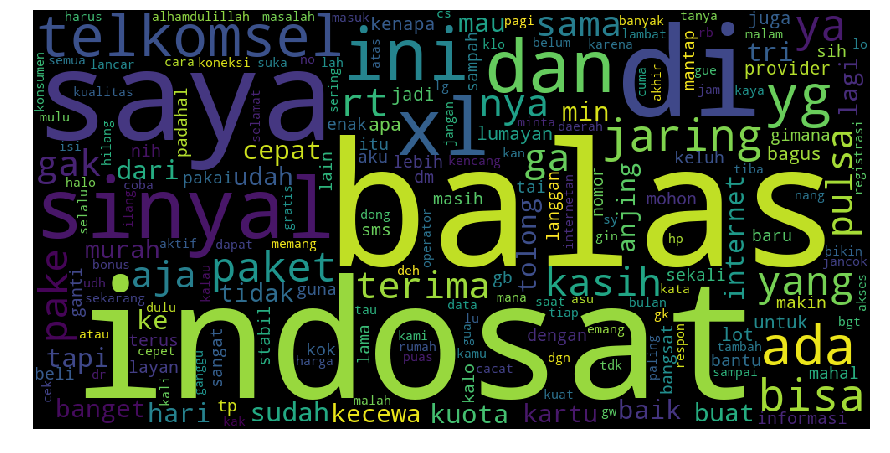

In [36]:
# Wordcloud for stopword listing
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter


word_could_dict=Counter(wcli)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud) #Show wordcloud in form of picture
plt.axis("off")
plt.show()
# plt.savefig('yourfile.png', bbox_inches='tight') #Saving picture to png file
plt.close()

In [39]:
# Stopwords Listing
sw_li = ['sih', 
         'dong', 
         'gue', 
         'lu', 
         'nya', 
         'rt', 
         'di', 
         'itu', 
         'saya', 
         'indosat', 
         'telkomsel', 
         'xl', 
         'dan', 
         'yang', 
         'yg', 
         'gb', 
         'aku',
         'tri',
         'ya',
         'ini',
         'ada',
         'ke',
         'aja',
         'nih',
         'sy',
         'gue',
         'dgn',
         'dari',
        ]
#Filtering token with stopwords
for i in sw_li:
    wcli = list(filter((i).__ne__, wcli))
wcli

['kenapa',
 'kartu',
 'registrasi',
 'nggak',
 'bisa',
 'pak',
 'padahal',
 'nomor',
 'kk',
 'ktp',
 'sudah',
 'benar',
 'sampai',
 'gagal',
 'tolong',
 'daftar',
 'segera',
 'demi',
 'nyaman',
 'guna',
 'kartu',
 'terima',
 'kasih',
 'mantap',
 'djaja',
 'koneksi',
 'ngebut',
 'euy',
 'balas',
 'mau',
 'nang',
 'deh',
 'rasa',
 'pdahl',
 'percaya',
 'betul',
 'dengan',
 'soal',
 'koneksi',
 'wil',
 'karimun',
 'tp',
 'sudah',
 'hari',
 'koneksi',
 'kacau',
 'balau',
 'sinyal',
 'asu',
 'ari',
 'musim',
 'hujan',
 'hadeuh',
 'balas',
 'cek',
 'dm',
 'woi',
 'layananan',
 'keluh',
 'semua',
 'ga',
 'fungsi',
 'kenapa',
 'bale',
 'endah',
 'sinyal',
 'tiba',
 'bagus',
 'yah',
 'pindah',
 'kali',
 'yah',
 'tower',
 'deket',
 'rumah',
 'aneh',
 'liat',
 'hp',
 'sendiri',
 'hotsale',
 'hanya',
 'gratis',
 'nelfon',
 'ga',
 'gratis',
 'sms',
 'tah',
 'min',
 'balas',
 'lain',
 'hai',
 'kak',
 'andika',
 'bisa',
 'bantu',
 'kami',
 'lihat',
 'akhir',
 'akhir',
 'anda',
 'sering',
 'sambat',
 

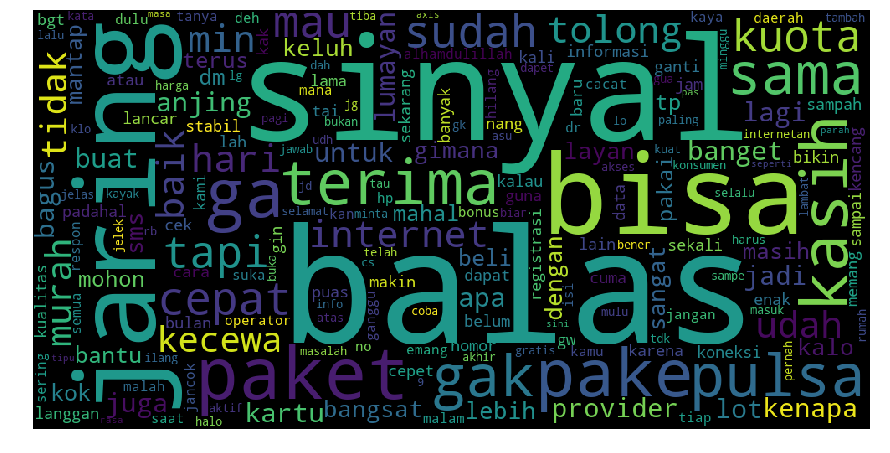

In [40]:
word_could_dict=Counter(wcli)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud) #Show filtered wordcloud in form of picture
plt.axis("off")
plt.show()
# plt.savefig('yourfile.png', bbox_inches='tight')
plt.close()

In [41]:
# Delete real tweet stop words
for i in ltstem:
    for j in sw_li:
        i[1] = list(filter((j).__ne__, i[1]))
    
ltstem
        

[['INDOSAT',
  ['kenapa',
   'kartu',
   'registrasi',
   'nggak',
   'bisa',
   'pak',
   'padahal',
   'nomor',
   'kk',
   'ktp',
   'sudah',
   'benar',
   'sampai',
   'gagal',
   'tolong',
   'daftar',
   'segera',
   'demi',
   'nyaman',
   'guna',
   'kartu',
   'terima',
   'kasih']],
 ['INDOSAT', ['mantap', 'djaja', 'koneksi', 'ngebut', 'euy']],
 ['INDOSAT',
  ['balas',
   'mau',
   'nang',
   'deh',
   'rasa',
   'pdahl',
   'percaya',
   'betul',
   'dengan',
   'soal',
   'koneksi',
   'wil',
   'karimun',
   'tp',
   'sudah',
   'hari',
   'koneksi',
   'kacau',
   'balau']],
 ['INDOSAT', ['sinyal', 'asu', 'ari', 'musim', 'hujan', 'hadeuh']],
 ['TRI',
  ['balas',
   'cek',
   'dm',
   'woi',
   'layananan',
   'keluh',
   'semua',
   'ga',
   'fungsi']],
 ['XL',
  ['kenapa',
   'bale',
   'endah',
   'sinyal',
   'tiba',
   'bagus',
   'yah',
   'pindah',
   'kali',
   'yah',
   'tower',
   'deket',
   'rumah',
   'aneh',
   'liat',
   'hp',
   'sendiri']],
 ['TRI',
  ['h

In [52]:
class_twit = []
# Opening separate file containing rating between 1 to 5 for each tweet (1: most negative; 5: most positive)
with open('tweetutf2class.csv',encoding='utf-8') as data:
    reader = csv.reader(data)
    for row in reader:
        class_twit.append(row[0])

class_twit[0] = '3'        
class_twit

['3',
 '5',
 '2',
 '1',
 '2',
 '5',
 '4',
 '2',
 '5',
 '5',
 '4',
 '3',
 '4',
 '4',
 '2',
 '2',
 '5',
 '4',
 '2',
 '1',
 '1',
 '1',
 '5',
 '4',
 '1',
 '3',
 '3',
 '3',
 '2',
 '3',
 '5',
 '5',
 '3',
 '2',
 '2',
 '3',
 '3',
 '3',
 '1',
 '5',
 '4',
 '3',
 '4',
 '2',
 '5',
 '2',
 '4',
 '2',
 '4',
 '3',
 '5',
 '2',
 '5',
 '4',
 '2',
 '1',
 '5',
 '3',
 '3',
 '3',
 '2',
 '2',
 '1',
 '5',
 '5',
 '5',
 '3',
 '4',
 '5',
 '5',
 '1',
 '5',
 '2',
 '1',
 '2',
 '5',
 '2',
 '1',
 '4',
 '2',
 '4',
 '4',
 '2',
 '3',
 '1',
 '1',
 '1',
 '3',
 '4',
 '2',
 '2',
 '2',
 '2',
 '5',
 '2',
 '3',
 '1',
 '3',
 '2',
 '2',
 '4',
 '4',
 '4',
 '2',
 '1',
 '3',
 '3',
 '2',
 '1',
 '1',
 '2',
 '4',
 '1',
 '5',
 '2',
 '3',
 '2',
 '3',
 '5',
 '2',
 '4',
 '2',
 '4',
 '3',
 '5',
 '3',
 '1',
 '2',
 '2',
 '4',
 '4',
 '3',
 '1',
 '3',
 '3',
 '3',
 '3',
 '2',
 '3',
 '2',
 '2',
 '4',
 '1',
 '5',
 '2',
 '1',
 '2',
 '2',
 '5',
 '5',
 '4',
 '5',
 '3',
 '5',
 '3',
 '1',
 '1',
 '5',
 '4',
 '3',
 '4',
 '2',
 '3',
 '2',
 '4',
 '5',
 '5'

In [60]:
# Bag of words
def bag_of_words(twit, kelas):
    words_dictionary = []
    words_class = []
    for i, j in zip(twit, kelas):
        words_dictionary.append((dict([word, True] for word in i[1]), j)) 
    return words_dictionary

In [63]:
# Bag of words testing
a = bag_of_words(ltstem, class_twit)
print(a[1])

({'mantap': True, 'djaja': True, 'koneksi': True, 'ngebut': True, 'euy': True}, '5')


In [68]:
print('total data : {}'.format(len(a)))

from random import shuffle
shuffle(a)

# Setting training & testing data
train_set = a[3497:]
test_set = a[:3497]

print('train data : {}\ntest data : {}'.format(len(train_set),len(test_set)))

total data : 11659
train data : 8162
test data : 3497


In [69]:
# Naive Bayes Classifier
from nltk import classify
from nltk import NaiveBayesClassifier

classifier = NaiveBayesClassifier.train(train_set)

accuracy = classify.accuracy(classifier, test_set)
print("Akurasi Dari Klasifikasi : {}".format(accuracy))

print(classifier.show_most_informative_features(10)) 

Akurasi Dari Klasifikasi : 0.7532170431798685
Most Informative Features
                  anjing = True                1 : 2      =    326.7 : 1.0
                 bangsat = True                1 : 4      =    256.9 : 1.0
               informasi = True                3 : 1      =    196.3 : 1.0
                     tai = True                1 : 3      =    183.8 : 1.0
                  sampah = True                1 : 4      =    161.7 : 1.0
                   cacat = True                1 : 3      =    118.6 : 1.0
                 kencang = True                4 : 1      =     90.1 : 1.0
           alhamdulillah = True                5 : 1      =     79.5 : 1.0
                  terima = True                3 : 1      =     78.9 : 1.0
                    enak = True                4 : 1      =     77.3 : 1.0
None


In [85]:
# Re-cleaning & tokenizing using NLTK
from nltk.tokenize import word_tokenize

def clean_twit(twit):
    twit = twit.lower()
    twit = re.sub(r'\s\s+',' ', twit)
    twit = re.sub(r'http\S+', '', twit) #hapus link http
    twit = re.sub(r'@\S+', '', twit) #hapus mention
    twit = re.sub(r'Membalas', '', twit) #hapus membalas
    twit = re.sub(r'RT', '', twit) #hapus RT
    twit = re.sub(r"\.", '', twit) #hapus titik
    twit = re.sub(r",", '', twit) #hapus koma
    twit = re.sub(r":", '', twit) #hapus titik dua
    twit = re.sub(r"\?", '', twit) #hapus tanda tanya
    twit = re.sub(r"!", '', twit) #hapus tanda seru
    twit = re.sub(r"#", '', twit) #hapus hashtag
    twit = re.sub(r"\(", '', twit) #hapus (
    twit = re.sub(r"\)", '', twit) #hapus )
    twit = re.sub(r"\[", '', twit) #hapus [
    twit = re.sub(r"\]", '', twit) #hapus ]
    for i in range(0,10):
            twit = re.sub(r"{}".format(i), '', twit) #hapus nomor
    twit = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', twit)
    twit = re.sub(r"[^A-Za-z0-9().,<_>!?\'`]", ' ', twit)
    twit = re.sub(r"\s{2,}", ' ', twit)
    token_twit = word_tokenize(twit)
    word_stem = []
    for i in token_twit:
        stemmed = stemmer.stem(i)
        word_stem.append(stemmed)
        
    sw_li = ['sih', 
         'dong', 
         'gue', 
         'lu', 
         'nya', 
         'rt', 
         'di', 
         'itu', 
         'saya', 
         'indosat', 
         'telkomsel', 
         'xl', 
         'dan', 
         'yang', 
         'yg', 
         'gb', 
         'aku',
         'tri',
         'ya',
         'ini',
         'ada',
         'ke',
         'aja',
         'nih',
         'sy',
         'gue',
         'dgn',
         'dari',
        ]
    for i in sw_li:
        word_stem = list(filter((i).__ne__, word_stem))
    word_dict = dict([word, True] for word in word_stem)
    return word_dict

In [89]:
# Test prediction for new tweet
kicau = 'Saya tadi dihubungi nomer +6282176959981 ini. Katanya saya dapet hadiah yang mengatasnamakan dari @Telkomsel ya kali aja penipuan, min. Soalnya saya tidak ikut program berhadiah apapun.'
coba_twit = clean_twit(kicau)
print(coba_twit, '\n')

print('Terklasifikasi Sebagai : {}'.format(classifier.classify(coba_twit)))
print('Diklasifikasikan sebagai : {}'.format(classifier.prob_classify(coba_twit)))
print("Classification category: ", classifier.prob_classify(coba_twit).max())
print("1 probability : ", classifier.prob_classify(coba_twit).prob("1"))
print("2 probability : ", classifier.prob_classify(coba_twit).prob("2"))
print("3 probability : ", classifier.prob_classify(coba_twit).prob("3"))
print("4 probability : ", classifier.prob_classify(coba_twit).prob("4"))
print("5 probability : ", classifier.prob_classify(coba_twit).prob("5"))

{'tadi': True, 'hubung': True, 'nomer': True, 'kata': True, 'dapet': True, 'hadiah': True, 'mengatasnamakan': True, 'kali': True, 'tipu': True, 'min': True, 'soal': True, 'tidak': True, 'ikut': True, 'program': True, 'apa': True} 

Terklasifikasi Sebagai : 3
Diklasifikasikan sebagai : <ProbDist with 5 samples>
Classification category:  3
1 probability :  5.671216971042359e-09
2 probability :  0.00014646057105806084
3 probability :  0.9998499363773445
4 probability :  1.166481321449531e-06
5 probability :  2.4308990645391118e-06


In [ ]:
#Streamer